# Loading `gwent` SNR Outputs to Generate Comparison Waterfall Plots

Here we present a tutorial on how to use `gwent` output from `Get_SNR_Matrix` to simultaneously plot Mass vs. Redshift SNRs for the instrument models currently implemented (LISA, PTAs, aLIGO, and Einstein Telescope) with the signal being an coalescing Binary Black Holes.

First, we import the necessary packages.

In [9]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.constants import golden_ratio

import astropy.units as u
from astropy.cosmology import z_at_value
from astropy.cosmology import WMAP9 as cosmo

import os,sys
current_directory = os.getcwd()
load_directory = current_directory + '/saved_SNRs/'

current_path = os.getcwd()
splt_path = current_path.split("/")
top_path_idx = splt_path.index('DetectorDesignSensitivities')
top_directory = "/".join(splt_path[0:top_path_idx+1])

save_directory = top_directory + '/Figures/v7/'

gwent_path_idx = splt_path.index('Research')
gwent_directory = "/".join(splt_path[0:gwent_path_idx+1])
gwent_path = gwent_directory + '/gwent/'
sys.path.insert(0,gwent_path)
import gwent
from gwent.snrplot import Plot_SNR

Setting matplotlib preferences

In [11]:
def get_fig_size(width=7,scale=2.0):
    #width = 3.36 # 242 pt
    base_size = np.array([1, 1/scale/golden_ratio])
    fig_size = width * base_size
    return(fig_size)
mpl.rcParams['figure.dpi'] = 300
#mpl.rcParams['figure.figsize'] = get_fig_size()
mpl.rcParams['text.usetex'] = True
mpl.rc('font',**{'family':'serif','serif':['Times New Roman']})
mpl.rcParams['lines.linewidth'] = 1.3
mpl.rcParams['axes.labelsize'] = 12
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['legend.fontsize'] = 8

In [12]:
version_SPACE = 'v2'
version_PTA = 'v6'
version_GROUND = 'v6'

## Loading SNR Data Files

### LISA Only Params

* 'L' - Detector Armlength
* 'A_acc' - Detector Acceleration Noise
* 'A_IFO' - Detector Optical Metrology Noise
* 'f_acc_break_low' - The Low Acceleration Noise Break Frequency
* 'f_acc_break_high' - The High Acceleration Noise Break Frequency
* 'f_IFO_break' - The Optical Metrology Noise Break Frequency

### Global Detector Params

* 'T_obs' - Observation Time Length

In [13]:
def load_stuff(detector_name,var_x,var_y,version):
    directory = load_directory + version + '/'
    if not os.path.isdir(directory):
        raise ValueError(directory,' is not a directory.')
    
    if version == 'v6':
        addon = '_lowz_'
    else:
        addon = '_'
    SNR_filename = detector_name + '_' + var_x + '_vs_' + var_y + '_SNR' + addon + version + '.txt'
    SNR = np.loadtxt(directory+SNR_filename)
    if var_x == 'N_p' or var_y == 'N_p':
        Sample_filename_1 = detector_name + '_' + var_x + '_vs_' + var_y + '_samples_' + var_x + addon + version + '.txt'
        Samples_1 = np.loadtxt(directory+Sample_filename_1)
        Sample_filename_2 = detector_name + '_' + var_x + '_vs_' + var_y + '_samples_' + var_y + addon + version + '.txt'
        Samples_2 = np.loadtxt(directory+Sample_filename_2)
        return [Samples_1,Samples_2,SNR]
    else:
        Sample_filename = detector_name + '_' + var_x + '_vs_' + var_y + '_samples' + addon + version + '.txt'
        Samples = np.loadtxt(directory+Sample_filename)
        return [Samples,SNR]

## Space Based

#### LISA Proposal 1

SNR values from the ESA L3 proposal run.

Load SNR from file

In [14]:
[lisa_Samples_M_vs_A_acc,lisa_SNR_M_vs_A_acc] = load_stuff('LISA_ESA','M','A_acc',version_SPACE)
[lisa_Samples_M_vs_L,lisa_SNR_M_vs_L] = load_stuff('LISA_ESA','M','L',version_SPACE)
[lisa_Samples_M_vs_A_IFO,lisa_SNR_M_vs_A_IFO] = load_stuff('LISA_ESA','M','A_IFO',version_SPACE)
[lisa_Samples_M_vs_f_acc_break_low,lisa_SNR_M_vs_f_acc_break_low] = load_stuff('LISA_ESA','M','f_acc_break_low',version_SPACE)
[lisa_Samples_M_vs_f_acc_break_high,lisa_SNR_M_vs_f_acc_break_high] = load_stuff('LISA_ESA','M','f_acc_break_high',version_SPACE)
[lisa_Samples_M_vs_f_IFO_break,lisa_SNR_M_vs_f_IFO_break] = load_stuff('LISA_ESA','M','f_IFO_break',version_SPACE)
[lisa_Samples_M_vs_T_obs,lisa_SNR_M_vs_T_obs] = load_stuff('LISA_ESA','M','T_obs',version_SPACE)
[lisa_Samples_M_vs_z,lisa_SNR_M_vs_z] = load_stuff('LISA_ESA','M','z',version_SPACE)
[lisa_Samples_M_vs_q,lisa_SNR_M_vs_q] = load_stuff('LISA_ESA','M','q',version_SPACE)
[lisa_Samples_M_vs_chi1,lisa_SNR_M_vs_chi1] = load_stuff('LISA_ESA','M','chi1',version_SPACE)
[lisa_Samples_L_vs_q,lisa_SNR_L_vs_q] = load_stuff('LISA_ESA','L','q',version_SPACE)
[lisa_Samples_L_vs_z,lisa_SNR_L_vs_z] = load_stuff('LISA_ESA','L','z',version_SPACE)
[lisa_Samples_L_vs_chi1,lisa_SNR_L_vs_chi1] = load_stuff('LISA_ESA','L','chi1',version_SPACE)

First column is x-axis variable, second is y-axis variable
z and M sample space corresponding to SNR height

#### All Space Based Plots

M vs source params

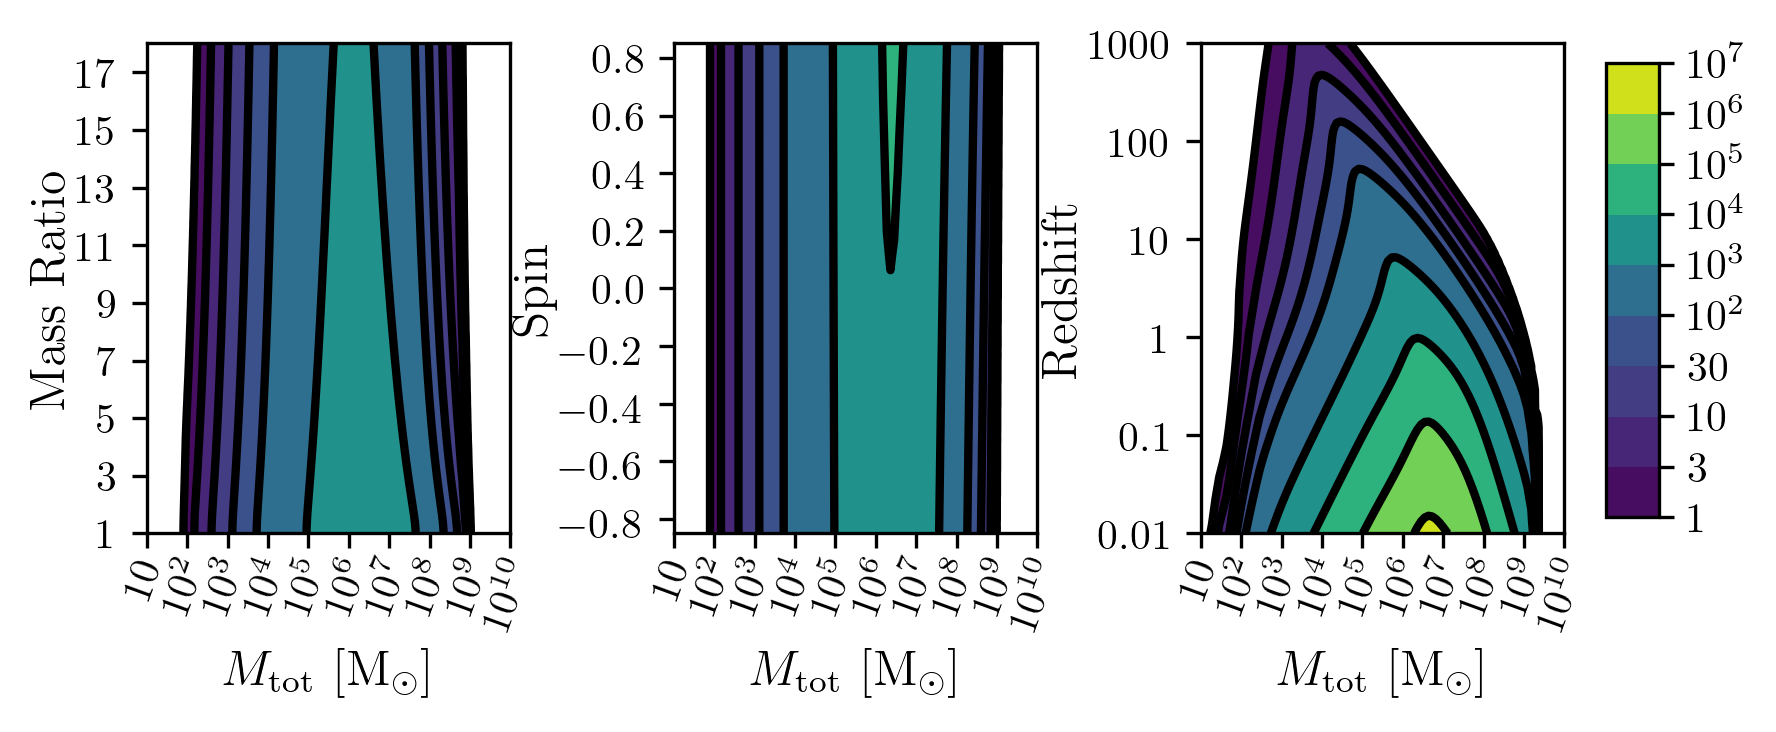

In [15]:
#########################
#Make the Contour Plots
figsize = get_fig_size()
fig, axes = plt.subplots(1,3,figsize=figsize)
samples = [lisa_Samples_M_vs_q,lisa_Samples_M_vs_chi1,lisa_Samples_M_vs_z]
SNRs = [lisa_SNR_M_vs_q,lisa_SNR_M_vs_chi1,lisa_SNR_M_vs_z]
var_ys = ['q','chi1','z']
loglevelMin=-1.0
loglevelMax=7.0
hspace = .1
wspace = .45

ii = 0
for i in range(len(axes)):
    if ii == (len(axes))-1:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=True,display_cbar=True,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    else:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    ii += 1
#fig.savefig(save_directory+'SNR_LISA_M_vs_source_params.pdf',bbox_inches='tight')

L vs params

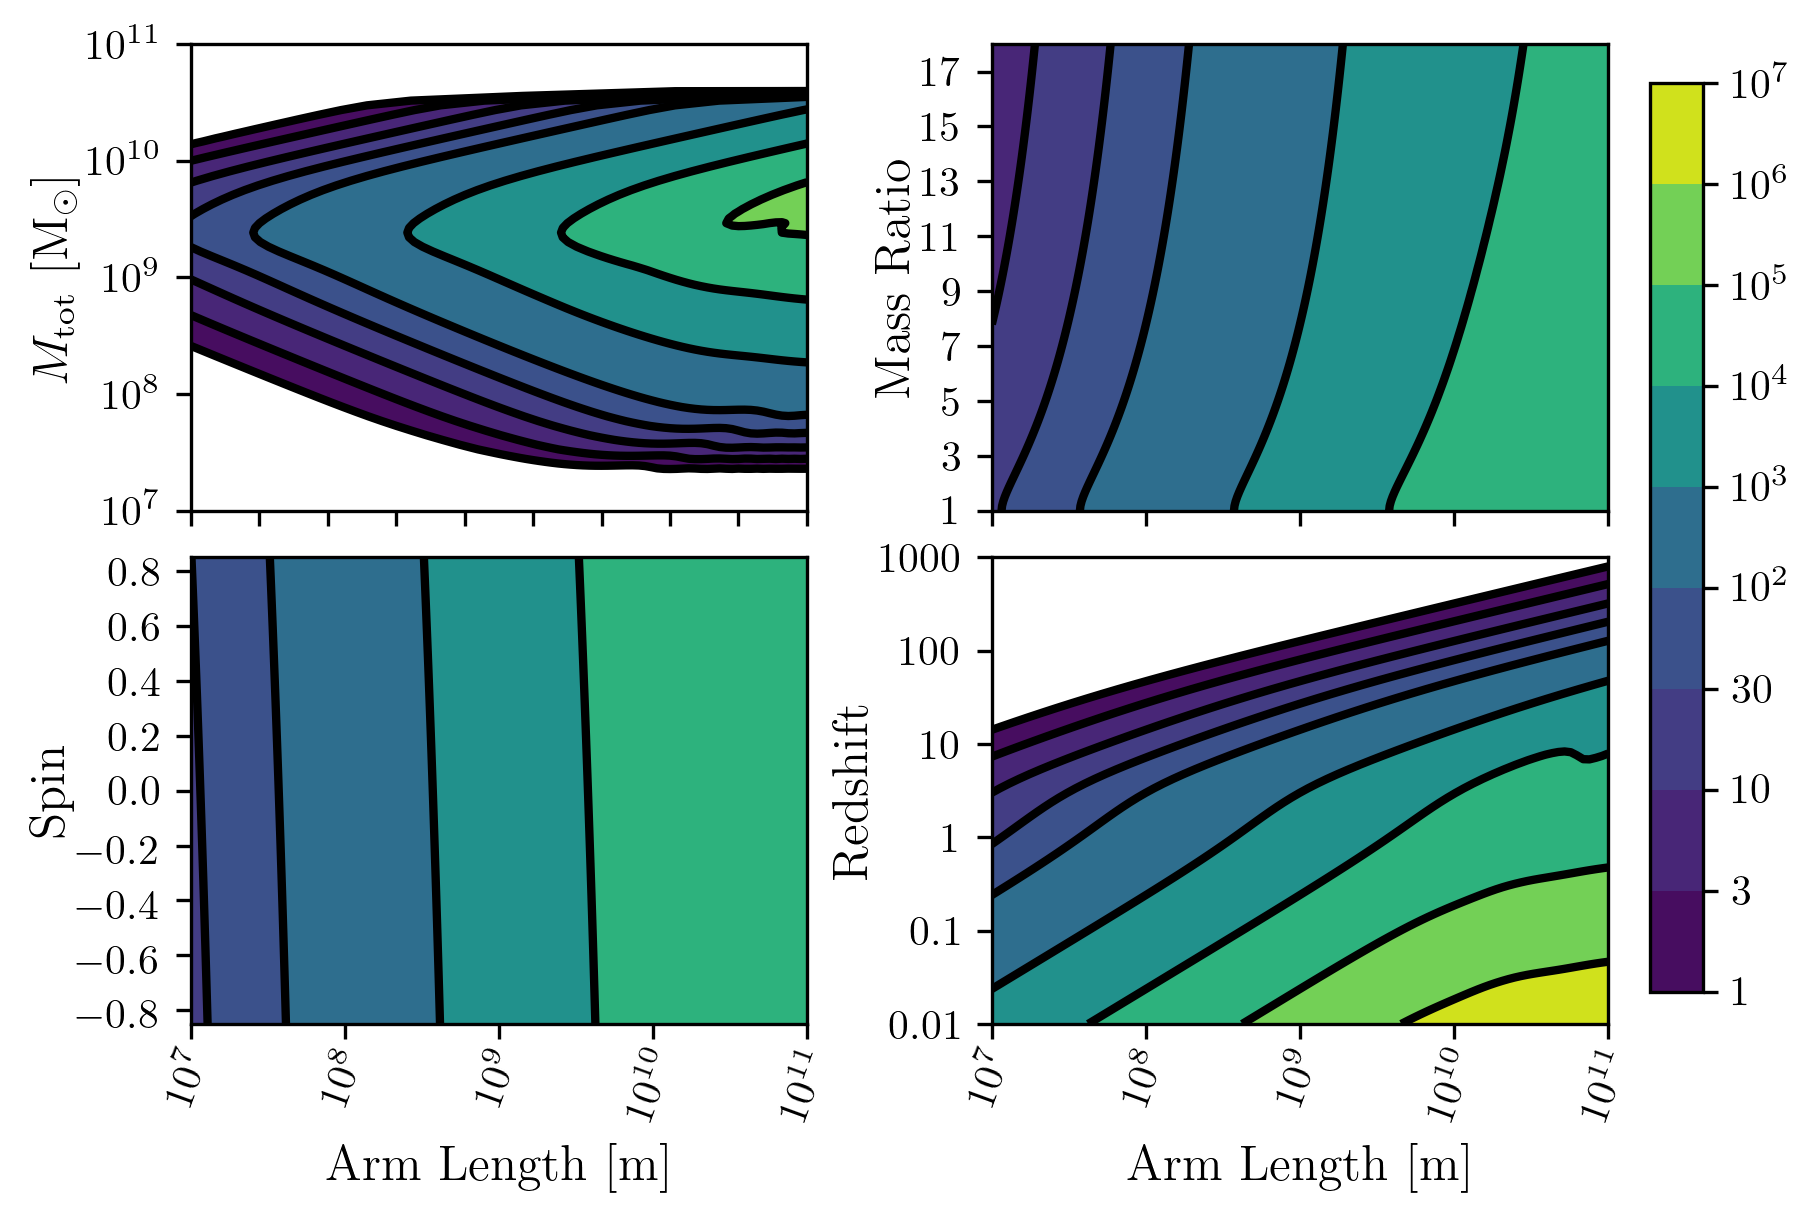

In [16]:
#########################
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [lisa_Samples_M_vs_L,lisa_Samples_L_vs_q,lisa_Samples_L_vs_chi1,lisa_Samples_L_vs_z]
SNRs = [lisa_SNR_M_vs_L,lisa_SNR_L_vs_q,lisa_SNR_L_vs_chi1,lisa_SNR_L_vs_z]
var_ys = ['M','q','chi1','z']
loglevelMin=-1.0
loglevelMax=7.0
hspace = .1
wspace = .3
y_label_loc = -.175

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == 0:
            Plot_SNR('L',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii].T,
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':0.45})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('L',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        elif ii == 1:
            Plot_SNR('L',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':0.45})
        else:
            Plot_SNR('L',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        ii += 1
#fig.savefig(save_directory+'SNR_LISA_L_vs_params.pdf',bbox_inches='tight')

M vs instrument params

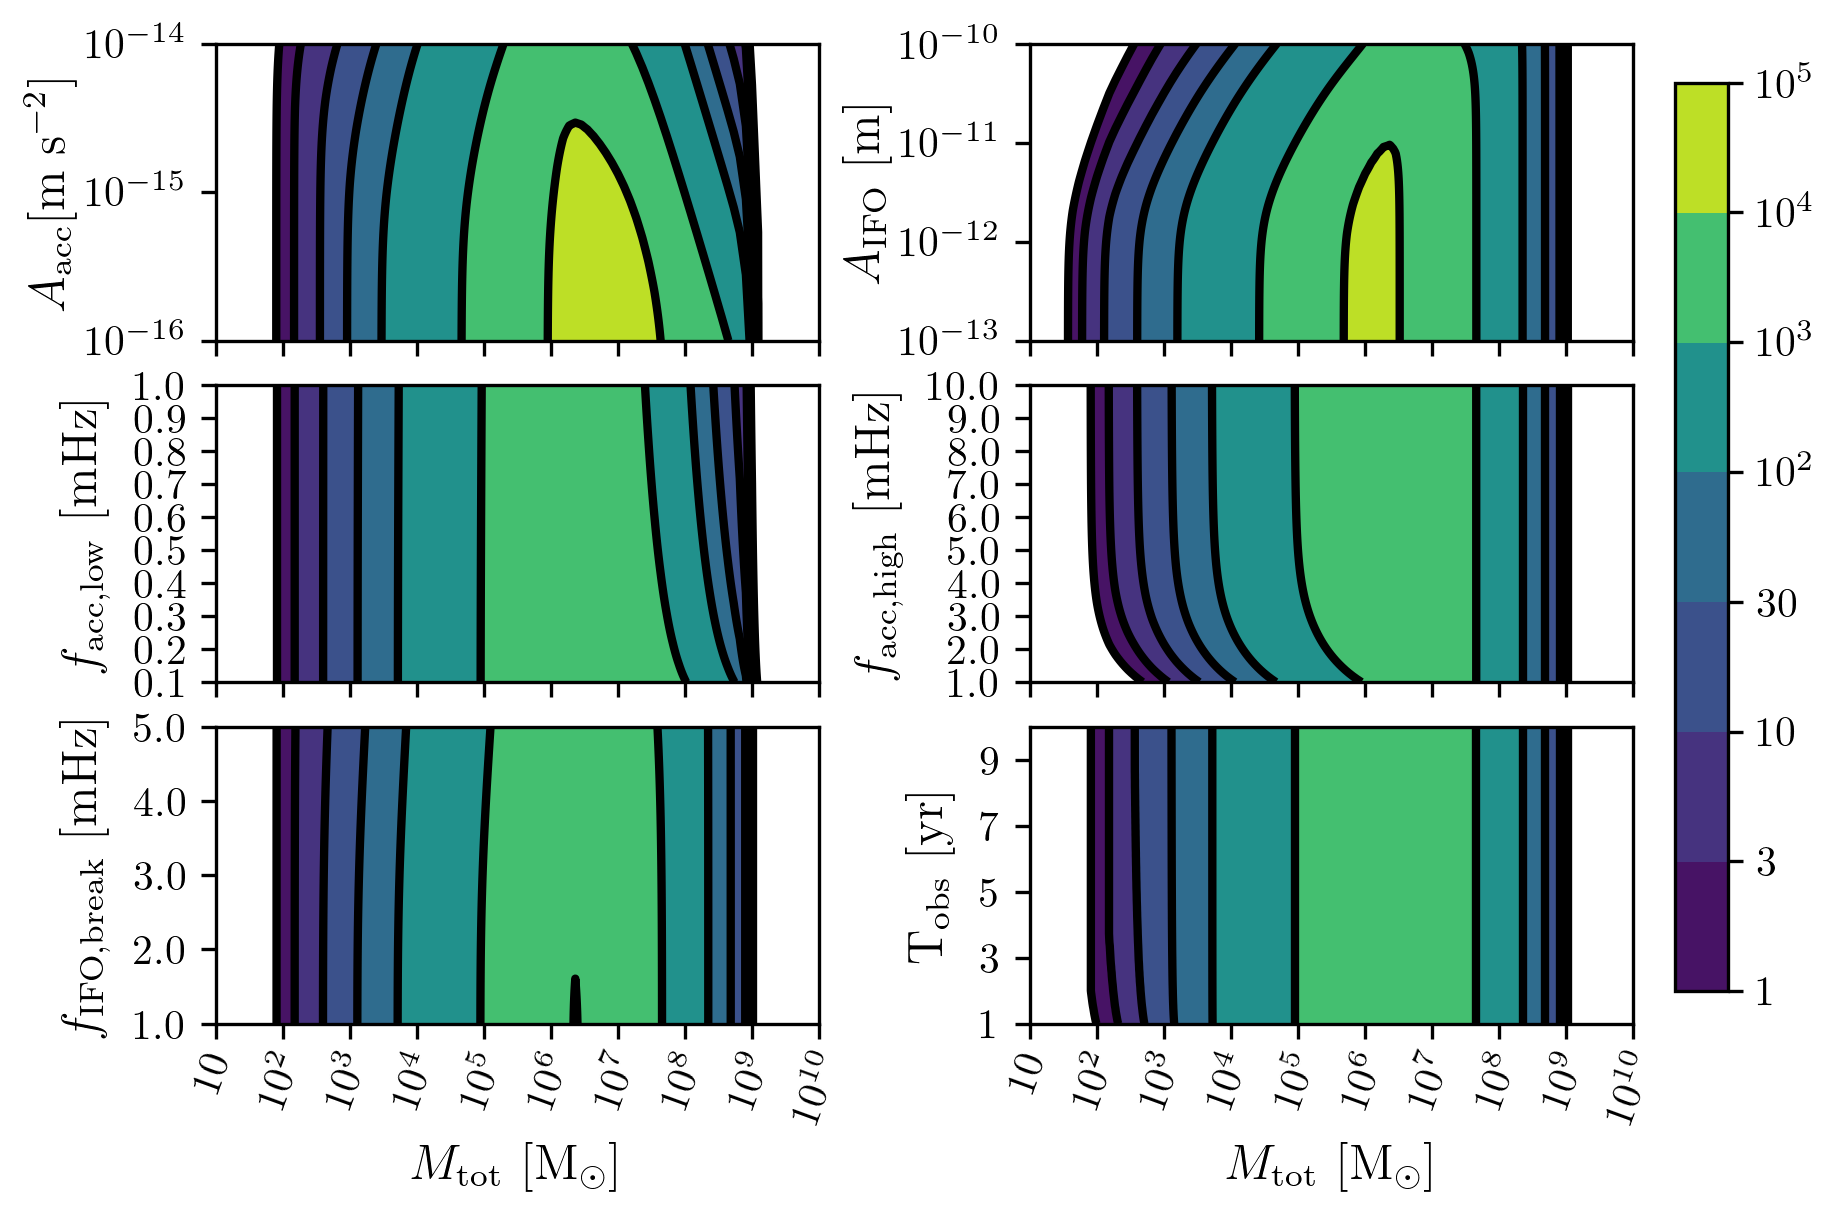

In [17]:
#########################
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(3,2,figsize=figsize)
samples = [lisa_Samples_M_vs_A_acc,
           lisa_Samples_M_vs_A_IFO,lisa_Samples_M_vs_f_acc_break_low,
           lisa_Samples_M_vs_f_acc_break_high,lisa_Samples_M_vs_f_IFO_break,
           lisa_Samples_M_vs_T_obs]
SNRs = [lisa_SNR_M_vs_A_acc,
        lisa_SNR_M_vs_A_IFO,lisa_SNR_M_vs_f_acc_break_low,
        lisa_SNR_M_vs_f_acc_break_high,lisa_SNR_M_vs_f_IFO_break,
        lisa_SNR_M_vs_T_obs]
var_ys = ['A_acc','A_IFO','f_acc_break_low','f_acc_break_high','f_IFO_break','T_obs']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .15
wspace = .35
#fig.delaxes(axes[np.shape(axes)[0]-1,np.shape(axes)[1]-1])

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':5})
        elif ii in [(np.shape(axes)[0]*np.shape(axes)[1])-2]:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':5})
        else:
            if i == 0:
                Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':1})
            else:
                Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':5})
        ii += 1
        
#fig.savefig(save_directory+'SNR_LISA_M_vs_inst_params.pdf',bbox_inches='tight')

## Ground Based

In [18]:
version_GROUND_inst_params = 'v7'

#### Einstein Telescope

SNR values from the Einstein Telescope proposal run.

In [19]:
[et_Samples_M_vs_chi1,et_SNR_M_vs_chi1] = load_stuff('ET','M','chi1',version_GROUND)
[et_Samples_M_vs_q,et_SNR_M_vs_q] = load_stuff('ET','M','q',version_GROUND)
[et_Samples_M_vs_z,et_SNR_M_vs_z] = load_stuff('ET','M','z',version_GROUND)

#### aLIGO

SNR values from the Advanced LIGO run.

In [23]:
[aLIGO_Samples_M_vs_chi1,aLIGO_SNR_M_vs_chi1] = load_stuff('aLIGO','M','chi1',version_GROUND)
[aLIGO_Samples_M_vs_q,aLIGO_SNR_M_vs_q] = load_stuff('aLIGO','M','q',version_GROUND)
[aLIGO_Samples_M_vs_z,aLIGO_SNR_M_vs_z] = load_stuff('aLIGO','M','z',version_GROUND)
[aLIGO_Samples_M_vs_Infrastructure_Length,aLIGO_SNR_M_vs_Infrastructure_Length] = load_stuff('aLIGO','M','Infrastructure_Length',version_GROUND_inst_params)
[aLIGO_Samples_M_vs_Laser_Power,aLIGO_SNR_M_vs_Laser_Power] = load_stuff('aLIGO','M','Laser_Power',version_GROUND_inst_params)
#[aLIGO_Samples_M_vs_Seismic_Gamma,aLIGO_SNR_M_vs_Seismic_Gamma] = load_stuff('aLIGO','M','Seismic_Gamma',version_GROUND_inst_params)
[aLIGO_Samples_M_vs_Materials_Substrate_Temp,aLIGO_SNR_M_vs_Materials_Substrate_Temp] = load_stuff('aLIGO','M','Materials_Substrate_Temp',version_GROUND_inst_params)

#### A+

SNR values from the Advanced LIGO run.

[Aplus_Samples_M_vs_chi1,Aplus_SNR_M_vs_chi1] = load_stuff('Aplus','M','chi1',version)
[Aplus_Samples_M_vs_q,Aplus_SNR_M_vs_q] = load_stuff('Aplus','M','q',version)
[Aplus_Samples_M_vs_z,Aplus_SNR_M_vs_z] = load_stuff('Aplus','M','z',version)
[Aplus_Samples_M_vs_Infrastructure_Length,Aplus_SNR_M_vs_Infrastructure_Length] = load_stuff('Aplus','M','Infrastructure_Length',version)
[Aplus_Samples_M_vs_Laser_Power,Aplus_SNR_M_vs_Laser_Power] = load_stuff('Aplus','M','Laser_Power',version)
[Aplus_Samples_M_vs_Seismic_Gamma,Aplus_SNR_M_vs_Seismic_Gamma] = load_stuff('Aplus','M','Seismic_Gamma',version)

#### Voyager

SNR values from the Advanced LIGO run.

In [24]:
[Voyager_Samples_M_vs_chi1,Voyager_SNR_M_vs_chi1] = load_stuff('Voyager','M','chi1',version_GROUND)
[Voyager_Samples_M_vs_q,Voyager_SNR_M_vs_q] = load_stuff('Voyager','M','q',version_GROUND)
[Voyager_Samples_M_vs_z,Voyager_SNR_M_vs_z] = load_stuff('Voyager','M','z',version_GROUND)
[Voyager_Samples_M_vs_Infrastructure_Length,Voyager_SNR_M_vs_Infrastructure_Length] = load_stuff('Voyager','M','Infrastructure_Length',version_GROUND_inst_params)
[Voyager_Samples_M_vs_Laser_Power,Voyager_SNR_M_vs_Laser_Power] = load_stuff('Voyager','M','Laser_Power',version_GROUND_inst_params)
#[Voyager_Samples_M_vs_Seismic_Gamma,Voyager_SNR_M_vs_Seismic_Gamma] = load_stuff('Voyager','M','Seismic_Gamma',version_GROUND)
[Voyager_Samples_M_vs_Materials_Substrate_Temp,Voyager_SNR_M_vs_Materials_Substrate_Temp] = load_stuff('Voyager','M','Materials_Substrate_Temp',version_GROUND_inst_params)

#### Cosmic Explorer

SNR values from the Advanced LIGO run.

In [25]:
[CE1_Samples_M_vs_chi1,CE1_SNR_M_vs_chi1] = load_stuff('CE1','M','chi1',version_GROUND)
[CE1_Samples_M_vs_q,CE1_SNR_M_vs_q] = load_stuff('CE1','M','q',version_GROUND)
[CE1_Samples_M_vs_z,CE1_SNR_M_vs_z] = load_stuff('CE1','M','z',version_GROUND)
[CE1_Samples_M_vs_Infrastructure_Length,CE1_SNR_M_vs_Infrastructure_Length] = load_stuff('CE1','M','Infrastructure_Length',version_GROUND_inst_params)
[CE1_Samples_M_vs_Laser_Power,CE1_SNR_M_vs_Laser_Power] = load_stuff('CE1','M','Laser_Power',version_GROUND_inst_params)
#[CE1_Samples_M_vs_Seismic_Gamma,CE1_SNR_M_vs_Seismic_Gamma] = load_stuff('CE1','M','Seismic_Gamma',version_GROUND)
[CE1_Samples_M_vs_Materials_Substrate_Temp,CE1_SNR_M_vs_Materials_Substrate_Temp] = load_stuff('CE1','M','Materials_Substrate_Temp',version_GROUND_inst_params)

#### All Ground Based Plots

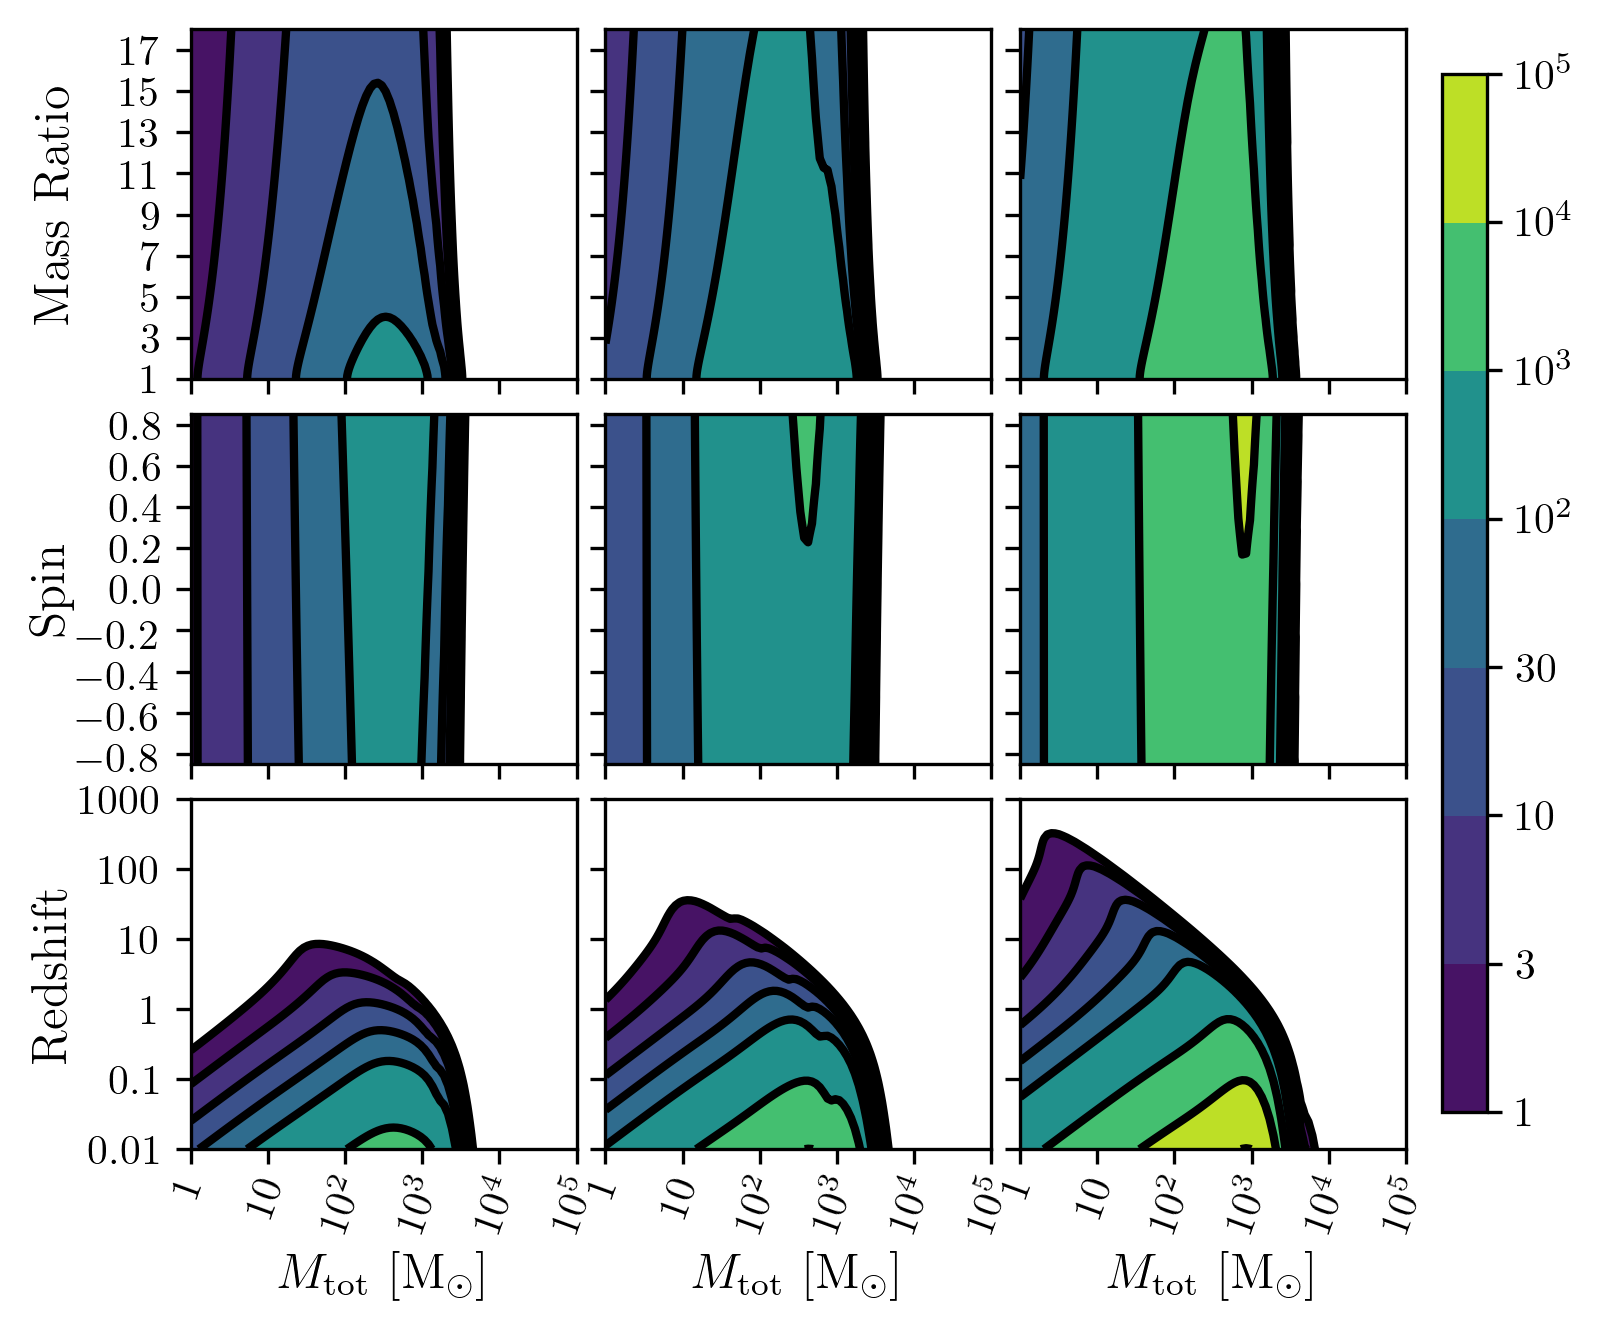

In [91]:
#########################
#Make the Contour Plots
figsize = get_fig_size(width=6.0,scale=0.75)
fig, axes = plt.subplots(3,3,figsize=figsize)
"""
samples = [aLIGO_Samples_M_vs_chi1,aLIGO_Samples_M_vs_q,aLIGO_Samples_M_vs_z,
           Voyager_Samples_M_vs_chi1,Voyager_Samples_M_vs_q,Voyager_Samples_M_vs_z,
           CE1_Samples_M_vs_chi1,CE1_Samples_M_vs_q,CE1_Samples_M_vs_z]
SNRs = [aLIGO_SNR_M_vs_chi1,aLIGO_SNR_M_vs_q,aLIGO_SNR_M_vs_z,
        Voyager_SNR_M_vs_chi1,Voyager_SNR_M_vs_q,Voyager_SNR_M_vs_z,
        CE1_SNR_M_vs_chi1,CE1_SNR_M_vs_q,CE1_SNR_M_vs_z]
"""
samples = [aLIGO_Samples_M_vs_q,Voyager_Samples_M_vs_q,CE1_Samples_M_vs_q,
           aLIGO_Samples_M_vs_chi1,Voyager_Samples_M_vs_chi1,CE1_Samples_M_vs_chi1,
           aLIGO_Samples_M_vs_z,Voyager_Samples_M_vs_z,CE1_Samples_M_vs_z]
SNRs = [aLIGO_SNR_M_vs_q,Voyager_SNR_M_vs_q,CE1_SNR_M_vs_q,
        aLIGO_SNR_M_vs_chi1,Voyager_SNR_M_vs_chi1,CE1_SNR_M_vs_chi1,
        aLIGO_SNR_M_vs_z,Voyager_SNR_M_vs_z,CE1_SNR_M_vs_z]
var_ys = ['q','chi1','z']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .1
wspace = .075

ii = 0
for i in range(np.shape(axes)[0]):
    var_y=var_ys[i]
    for j in range(np.shape(axes)[1]):
        #First Column
        if ii%3 == 0:
            #Last row
            if ii == (np.shape(axes)[0]*np.shape(axes)[1])-3:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
            #Middle Row
            elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-6:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':0.5})
            else:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':10})
        #Bottom Right
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        #Bottom Middle
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        ii += 1
        
#fig.savefig(save_directory+'SNR_Ground_M_vs_params.pdf',bbox_inches='tight')

aLIGO M. vs. Inst. Params

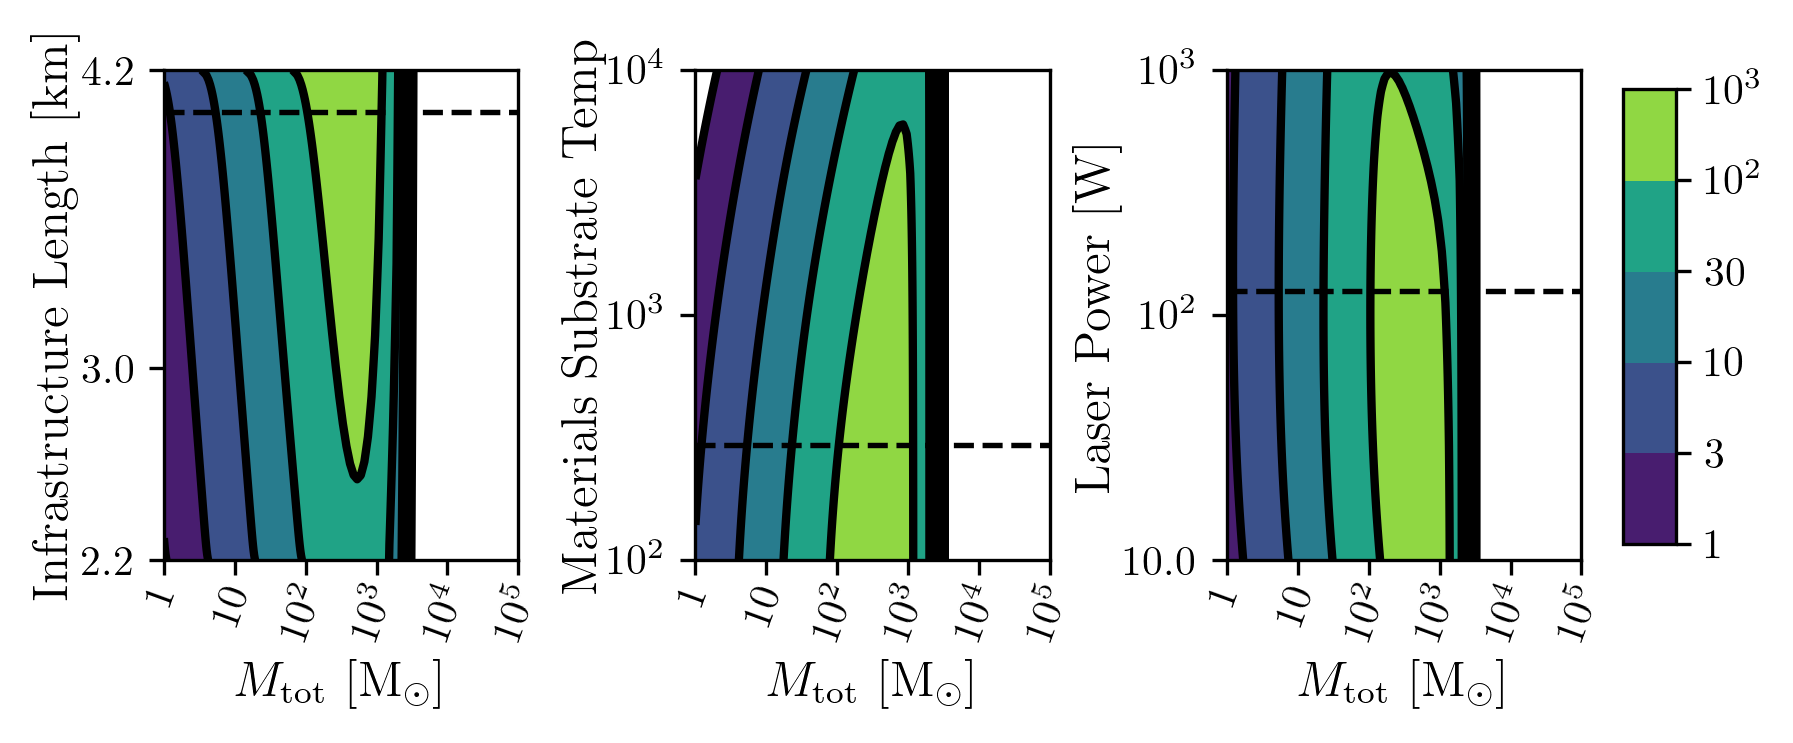

In [28]:
#########################
#Make the Contour Plots
figsize = get_fig_size()
fig, axes = plt.subplots(1,3,figsize=figsize)
samples = [aLIGO_Samples_M_vs_Infrastructure_Length,
           aLIGO_Samples_M_vs_Materials_Substrate_Temp,
           aLIGO_Samples_M_vs_Laser_Power]
SNRs = [aLIGO_SNR_M_vs_Infrastructure_Length,
        aLIGO_SNR_M_vs_Materials_Substrate_Temp,
        aLIGO_SNR_M_vs_Laser_Power]
var_ys = ['Infrastructure Length','Materials Substrate Temp','Laser Power']
loglevelMin=-1.0
loglevelMax=3.0
hspace = .1
wspace = .5
y_label_loc = -.325

#fig.delaxes(axes[np.shape(axes)[0]-1,np.shape(axes)[1]-1])

ii = 0
for i in range(len(axes)):
    if ii == (len(axes))-1:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=True,display_cbar=True,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    else:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    ii += 1
#fig.savefig(save_directory+'SNR_aLIGO_M_vs_inst_params.pdf',bbox_inches='tight')

Voyager M. vs. Inst. Params

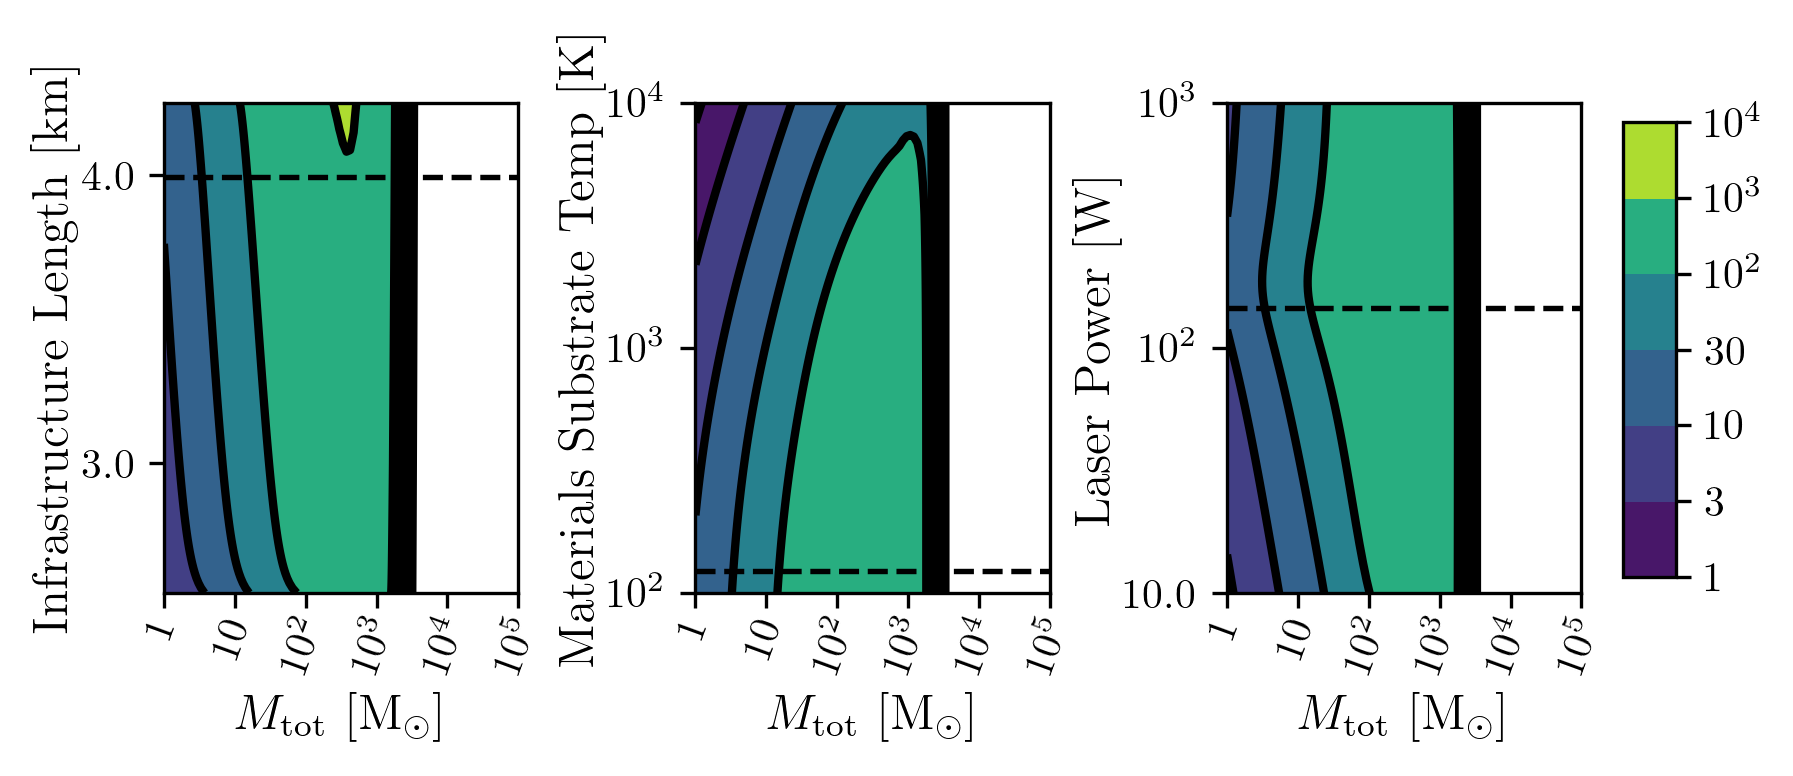

In [38]:
#########################
#Make the Contour Plots
figsize = get_fig_size()
fig, axes = plt.subplots(1,3,figsize=figsize)
samples = [Voyager_Samples_M_vs_Infrastructure_Length,
           Voyager_Samples_M_vs_Materials_Substrate_Temp,
           Voyager_Samples_M_vs_Laser_Power]
SNRs = [Voyager_SNR_M_vs_Infrastructure_Length,
        Voyager_SNR_M_vs_Materials_Substrate_Temp,
        Voyager_SNR_M_vs_Laser_Power]
var_ys = ['Infrastructure Length','Materials Substrate Temp','Laser Power']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .1
wspace = .5
y_label_loc = -.325

#fig.delaxes(axes[np.shape(axes)[0]-1,np.shape(axes)[1]-1])

ii = 0
for i in range(len(axes)):
    if ii == (len(axes))-1:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=True,display_cbar=True,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    else:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    ii += 1
        
#fig.savefig(save_directory+'SNR_Voyager_M_vs_inst_params.pdf',bbox_inches='tight')

Cosmic Explorer M. vs. Inst. Params

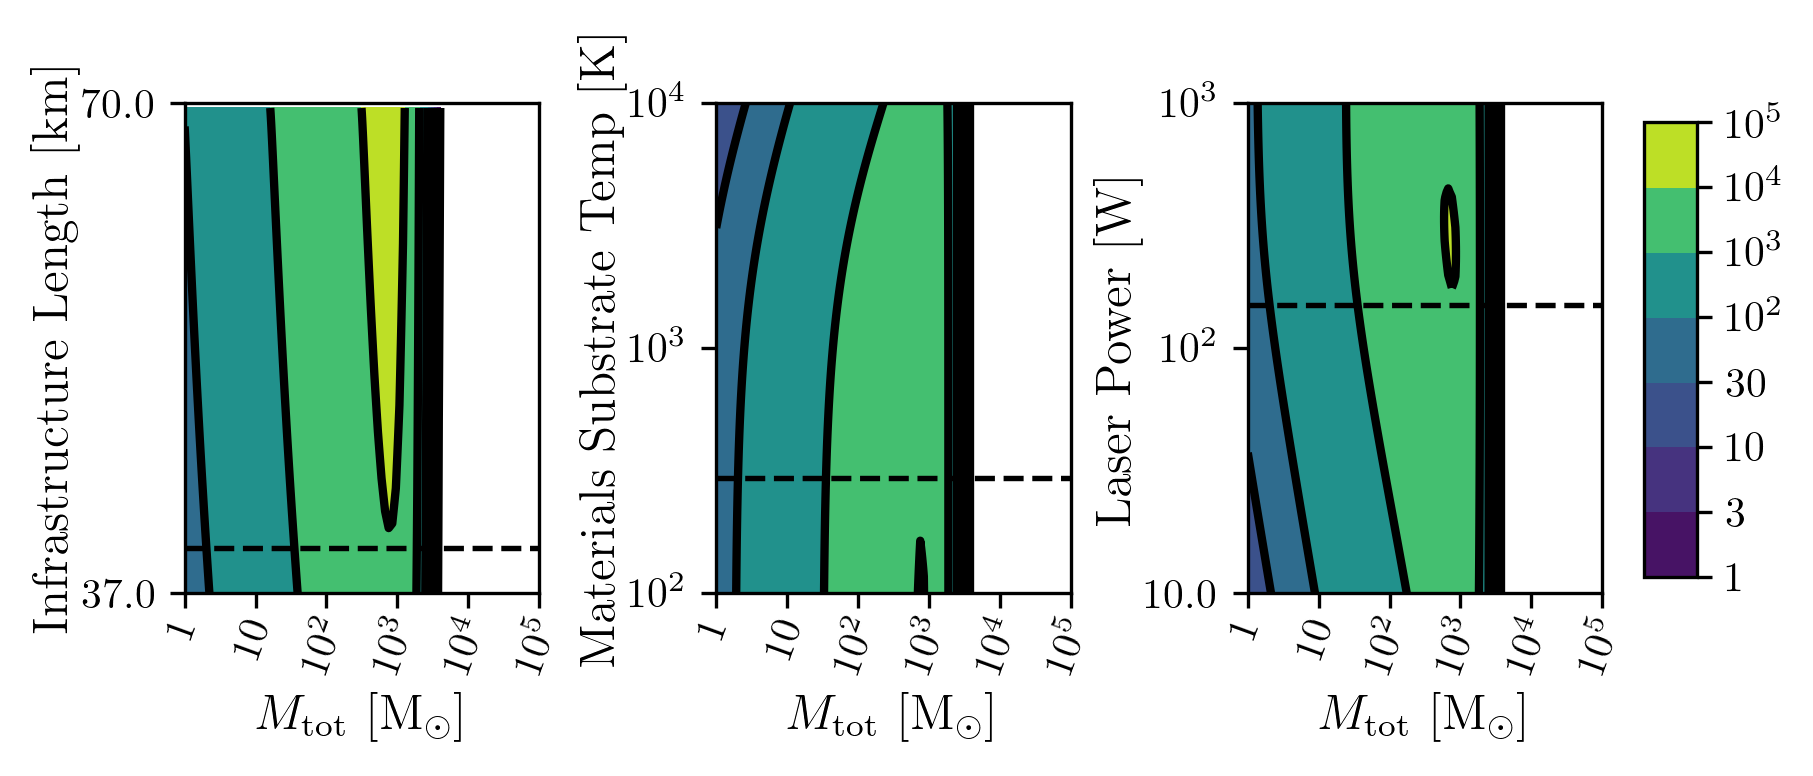

In [35]:
#########################
#Make the Contour Plots
figsize = get_fig_size()
fig, axes = plt.subplots(1,3,figsize=figsize)
samples = [CE1_Samples_M_vs_Infrastructure_Length,
           CE1_Samples_M_vs_Materials_Substrate_Temp,
           CE1_Samples_M_vs_Laser_Power]
SNRs = [CE1_SNR_M_vs_Infrastructure_Length,
        CE1_SNR_M_vs_Materials_Substrate_Temp,
        CE1_SNR_M_vs_Laser_Power]
var_ys = ['Infrastructure Length','Materials Substrate Temp','Laser Power']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .1
wspace = .5
y_label_loc = -.325

#fig.delaxes(axes[np.shape(axes)[0]-1,np.shape(axes)[1]-1])

ii = 0
for i in range(len(axes)):
    if ii == (len(axes))-1:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=True,display_cbar=True,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    else:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45})
    ii += 1
        
#fig.savefig(save_directory+'SNR_CE1_M_vs_inst_params.pdf',bbox_inches='tight')

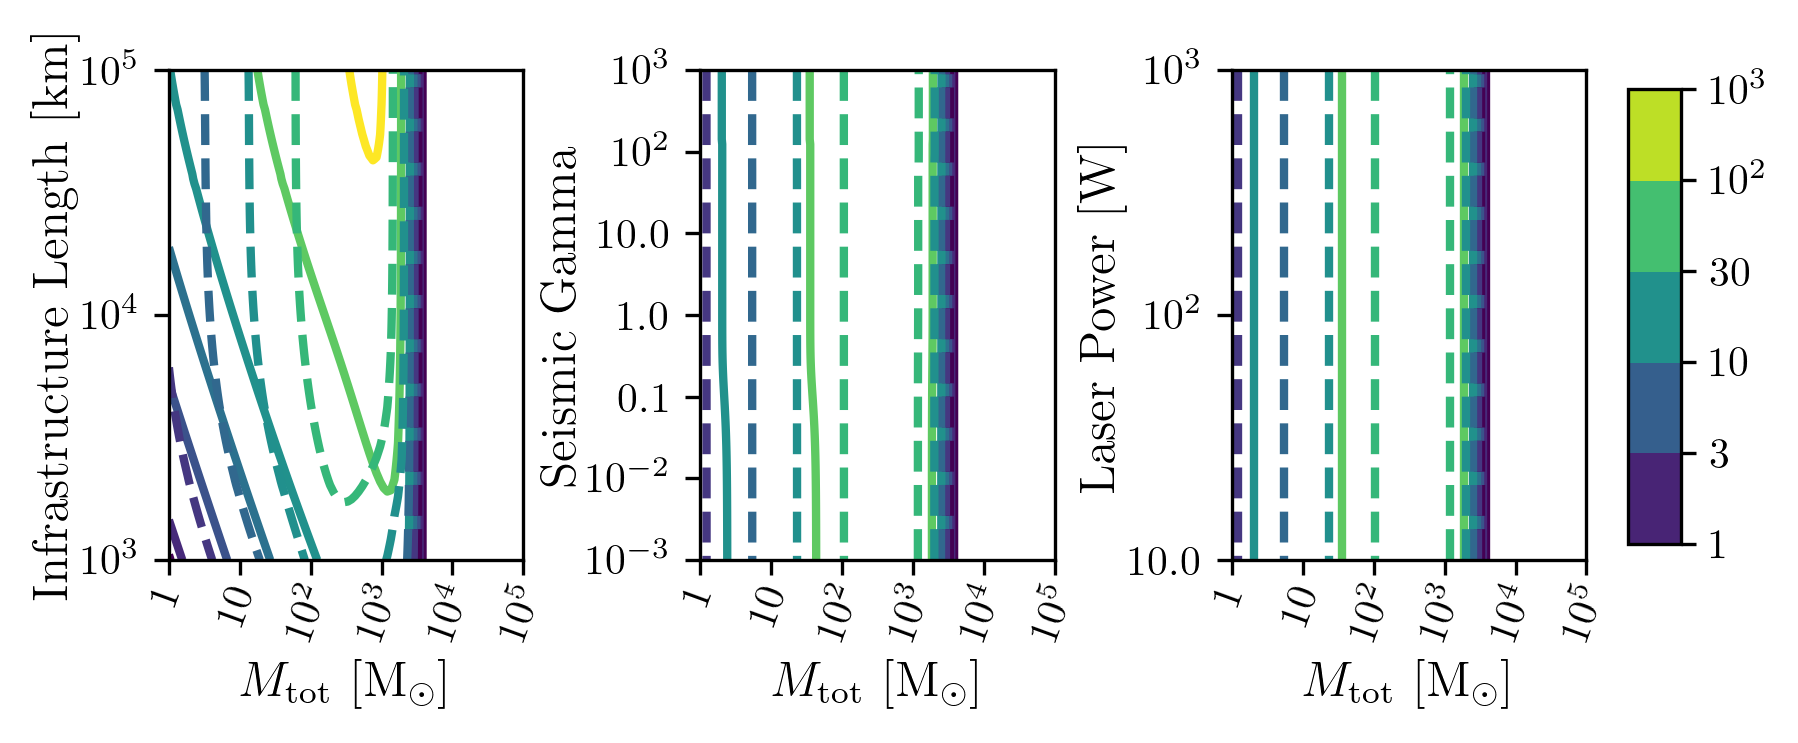

In [26]:
#########################
#Make the Contour Plots
figsize = get_fig_size()
fig, axes = plt.subplots(1,3,figsize=figsize)
samples = [CE1_Samples_M_vs_Infrastructure_Length,
           CE1_Samples_M_vs_Seismic_Gamma,
           CE1_Samples_M_vs_Laser_Power,
           aLIGO_Samples_M_vs_Infrastructure_Length,
           aLIGO_Samples_M_vs_Seismic_Gamma,
           aLIGO_Samples_M_vs_Laser_Power]
SNRs = [CE1_SNR_M_vs_Infrastructure_Length,
        CE1_SNR_M_vs_Seismic_Gamma,
        CE1_SNR_M_vs_Laser_Power,
        aLIGO_SNR_M_vs_Infrastructure_Length,
        aLIGO_SNR_M_vs_Seismic_Gamma,
        aLIGO_SNR_M_vs_Laser_Power]

var_ys = ['Infrastructure Length','Seismic Gamma','Laser Power']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .1
wspace = .5
y_label_loc = -.325

og_alpha = 1.0
og_line_color = 'k'
double_idx = 3
double_alpha = 1.0
double_line_color = 'w'
cline_style='--'

cfill = False

#fig.delaxes(axes[np.shape(axes)[0]-1,np.shape(axes)[1]-1])

ii = 0
for i in range(len(axes)):
    if ii == (len(axes))-1:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45},
                 contour_kwargs={'cmap':'viridis'},cfill=cfill)

        Plot_SNR('M',samples[double_idx+ii][:,0],var_ys[ii],
                 samples[double_idx+ii][:,1],SNRs[double_idx+ii],
                 fig=fig,ax=axes[i],display=True,display_cbar=True,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45},
                 contour_kwargs={'cmap':'viridis','linestyles':cline_style},cfill=cfill)
    else:
        Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                 samples[ii][:,1],SNRs[ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45},
                 contour_kwargs={'cmap':'viridis'},cfill=cfill)

        Plot_SNR('M',samples[double_idx+ii][:,0],var_ys[ii],
                 samples[double_idx+ii][:,1],SNRs[double_idx+ii],
                 fig=fig,ax=axes[i],display=False,display_cbar=False,
                 hspace=hspace,wspace=wspace,
                 xticklabels_kwargs={'rotation':70,'y':0.02},
                 ylabels_kwargs={'labelpad':0.45},
                 contour_kwargs={'cmap':'viridis','linestyles':cline_style},cfill=cfill)
    ii += 1
        
#fig.savefig(save_directory+'SNR_CE1_M_vs_inst_params.pdf',bbox_inches='tight')

## PTAs

### PTA Only Params

* 'N_p' - Number of Pulsars
* 'sigma' - Root-Mean-Squared Timing Error
* 'cadence' - Observation Cadence

### Global Detector Params

* 'T_obs' - Observation Time Length

#### NANOGrav WN Only

In [27]:
[NANOGrav_WN_Samples_M_vs_N_p_x,NANOGrav_WN_Samples_M_vs_N_p_y,
 NANOGrav_WN_SNR_M_vs_N_p] = load_stuff('NANOGrav_WN','M','N_p',version_PTA)

[NANOGrav_WN_Samples_M_vs_T_obs,NANOGrav_WN_SNR_M_vs_T_obs] = load_stuff('NANOGrav_WN','M','T_obs',version_PTA)
[NANOGrav_WN_Samples_M_vs_cadence,NANOGrav_WN_SNR_M_vs_cadence] = load_stuff('NANOGrav_WN','M','cadence',version_PTA)
[NANOGrav_WN_Samples_M_vs_q,NANOGrav_WN_SNR_M_vs_q] = load_stuff('NANOGrav_WN','M','q',version_PTA)
[NANOGrav_WN_Samples_M_vs_chi1,NANOGrav_WN_SNR_M_vs_chi1] = load_stuff('NANOGrav_WN','M','chi1',version_PTA)
[NANOGrav_WN_Samples_M_vs_sigma,NANOGrav_WN_SNR_M_vs_sigma] = load_stuff('NANOGrav_WN','M','sigma',version_PTA)
[NANOGrav_WN_Samples_M_vs_z,NANOGrav_WN_SNR_M_vs_z] = load_stuff('NANOGrav_WN','M','z',version_PTA)

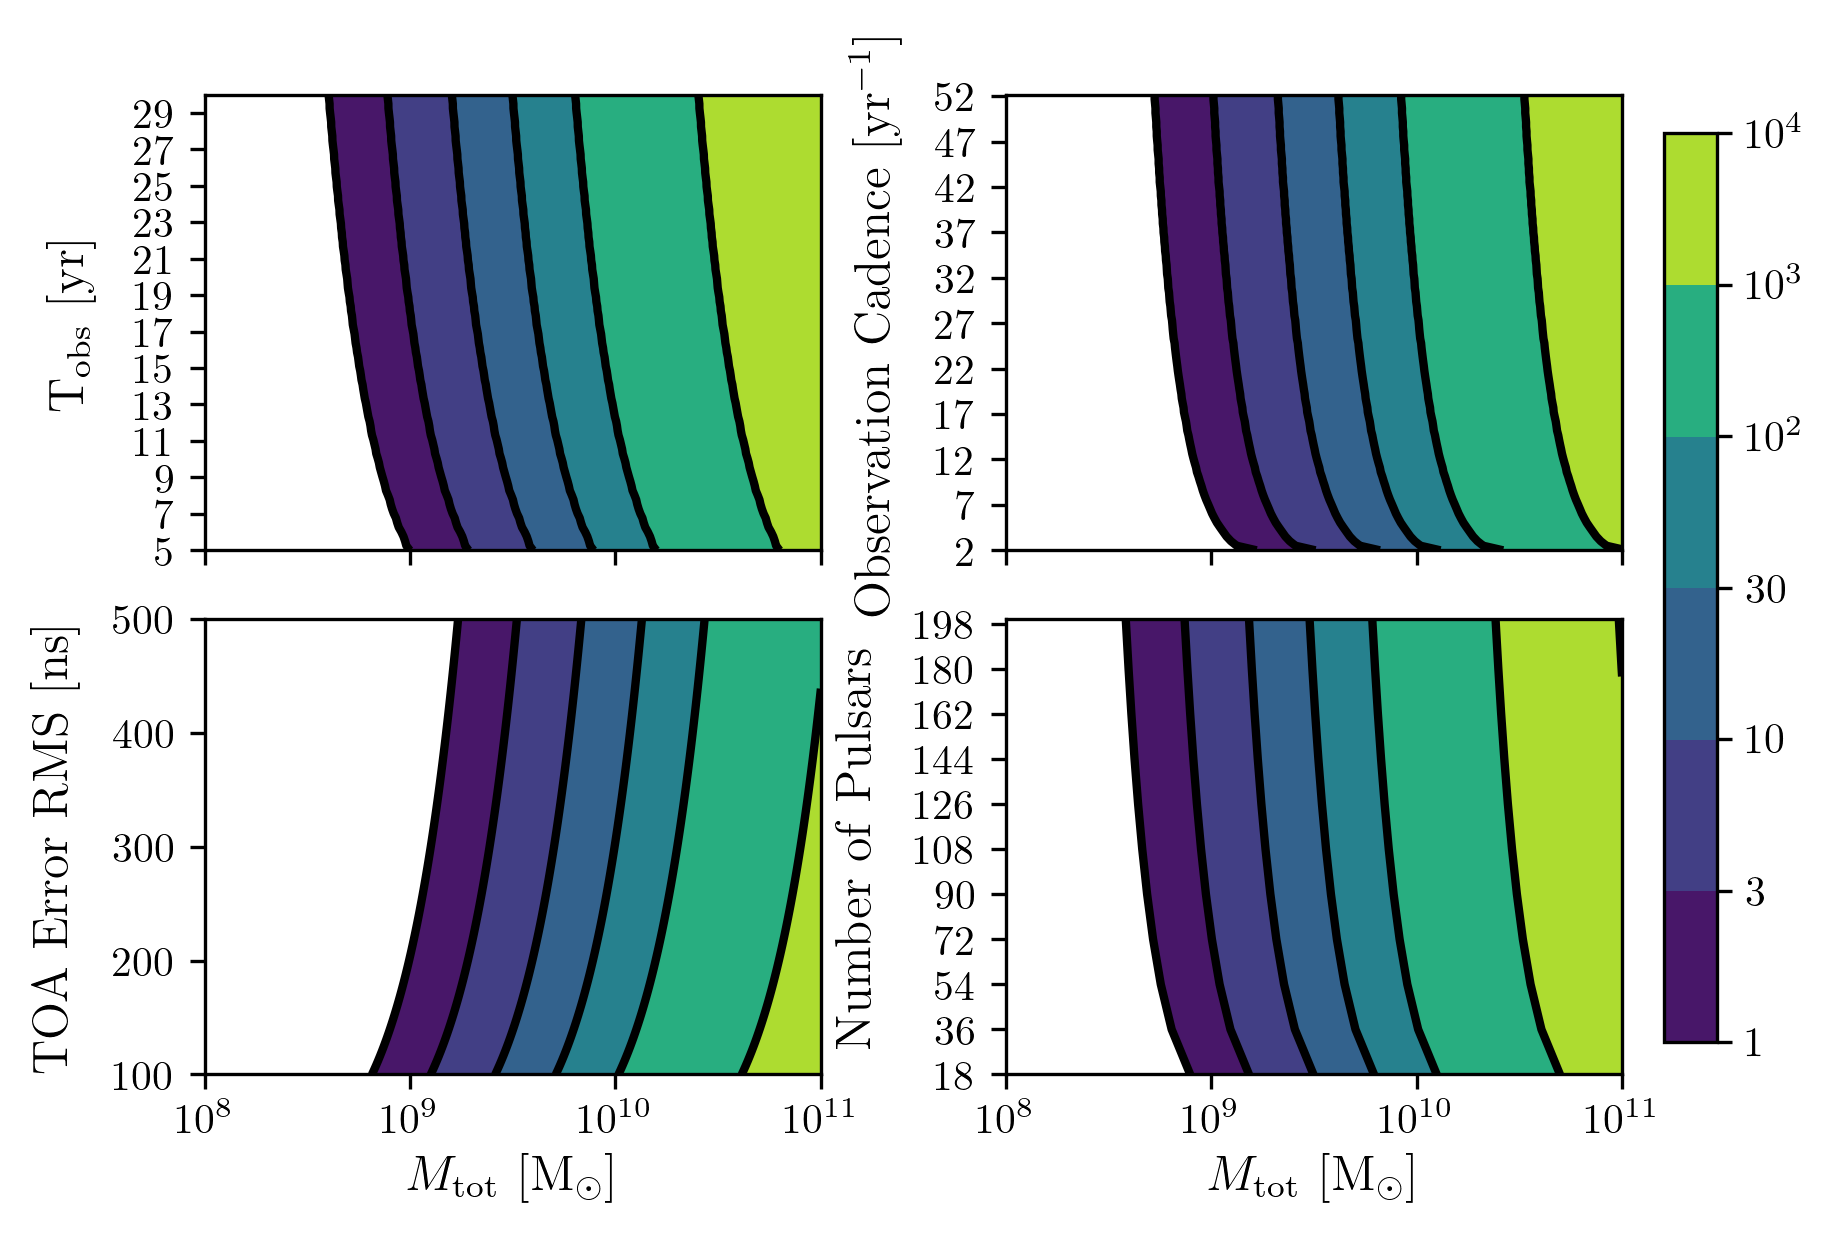

In [28]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [NANOGrav_WN_Samples_M_vs_T_obs,NANOGrav_WN_Samples_M_vs_cadence,
           NANOGrav_WN_Samples_M_vs_sigma,NANOGrav_WN_Samples_M_vs_N_p_x,NANOGrav_WN_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_WN_SNR_M_vs_T_obs,NANOGrav_WN_SNR_M_vs_cadence,
        NANOGrav_WN_SNR_M_vs_sigma,NANOGrav_WN_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_NANOGrav_WN_M_vs_params.pdf',bbox_inches='tight')

#### NANOGrav WN + GWB

In [29]:
[NANOGrav_WN_GWB_Samples_M_vs_N_p_x,NANOGrav_WN_GWB_Samples_M_vs_N_p_y,
 NANOGrav_WN_GWB_SNR_M_vs_N_p] = load_stuff('NANOGrav_WN_GWB','M','N_p',version_PTA)

[NANOGrav_WN_GWB_Samples_M_vs_T_obs,NANOGrav_WN_GWB_SNR_M_vs_T_obs] = load_stuff('NANOGrav_WN_GWB','M','T_obs',version_PTA)
[NANOGrav_WN_GWB_Samples_M_vs_cadence,NANOGrav_WN_GWB_SNR_M_vs_cadence] = load_stuff('NANOGrav_WN_GWB','M','cadence',version_PTA)
[NANOGrav_WN_GWB_Samples_M_vs_q,NANOGrav_WN_GWB_SNR_M_vs_q] = load_stuff('NANOGrav_WN_GWB','M','q',version_PTA)
[NANOGrav_WN_GWB_Samples_M_vs_chi1,NANOGrav_WN_GWB_SNR_M_vs_chi1] = load_stuff('NANOGrav_WN_GWB','M','chi1',version_PTA)
[NANOGrav_WN_GWB_Samples_M_vs_sigma,NANOGrav_WN_GWB_SNR_M_vs_sigma] = load_stuff('NANOGrav_WN_GWB','M','sigma',version_PTA)
[NANOGrav_WN_GWB_Samples_M_vs_z,NANOGrav_WN_GWB_SNR_M_vs_z] = load_stuff('NANOGrav_WN_GWB','M','z',version_PTA)

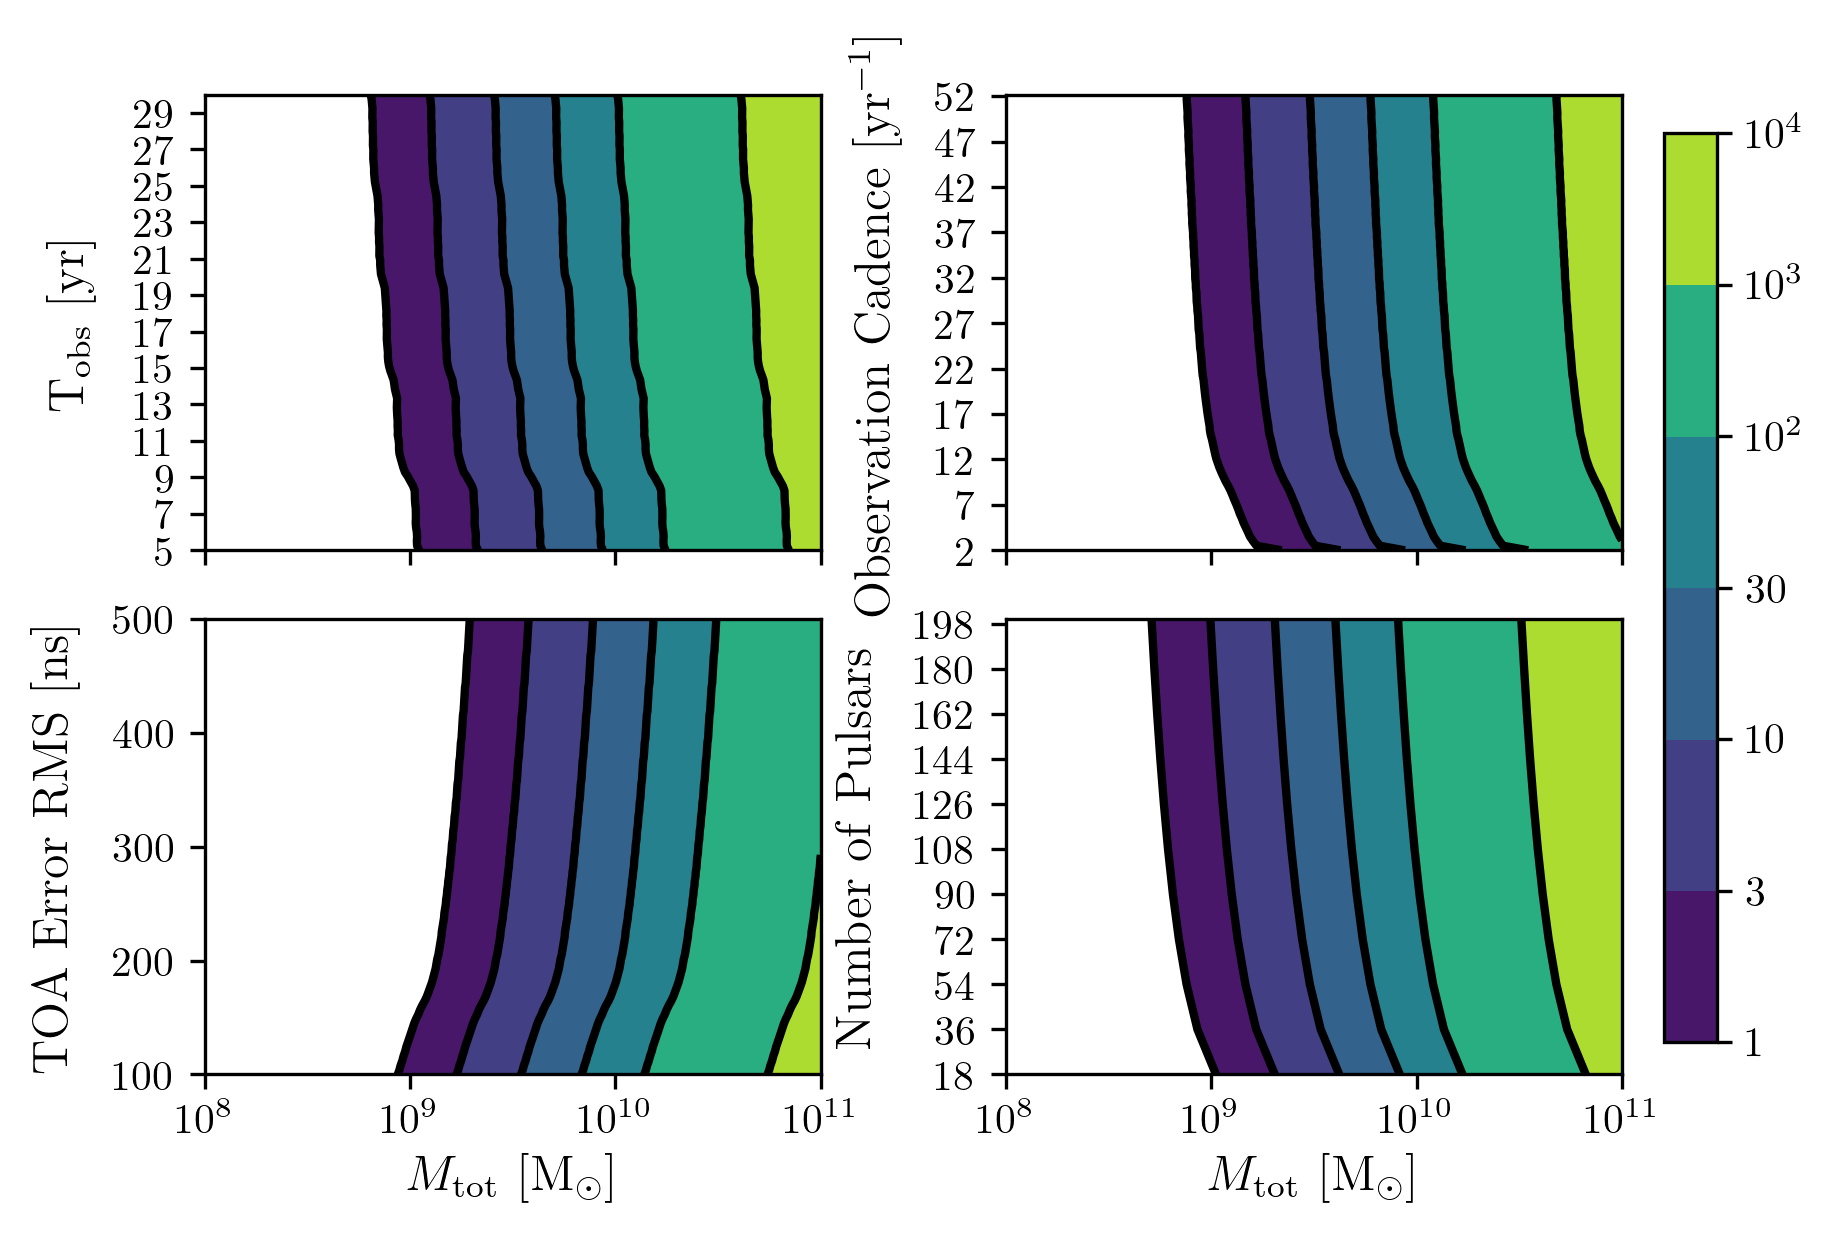

In [30]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [NANOGrav_WN_GWB_Samples_M_vs_T_obs,NANOGrav_WN_GWB_Samples_M_vs_cadence,
           NANOGrav_WN_GWB_Samples_M_vs_sigma,NANOGrav_WN_GWB_Samples_M_vs_N_p_x,NANOGrav_WN_GWB_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_WN_GWB_SNR_M_vs_T_obs,NANOGrav_WN_GWB_SNR_M_vs_cadence,
        NANOGrav_WN_GWB_SNR_M_vs_sigma,NANOGrav_WN_GWB_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_NANOGrav_WN_GWB_M_vs_params.pdf',bbox_inches='tight')

#### NANOGrav WN + RN

In [31]:
[NANOGrav_WN_RN_Samples_M_vs_N_p_x,NANOGrav_WN_RN_Samples_M_vs_N_p_y,
 NANOGrav_WN_RN_SNR_M_vs_N_p] = load_stuff('NANOGrav_WN_RN','M','N_p',version_PTA)
[NANOGrav_WN_RN_Samples_M_vs_T_obs,NANOGrav_WN_RN_SNR_M_vs_T_obs] = load_stuff('NANOGrav_WN_RN','M','T_obs',version_PTA)
[NANOGrav_WN_RN_Samples_M_vs_cadence,NANOGrav_WN_RN_SNR_M_vs_cadence] = load_stuff('NANOGrav_WN_RN','M','cadence',version_PTA)
[NANOGrav_WN_RN_Samples_M_vs_q,NANOGrav_WN_RN_SNR_M_vs_q] = load_stuff('NANOGrav_WN_RN','M','q',version_PTA)
[NANOGrav_WN_RN_Samples_M_vs_chi1,NANOGrav_WN_RN_SNR_M_vs_chi1] = load_stuff('NANOGrav_WN_RN','M','chi1',version_PTA)
[NANOGrav_WN_RN_Samples_M_vs_sigma,NANOGrav_WN_RN_SNR_M_vs_sigma] = load_stuff('NANOGrav_WN_RN','M','sigma',version_PTA)
[NANOGrav_WN_RN_Samples_M_vs_z,NANOGrav_WN_RN_SNR_M_vs_z] = load_stuff('NANOGrav_WN_RN','M','z',version_PTA)

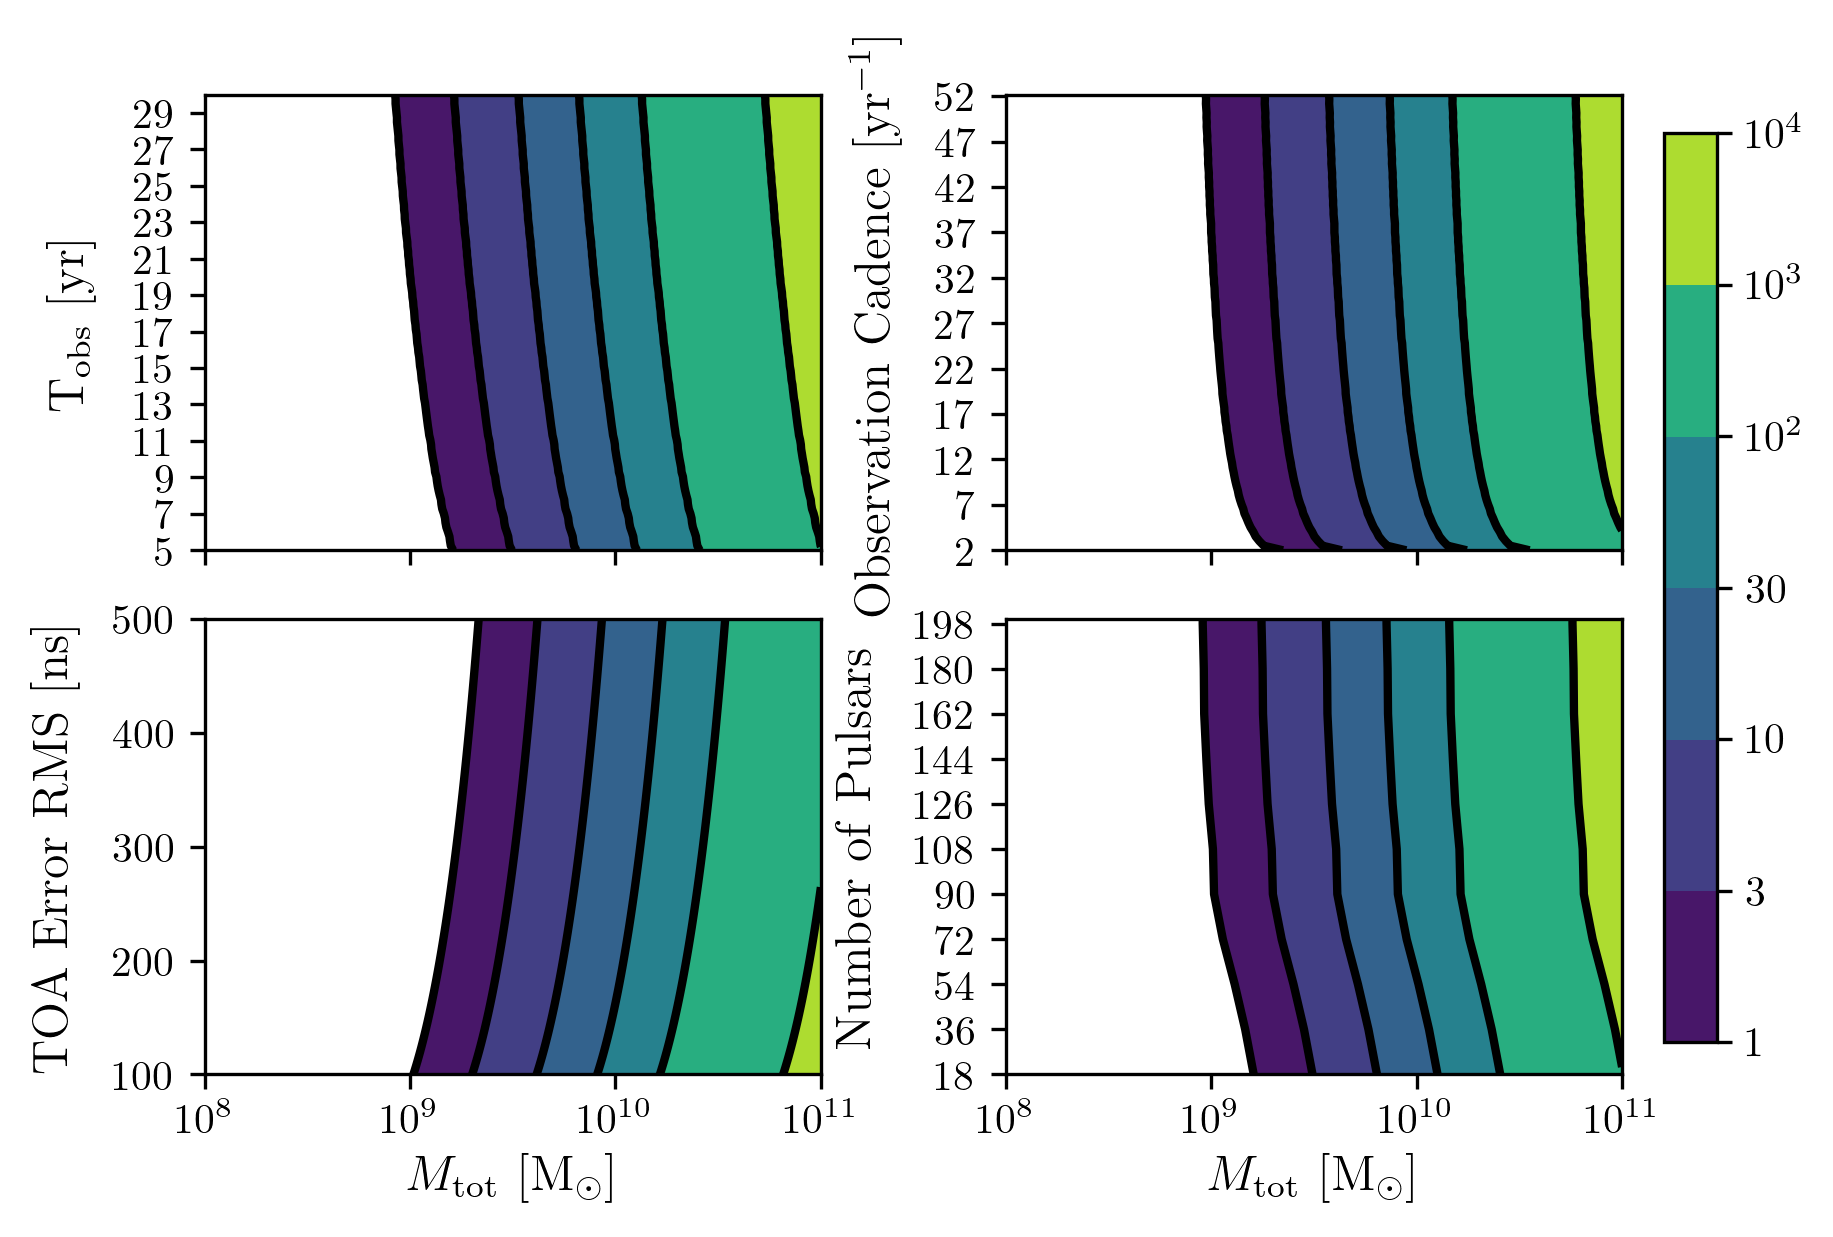

In [32]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [NANOGrav_WN_RN_Samples_M_vs_T_obs,NANOGrav_WN_RN_Samples_M_vs_cadence,
           NANOGrav_WN_RN_Samples_M_vs_sigma,NANOGrav_WN_RN_Samples_M_vs_N_p_x,NANOGrav_WN_RN_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_WN_RN_SNR_M_vs_T_obs,NANOGrav_WN_RN_SNR_M_vs_cadence,
        NANOGrav_WN_RN_SNR_M_vs_sigma,NANOGrav_WN_RN_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_NANOGrav_WN_RN_M_vs_params.pdf',bbox_inches='tight')

#### NANOGrav Realistic Noise

In [33]:
[NANOGrav_realistic_noise_Samples_M_vs_N_p_x,NANOGrav_realistic_noise_Samples_M_vs_N_p_y,
 NANOGrav_realistic_noise_SNR_M_vs_N_p] = load_stuff('NANOGrav_realistic_noise','M','N_p',version_PTA)
[NANOGrav_realistic_noise_Samples_M_vs_T_obs,NANOGrav_realistic_noise_SNR_M_vs_T_obs] = load_stuff('NANOGrav_realistic_noise','M','T_obs',version_PTA)
[NANOGrav_realistic_noise_Samples_M_vs_cadence,NANOGrav_realistic_noise_SNR_M_vs_cadence] = load_stuff('NANOGrav_realistic_noise','M','cadence',version_PTA)
[NANOGrav_realistic_noise_Samples_M_vs_q,NANOGrav_realistic_noise_SNR_M_vs_q] = load_stuff('NANOGrav_realistic_noise','M','q',version_PTA)
[NANOGrav_realistic_noise_Samples_M_vs_chi1,NANOGrav_realistic_noise_SNR_M_vs_chi1] = load_stuff('NANOGrav_realistic_noise','M','chi1',version_PTA)
[NANOGrav_realistic_noise_Samples_M_vs_sigma,NANOGrav_realistic_noise_SNR_M_vs_sigma] = load_stuff('NANOGrav_realistic_noise','M','sigma',version_PTA)
[NANOGrav_realistic_noise_Samples_M_vs_z,NANOGrav_realistic_noise_SNR_M_vs_z] = load_stuff('NANOGrav_realistic_noise','M','z',version_PTA)

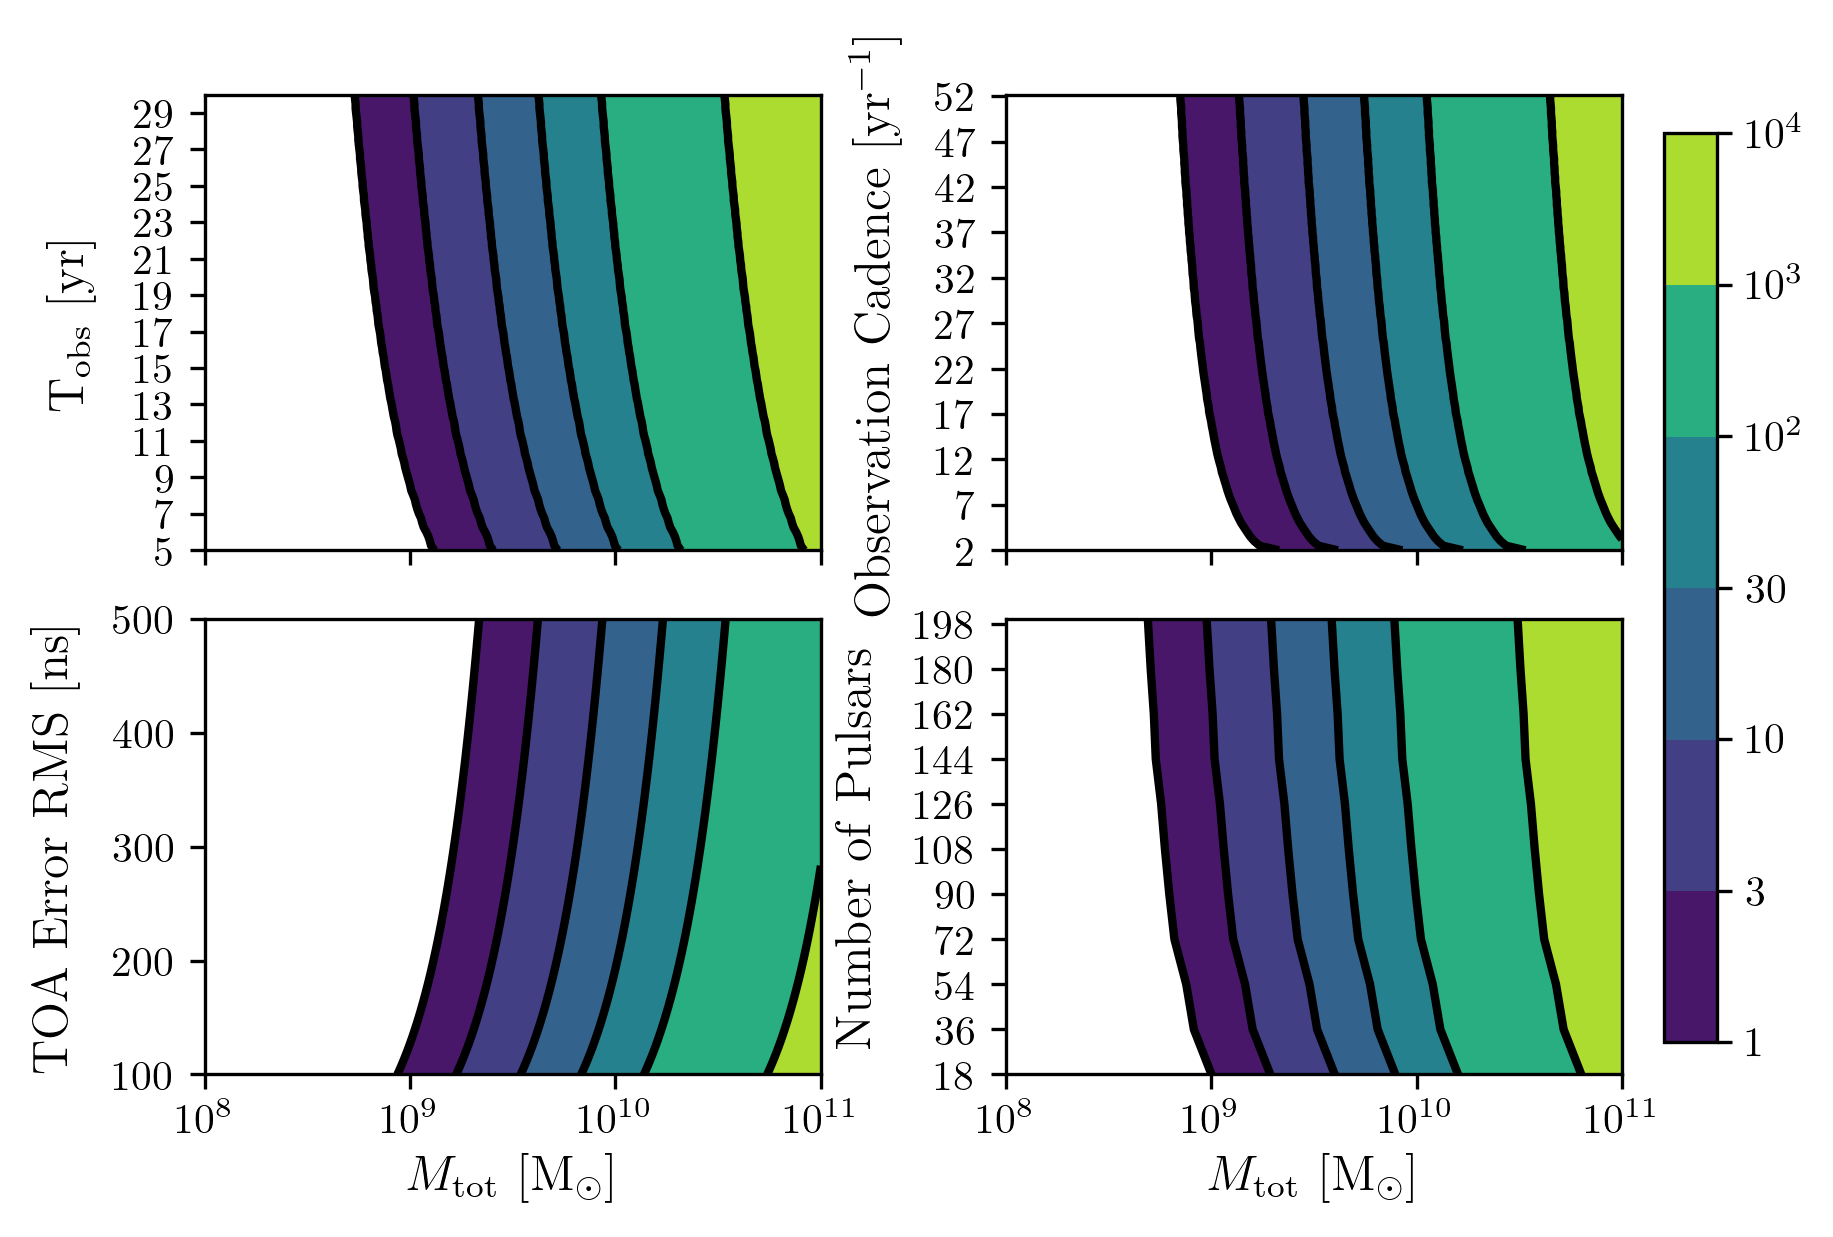

In [34]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [NANOGrav_realistic_noise_Samples_M_vs_T_obs,NANOGrav_realistic_noise_Samples_M_vs_cadence,
           NANOGrav_realistic_noise_Samples_M_vs_sigma,NANOGrav_realistic_noise_Samples_M_vs_N_p_x,NANOGrav_realistic_noise_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_realistic_noise_SNR_M_vs_T_obs,NANOGrav_realistic_noise_SNR_M_vs_cadence,
        NANOGrav_realistic_noise_SNR_M_vs_sigma,NANOGrav_realistic_noise_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_NANOGrav_realistic_noise_M_vs_params.png',bbox_inches='tight')

#### NANOGrav Sampled Noise + GWB

In [35]:
[NANOGrav_realistic_noise_GWB_Samples_M_vs_N_p_x,NANOGrav_realistic_noise_GWB_Samples_M_vs_N_p_y,
 NANOGrav_realistic_noise_GWB_SNR_M_vs_N_p] = load_stuff('NANOGrav_realistic_noise_GWB','M','N_p',version_PTA)
[NANOGrav_realistic_noise_GWB_Samples_M_vs_T_obs,NANOGrav_realistic_noise_GWB_SNR_M_vs_T_obs] = load_stuff('NANOGrav_realistic_noise_GWB','M','T_obs',version_PTA)
[NANOGrav_realistic_noise_GWB_Samples_M_vs_cadence,NANOGrav_realistic_noise_GWB_SNR_M_vs_cadence] = load_stuff('NANOGrav_realistic_noise_GWB','M','cadence',version_PTA)
[NANOGrav_realistic_noise_GWB_Samples_M_vs_q,NANOGrav_realistic_noise_GWB_SNR_M_vs_q] = load_stuff('NANOGrav_realistic_noise_GWB','M','q',version_PTA)
[NANOGrav_realistic_noise_GWB_Samples_M_vs_chi1,NANOGrav_realistic_noise_GWB_SNR_M_vs_chi1] = load_stuff('NANOGrav_realistic_noise_GWB','M','chi1',version_PTA)
[NANOGrav_realistic_noise_GWB_Samples_M_vs_sigma,NANOGrav_realistic_noise_GWB_SNR_M_vs_sigma] = load_stuff('NANOGrav_realistic_noise_GWB','M','sigma',version_PTA)
[NANOGrav_realistic_noise_GWB_Samples_M_vs_z,NANOGrav_realistic_noise_GWB_SNR_M_vs_z] = load_stuff('NANOGrav_realistic_noise_GWB','M','z',version_PTA)

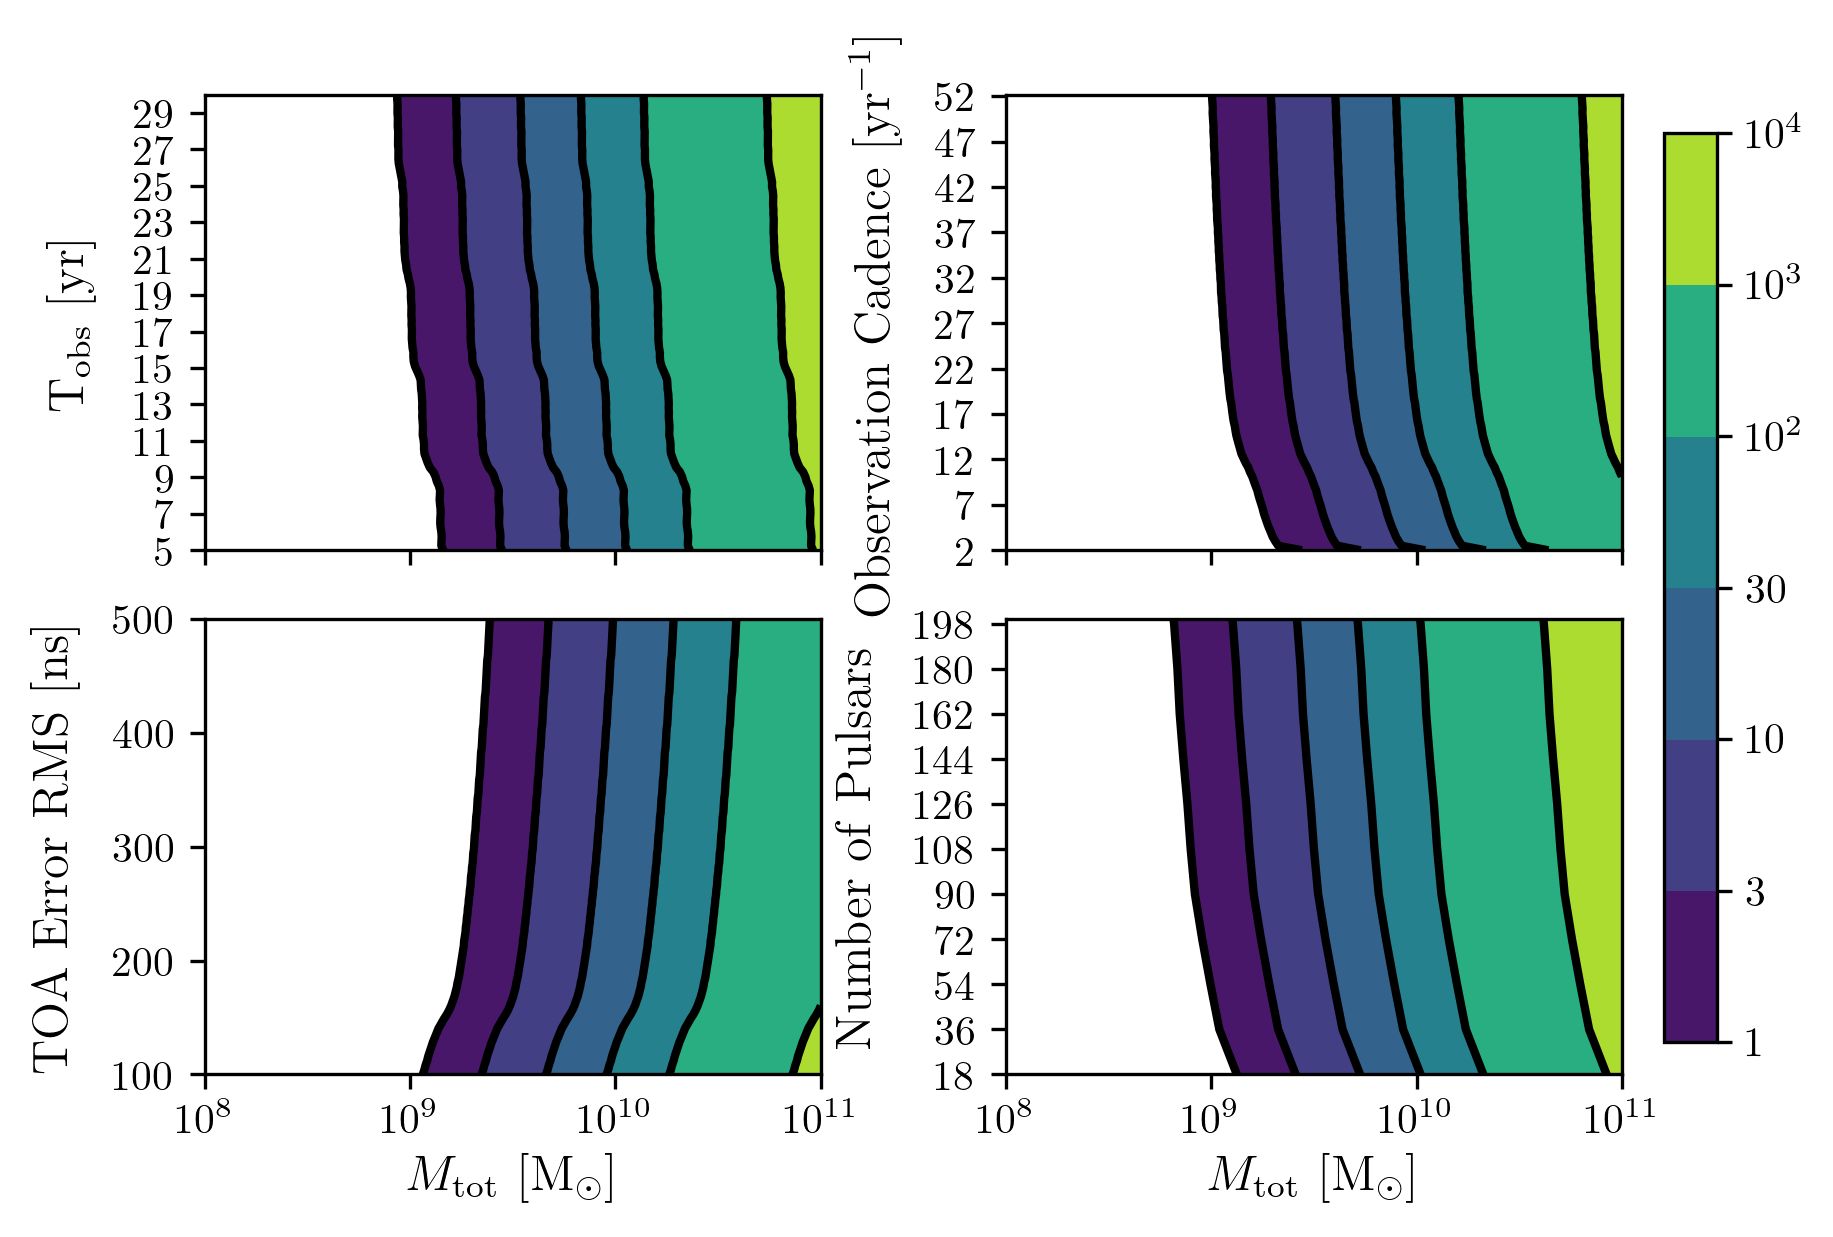

In [36]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [NANOGrav_realistic_noise_GWB_Samples_M_vs_T_obs,NANOGrav_realistic_noise_GWB_Samples_M_vs_cadence,
           NANOGrav_realistic_noise_GWB_Samples_M_vs_sigma,NANOGrav_realistic_noise_GWB_Samples_M_vs_N_p_x,NANOGrav_realistic_noise_GWB_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_realistic_noise_GWB_SNR_M_vs_T_obs,NANOGrav_realistic_noise_GWB_SNR_M_vs_cadence,
        NANOGrav_realistic_noise_GWB_SNR_M_vs_sigma,NANOGrav_realistic_noise_GWB_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=4.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_NANOGrav_realistic_noise_GWB_M_vs_params.pdf',bbox_inches='tight')

#### NANOGrav 11yr

In [37]:
[NANOGrav_11yr_Samples_M_vs_q,NANOGrav_11yr_SNR_M_vs_q] = load_stuff('NANOGrav_11yr','M','q',version_PTA)
[NANOGrav_11yr_Samples_M_vs_chi1,NANOGrav_11yr_SNR_M_vs_chi1] = load_stuff('NANOGrav_11yr','M','chi1',version_PTA)
[NANOGrav_11yr_Samples_M_vs_z,NANOGrav_11yr_SNR_M_vs_z] = load_stuff('NANOGrav_11yr','M','z',version_PTA)

### NANOGrav Model Comparison Plots

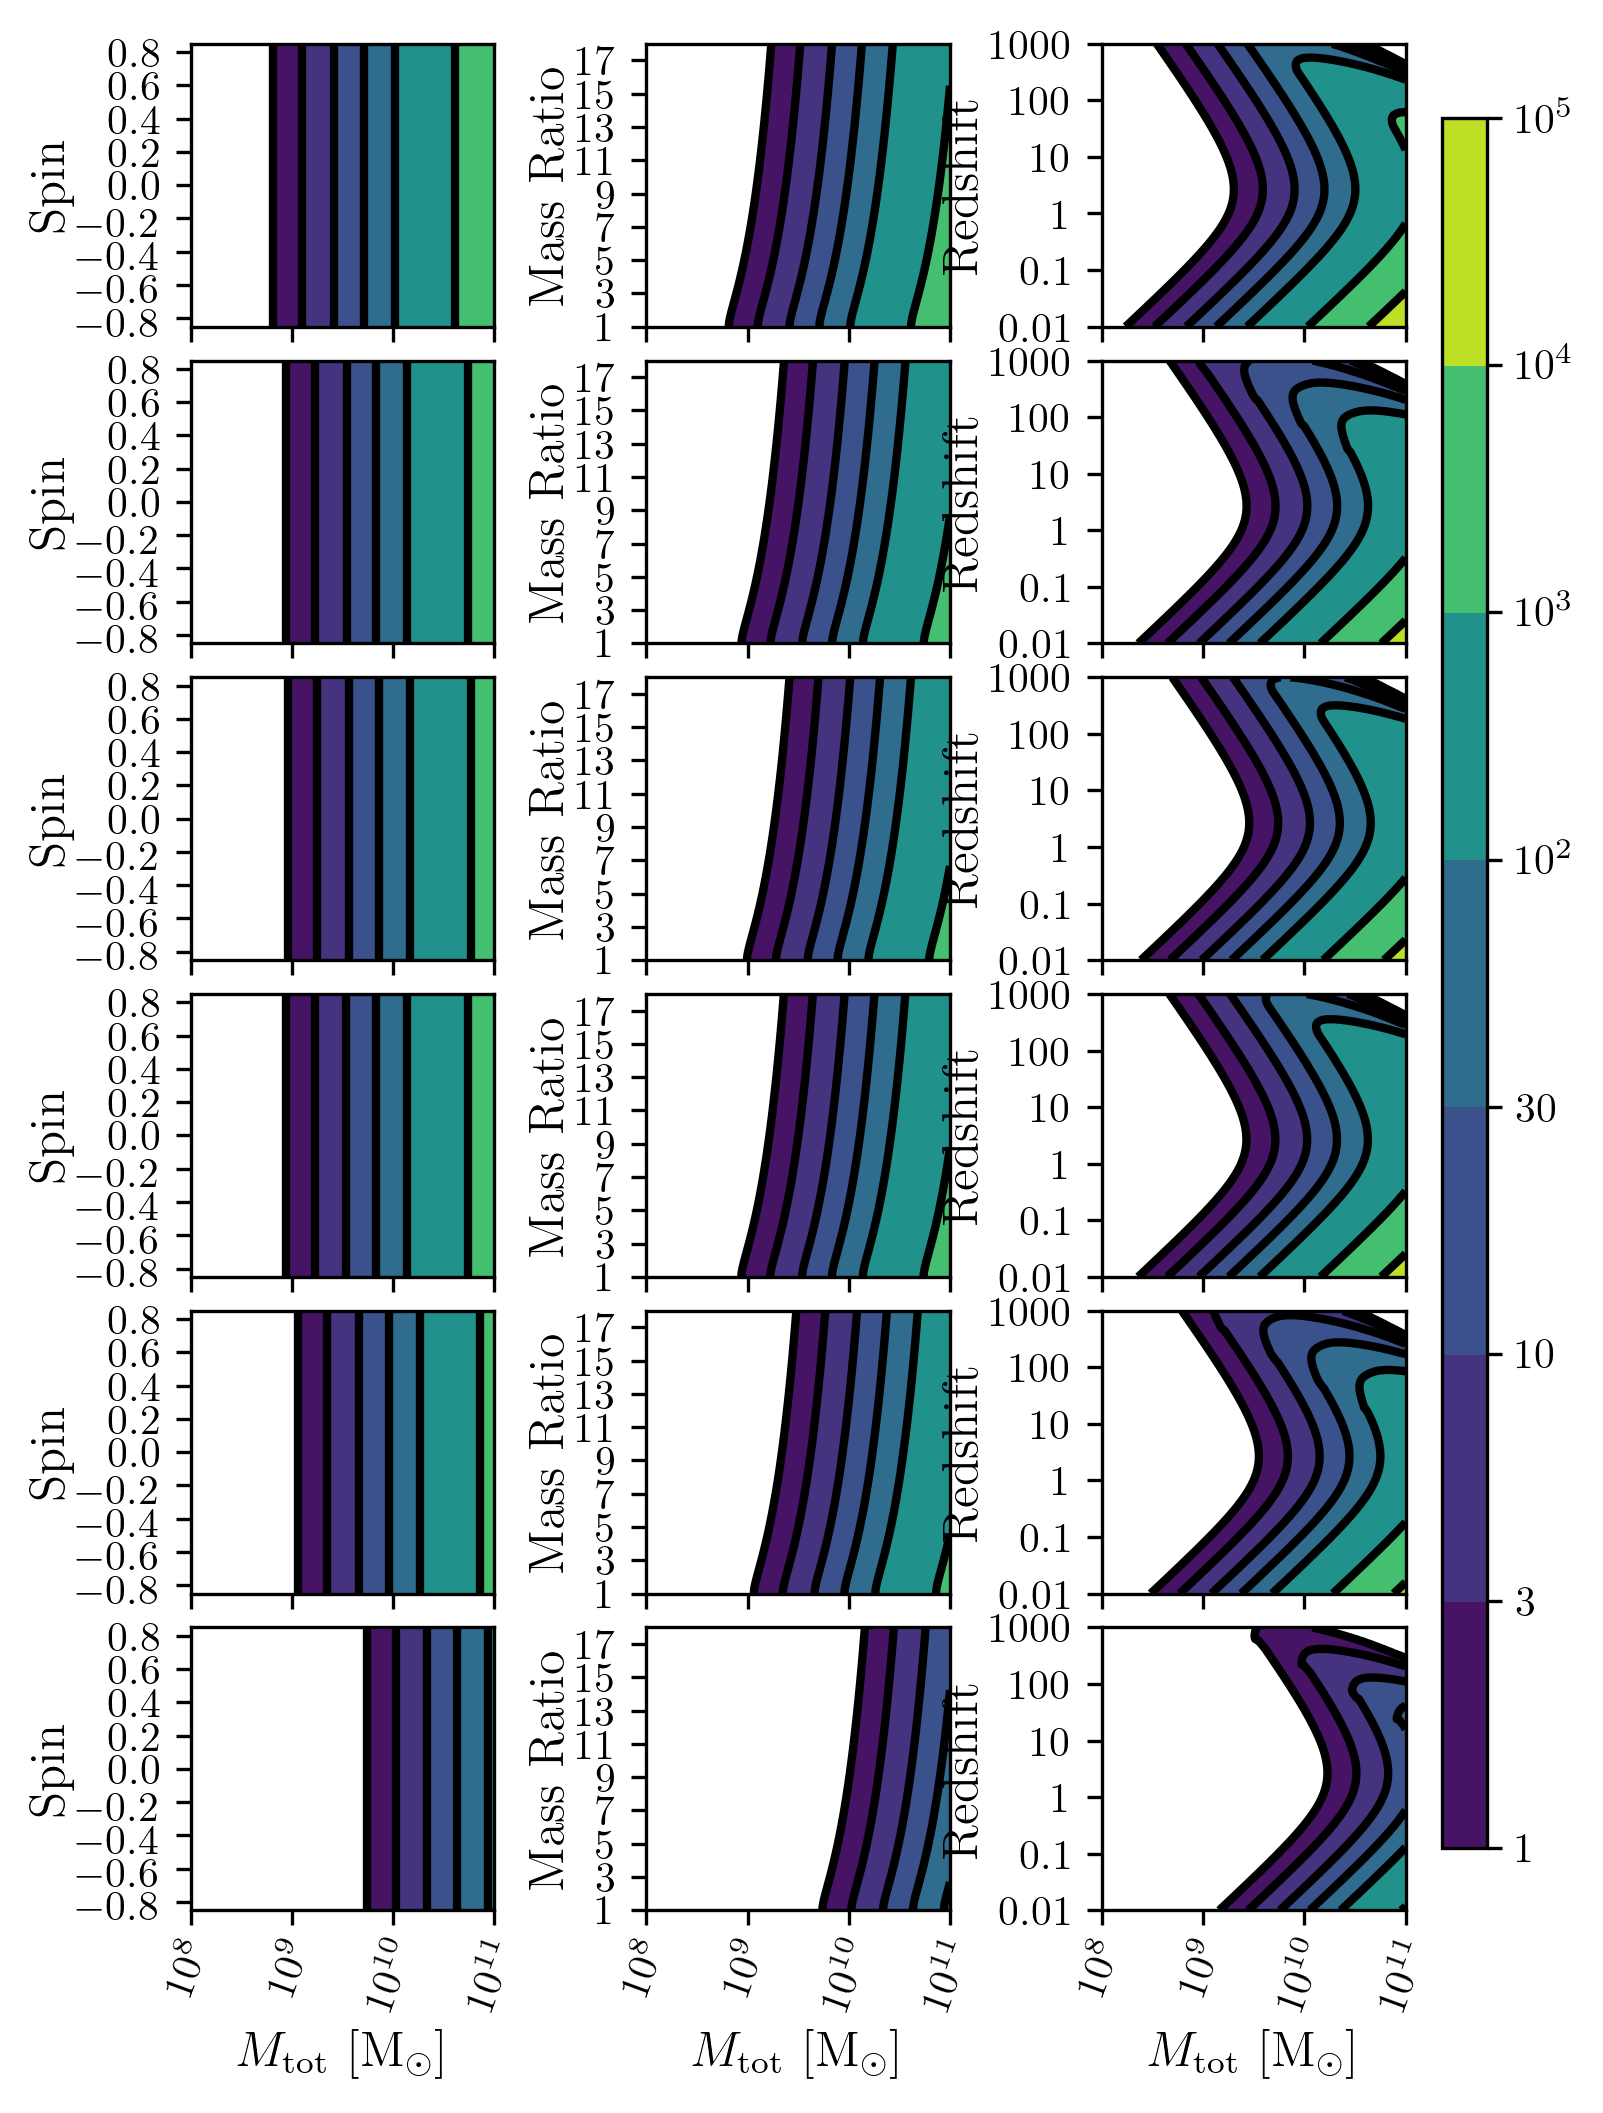

In [38]:
#########################
#Make the Contour Plots
figsize = get_fig_size(width=6.0,scale=0.45)
fig, axes = plt.subplots(6,3,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_chi1,NANOGrav_WN_Samples_M_vs_q,NANOGrav_WN_Samples_M_vs_z,
           NANOGrav_WN_GWB_Samples_M_vs_chi1,NANOGrav_WN_GWB_Samples_M_vs_q,NANOGrav_WN_GWB_Samples_M_vs_z,
           NANOGrav_WN_RN_Samples_M_vs_chi1,NANOGrav_WN_RN_Samples_M_vs_q,NANOGrav_WN_RN_Samples_M_vs_z,
           NANOGrav_realistic_noise_Samples_M_vs_chi1,NANOGrav_realistic_noise_Samples_M_vs_q,
           NANOGrav_realistic_noise_Samples_M_vs_z,
           NANOGrav_realistic_noise_GWB_Samples_M_vs_chi1,NANOGrav_realistic_noise_GWB_Samples_M_vs_q,
           NANOGrav_realistic_noise_GWB_Samples_M_vs_z,
           NANOGrav_11yr_Samples_M_vs_chi1,NANOGrav_11yr_Samples_M_vs_q,NANOGrav_11yr_Samples_M_vs_z,
          ]
SNRs = [NANOGrav_WN_SNR_M_vs_chi1,NANOGrav_WN_SNR_M_vs_q,NANOGrav_WN_SNR_M_vs_z,
        NANOGrav_WN_GWB_SNR_M_vs_chi1,NANOGrav_WN_GWB_SNR_M_vs_q,NANOGrav_WN_GWB_SNR_M_vs_z,
        NANOGrav_WN_RN_SNR_M_vs_chi1,NANOGrav_WN_RN_SNR_M_vs_q,NANOGrav_WN_RN_SNR_M_vs_z,
        NANOGrav_realistic_noise_SNR_M_vs_chi1,NANOGrav_realistic_noise_SNR_M_vs_q,
        NANOGrav_realistic_noise_SNR_M_vs_z,
        NANOGrav_realistic_noise_GWB_SNR_M_vs_chi1,NANOGrav_realistic_noise_GWB_SNR_M_vs_q,
        NANOGrav_realistic_noise_GWB_SNR_M_vs_z,
        NANOGrav_11yr_SNR_M_vs_chi1,NANOGrav_11yr_SNR_M_vs_q,NANOGrav_11yr_SNR_M_vs_z,
       ]
var_ys = ['chi1','q','z']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .12
wspace = .5
y_label_loc = -.275

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        var_y=var_ys[j]
        if ii%3 == 0:
            if ii == (np.shape(axes)[0]*np.shape(axes)[1])-3:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
            else:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        ii += 1

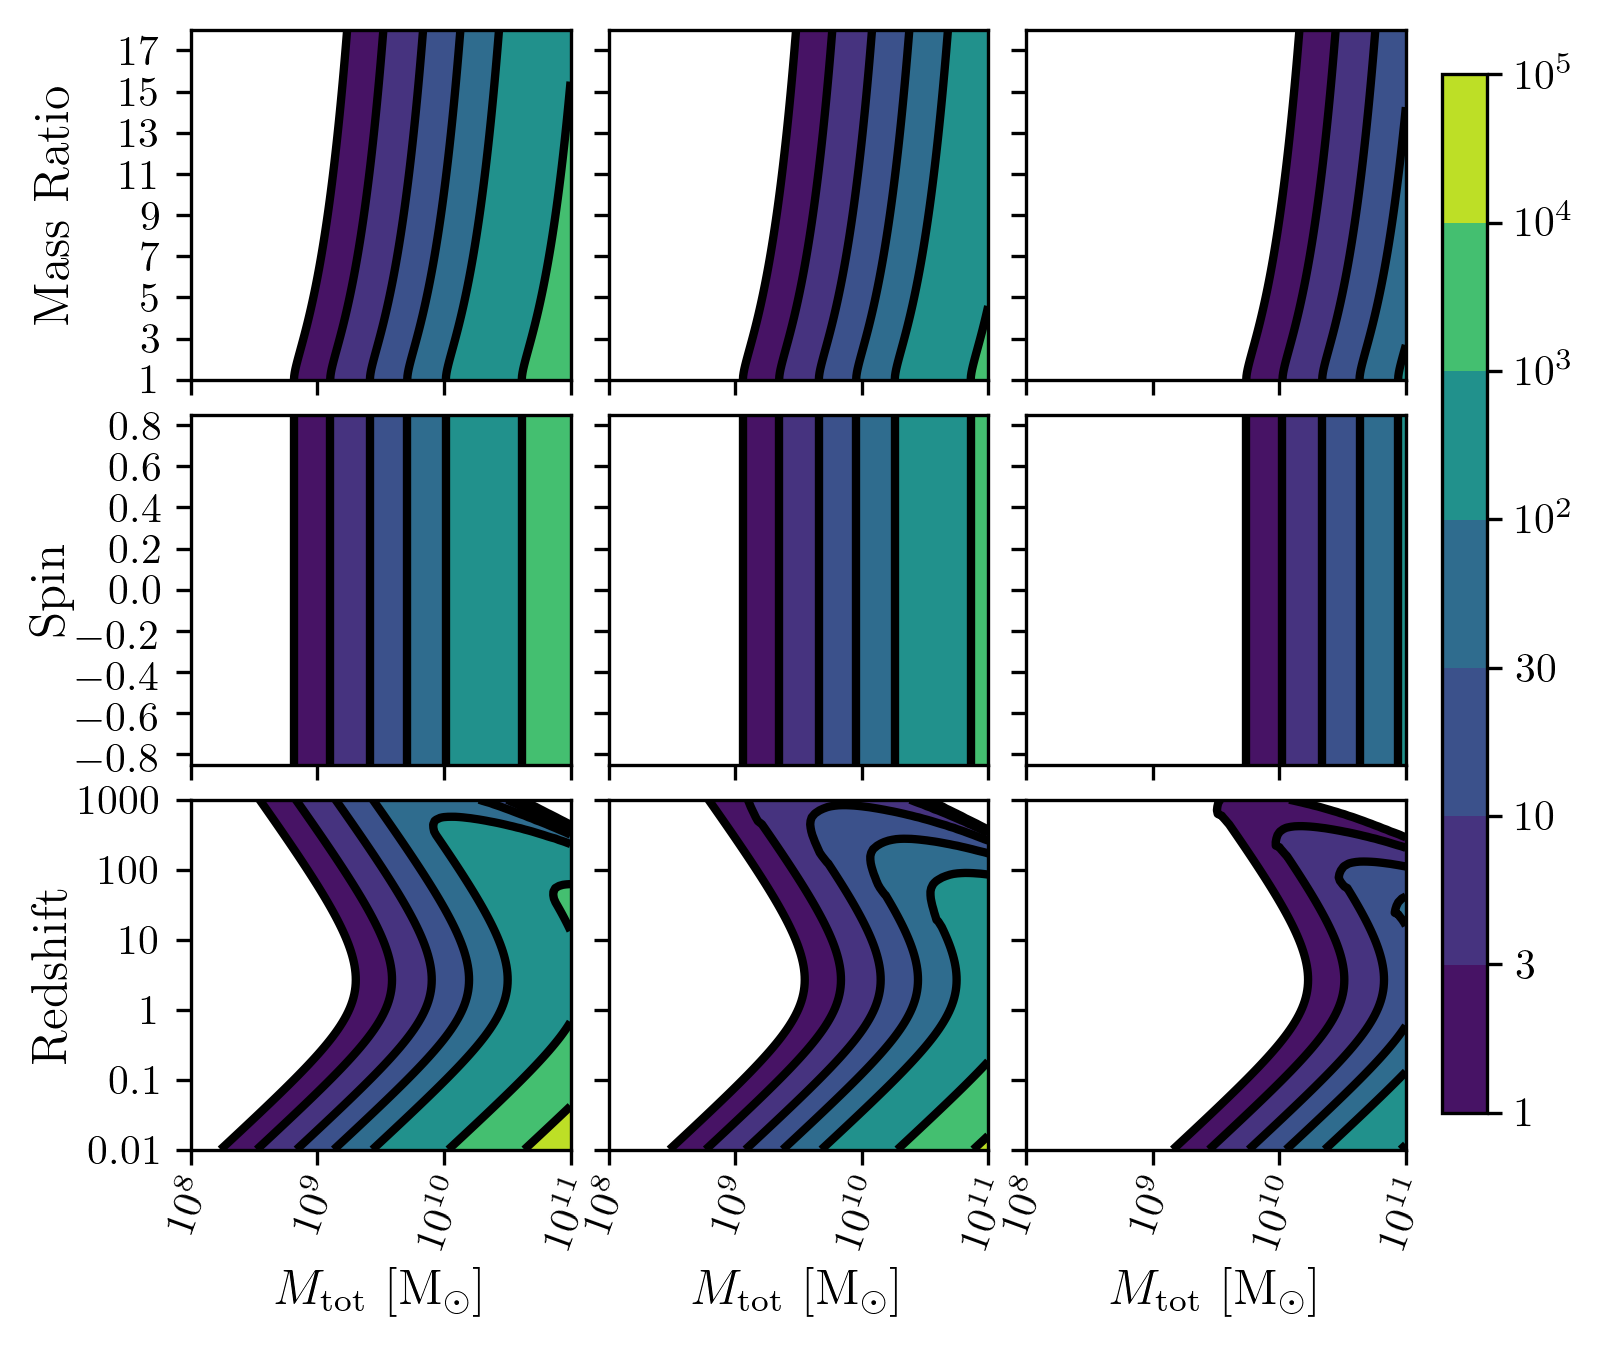

In [92]:
#########################
#Make the Contour Plots
figsize = get_fig_size(width=6.0,scale=0.75)
fig, axes = plt.subplots(3,3,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_q,NANOGrav_realistic_noise_GWB_Samples_M_vs_q,NANOGrav_11yr_Samples_M_vs_q,
           NANOGrav_WN_Samples_M_vs_chi1,NANOGrav_realistic_noise_GWB_Samples_M_vs_chi1,NANOGrav_11yr_Samples_M_vs_chi1,
           NANOGrav_WN_Samples_M_vs_z,NANOGrav_realistic_noise_GWB_Samples_M_vs_z,NANOGrav_11yr_Samples_M_vs_z,
          ]
SNRs = [NANOGrav_WN_SNR_M_vs_q,NANOGrav_realistic_noise_GWB_SNR_M_vs_q,NANOGrav_11yr_SNR_M_vs_q,
        NANOGrav_WN_SNR_M_vs_chi1,NANOGrav_realistic_noise_GWB_SNR_M_vs_chi1,NANOGrav_11yr_SNR_M_vs_chi1,
        NANOGrav_WN_SNR_M_vs_z,NANOGrav_realistic_noise_GWB_SNR_M_vs_z,NANOGrav_11yr_SNR_M_vs_z,
       ]
var_ys = ['q','chi1','z']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .1
wspace = .1

ii = 0
for i in range(np.shape(axes)[0]):
    var_y=var_ys[i]
    for j in range(np.shape(axes)[1]):
        #First Column
        if ii%3 == 0:
            #Last row
            if ii == (np.shape(axes)[0]*np.shape(axes)[1])-3:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
            #Middle Row
            elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-6:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':0.5})
            else:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':10})
        #Bottom Right
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        #Bottom Middle
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        ii += 1
#fig.savefig(save_directory+'SNR_NANOGrav_M_vs_params.pdf',bbox_inches='tight')

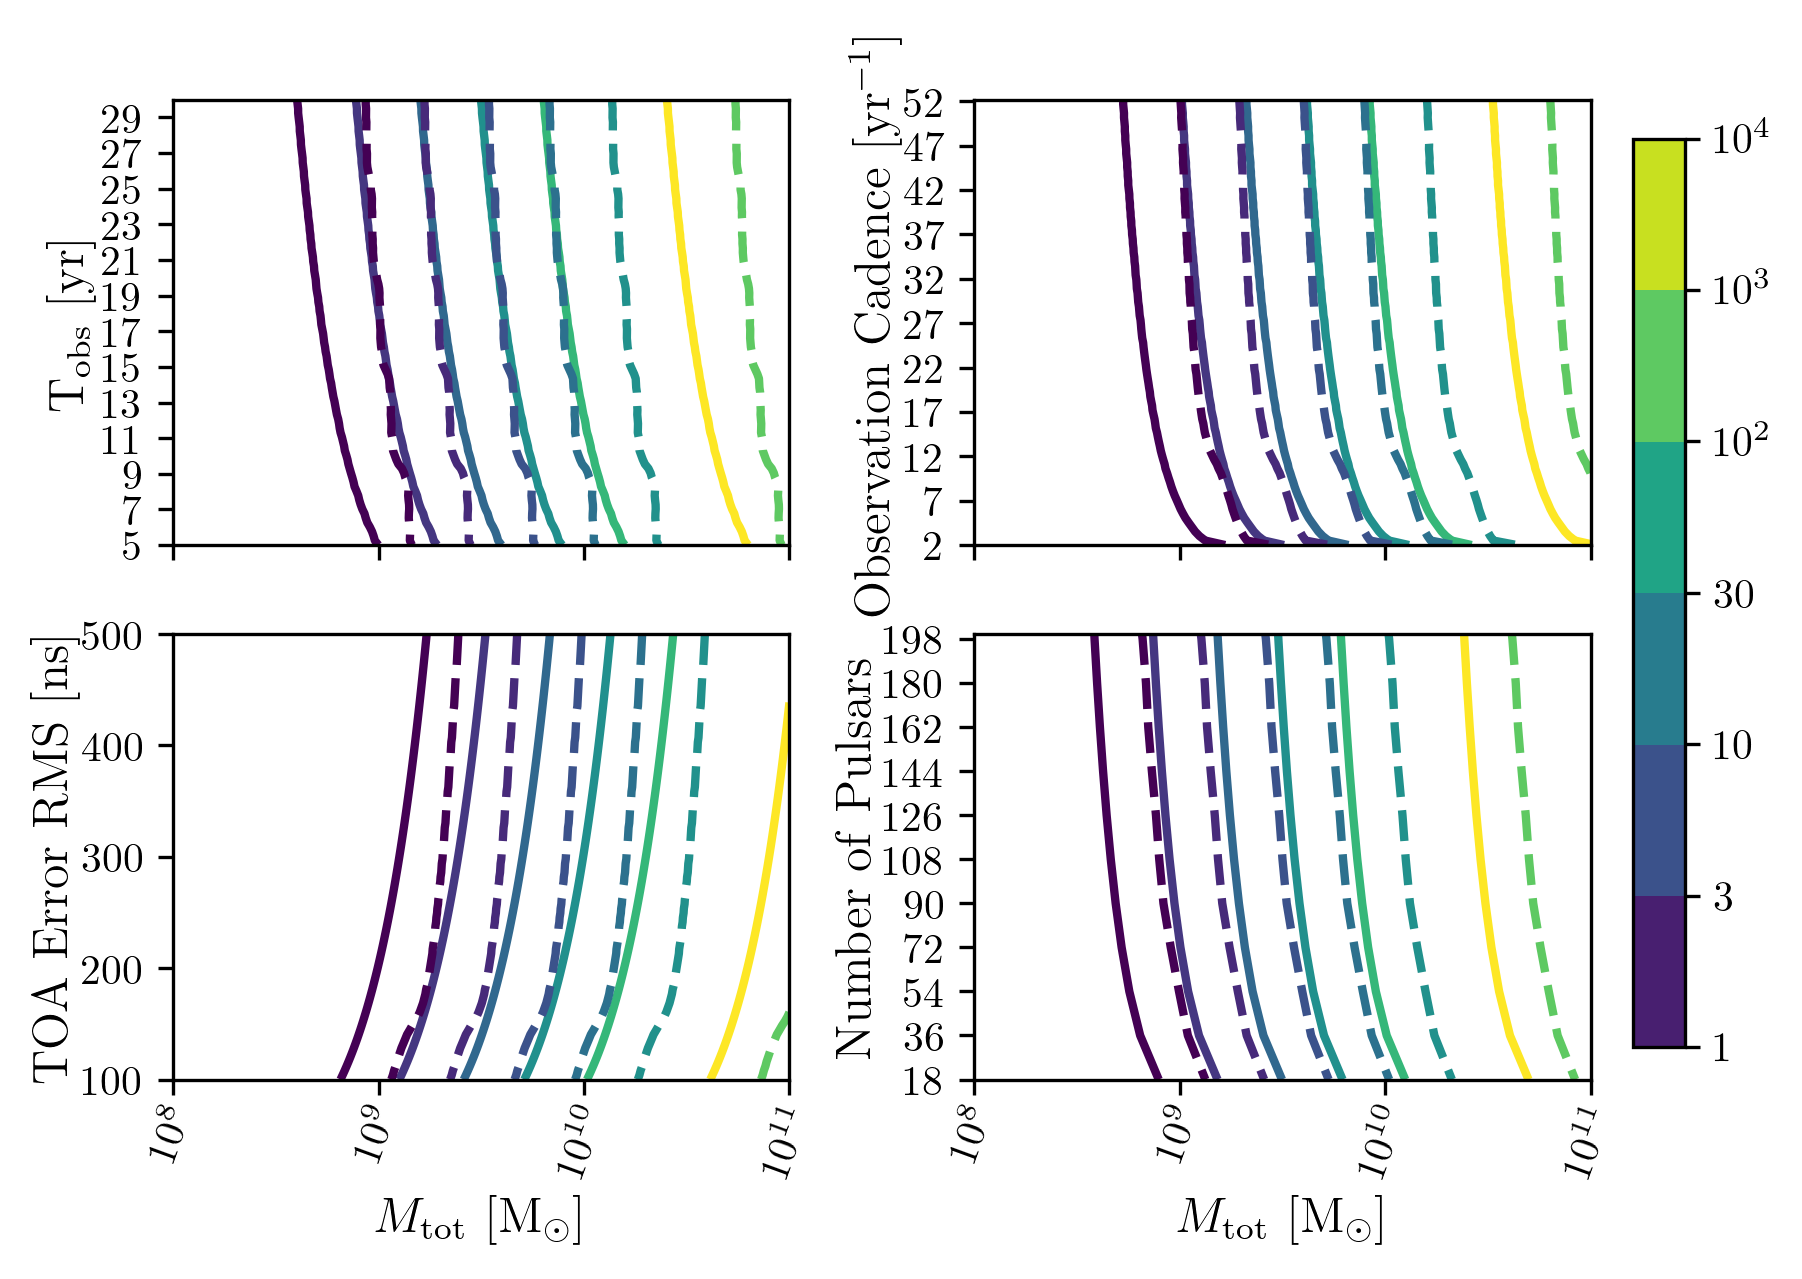

In [56]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [NANOGrav_WN_Samples_M_vs_T_obs,NANOGrav_WN_Samples_M_vs_cadence,
           NANOGrav_WN_Samples_M_vs_sigma,NANOGrav_WN_Samples_M_vs_N_p_x,NANOGrav_WN_Samples_M_vs_N_p_y,
           NANOGrav_realistic_noise_GWB_Samples_M_vs_T_obs,NANOGrav_realistic_noise_GWB_Samples_M_vs_cadence,
           NANOGrav_realistic_noise_GWB_Samples_M_vs_sigma,NANOGrav_realistic_noise_GWB_Samples_M_vs_N_p_x,NANOGrav_realistic_noise_GWB_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_WN_SNR_M_vs_T_obs,NANOGrav_WN_SNR_M_vs_cadence,
        NANOGrav_WN_SNR_M_vs_sigma,NANOGrav_WN_SNR_M_vs_N_p,
        NANOGrav_realistic_noise_GWB_SNR_M_vs_T_obs,NANOGrav_realistic_noise_GWB_SNR_M_vs_cadence,
        NANOGrav_realistic_noise_GWB_SNR_M_vs_sigma,NANOGrav_realistic_noise_GWB_SNR_M_vs_N_p]

var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=3.0
hspace = .2
wspace = .3
y_label_loc = -.174

og_alpha = 1.0
og_line_color = 'k'
double_idx = 5
double_alpha = 1.0
double_line_color = 'w'
cline_style='--'

cfill = False

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45},
                     contour_kwargs={'cmap':'viridis'},cfill=cfill)

            Plot_SNR('M',samples[double_idx+ii],var_ys[ii],
                     samples[double_idx+ii+1],SNRs[double_idx-1+ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45},
                     contour_kwargs={'cmap':'viridis','linestyles':cline_style},cfill=cfill)

        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45},
                     contour_kwargs={'cmap':'viridis'},cfill=cfill)

            Plot_SNR('M',samples[double_idx+ii][:,0],var_ys[ii],
                     samples[double_idx+ii][:,1],SNRs[double_idx-1+ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45},
                     contour_kwargs={'cmap':'viridis','linestyles':cline_style},cfill=cfill)
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':0.45},
                     contour_kwargs={'cmap':'viridis'},cfill=cfill)

            Plot_SNR('M',samples[double_idx+ii][:,0],var_ys[ii],
                     samples[double_idx+ii][:,1],SNRs[double_idx-1+ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':0.45},
                     contour_kwargs={'cmap':'viridis','linestyles':cline_style},cfill=cfill)
        ii += 1
        
#fig.savefig(save_directory+'SNR_NANOGrav_2_Examps_M_vs_params.pdf',bbox_inches='tight')

M vs. q

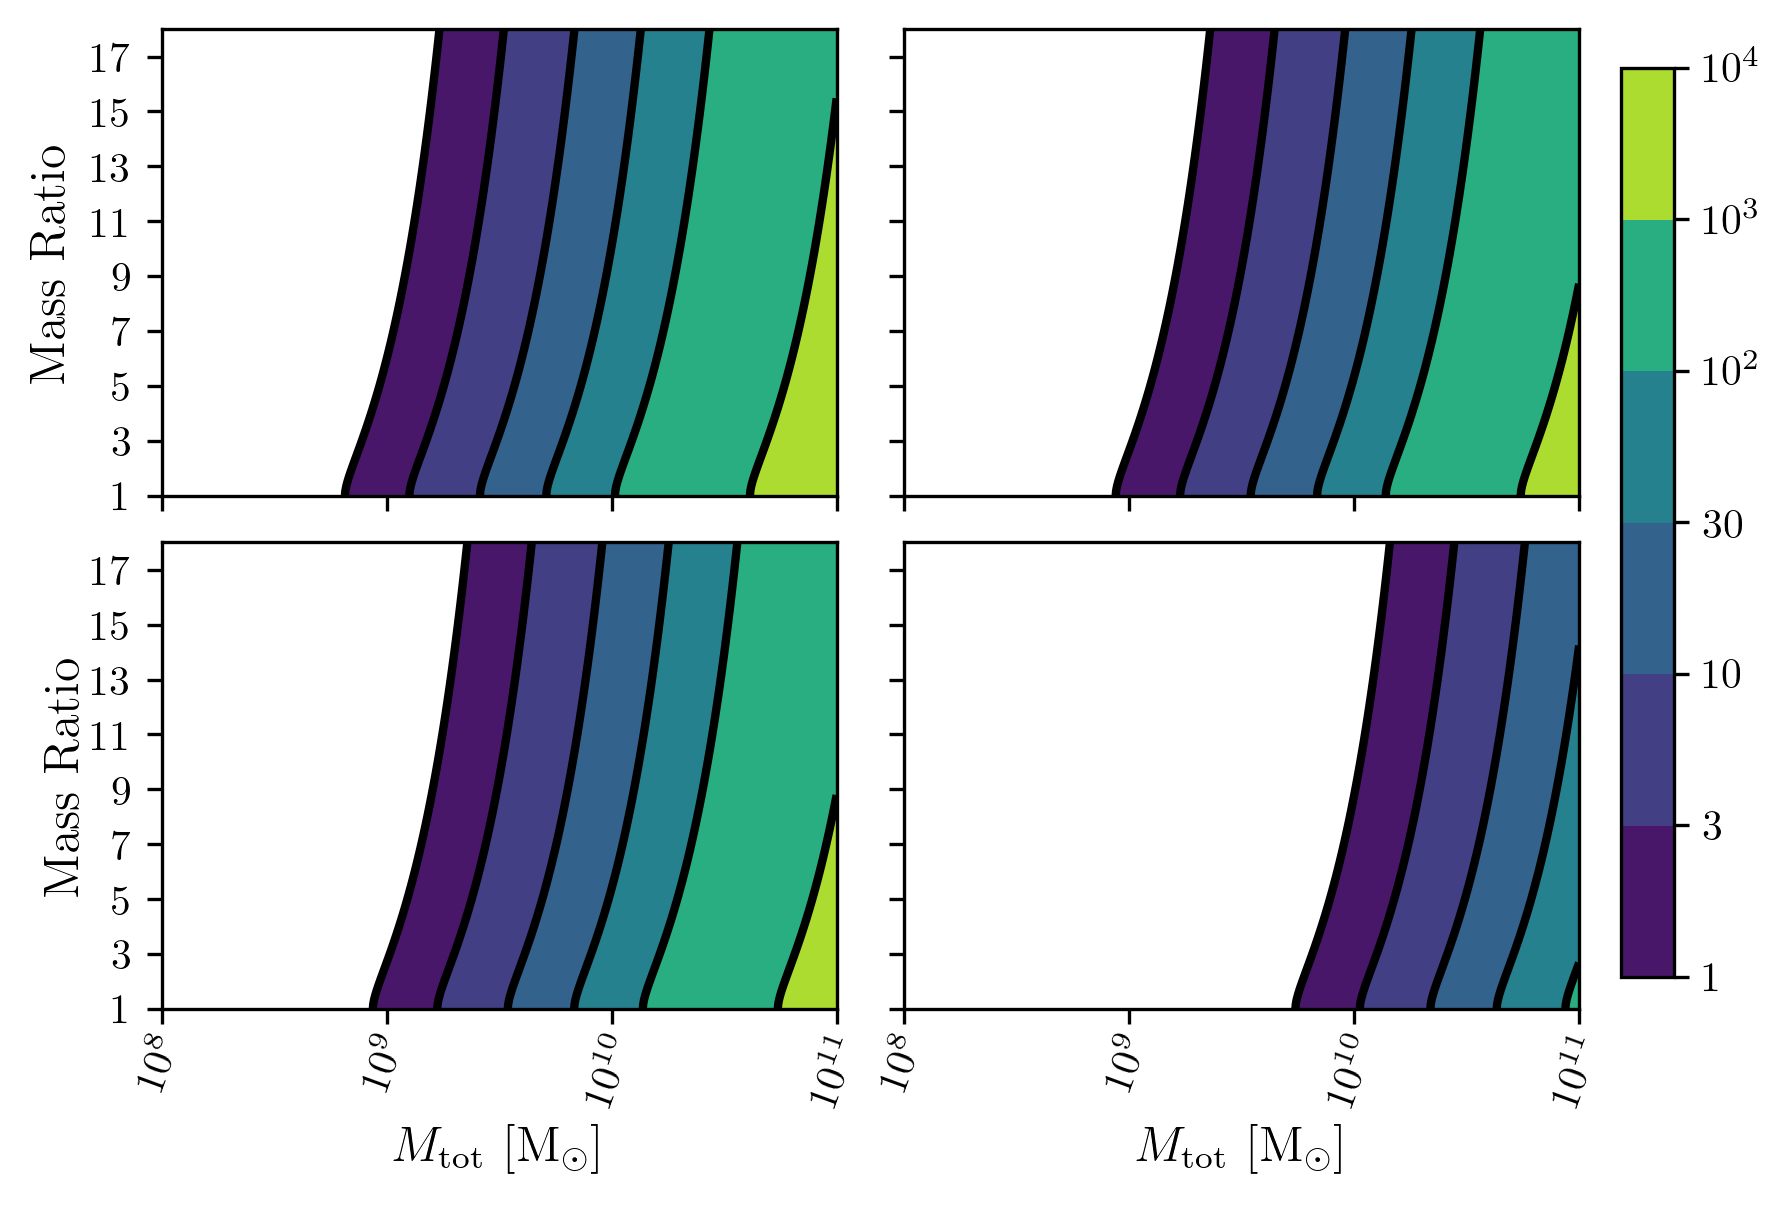

In [59]:
#########################
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_q,NANOGrav_WN_GWB_Samples_M_vs_q,
           NANOGrav_realistic_noise_Samples_M_vs_q,NANOGrav_11yr_Samples_M_vs_q]
SNRs = [NANOGrav_WN_SNR_M_vs_q,NANOGrav_WN_GWB_SNR_M_vs_q,
        NANOGrav_realistic_noise_SNR_M_vs_q,NANOGrav_11yr_SNR_M_vs_q]
loglevelMax=4.0
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'q'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs. z

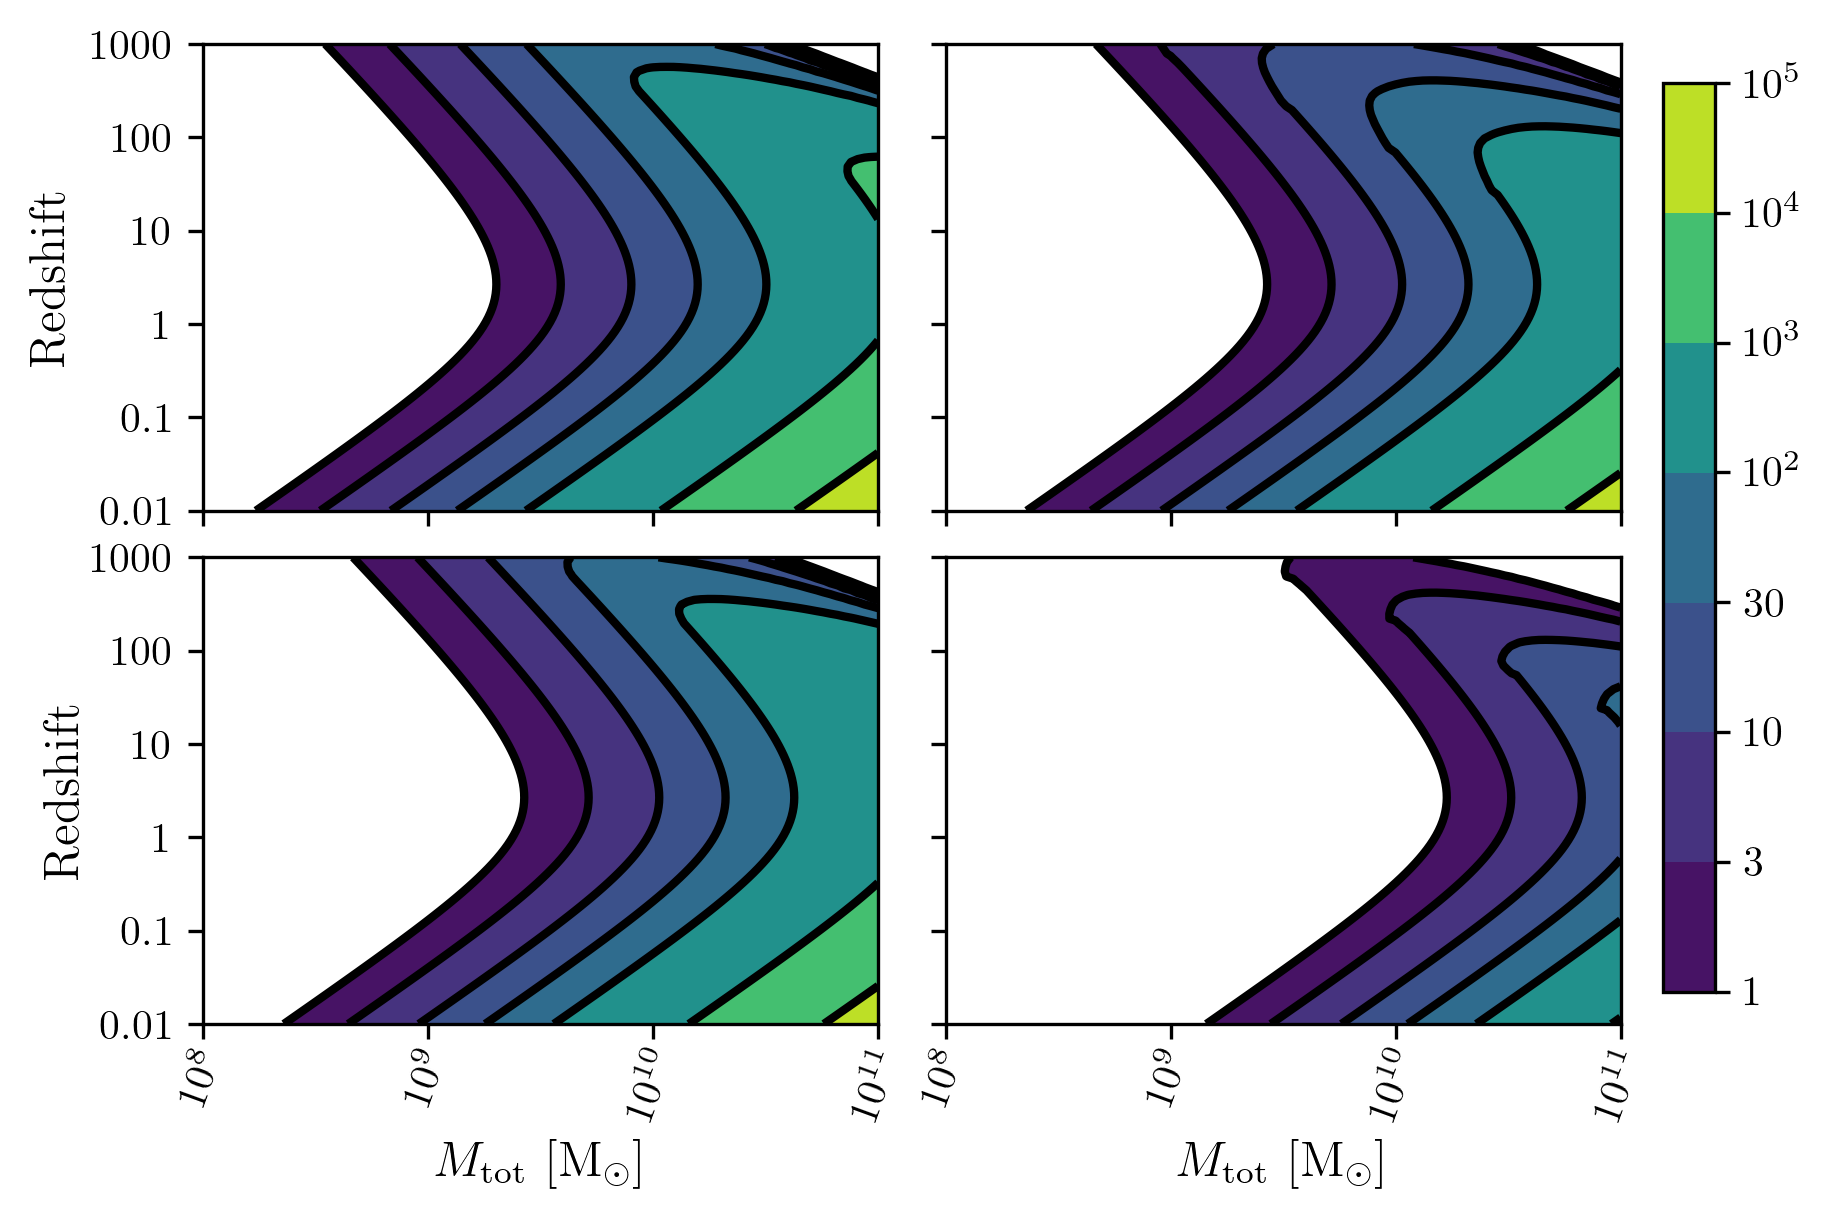

In [61]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_z,NANOGrav_WN_GWB_Samples_M_vs_z,
           NANOGrav_realistic_noise_Samples_M_vs_z,NANOGrav_11yr_Samples_M_vs_z]
SNRs = [NANOGrav_WN_SNR_M_vs_z,NANOGrav_WN_GWB_SNR_M_vs_z,
        NANOGrav_realistic_noise_SNR_M_vs_z,NANOGrav_11yr_SNR_M_vs_z]
loglevelMax=5.0
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'z'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1
#fig.savefig(save_directory+'SNR_NANOGrav_model_comp_M_vs_z.pdf',bbox_inches='tight')

M vs chi1

In [62]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_chi1,NANOGrav_WN_GWB_Samples_M_vs_chi1,
           NANOGrav_realistic_noise_Samples_M_vs_chi1,NANOGrav_11yr_Samples_M_vs_chi1]
SNRs = [NANOGrav_WN_SNR_M_vs_chi1,NANOGrav_WN_GWB_SNR_M_vs_chi1,
        NANOGrav_realistic_noise_SNR_M_vs_chi1,NANOGrav_11yr_SNR_M_vs_chi1]
loglevelMax=4.0
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'chi1'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs. N_p

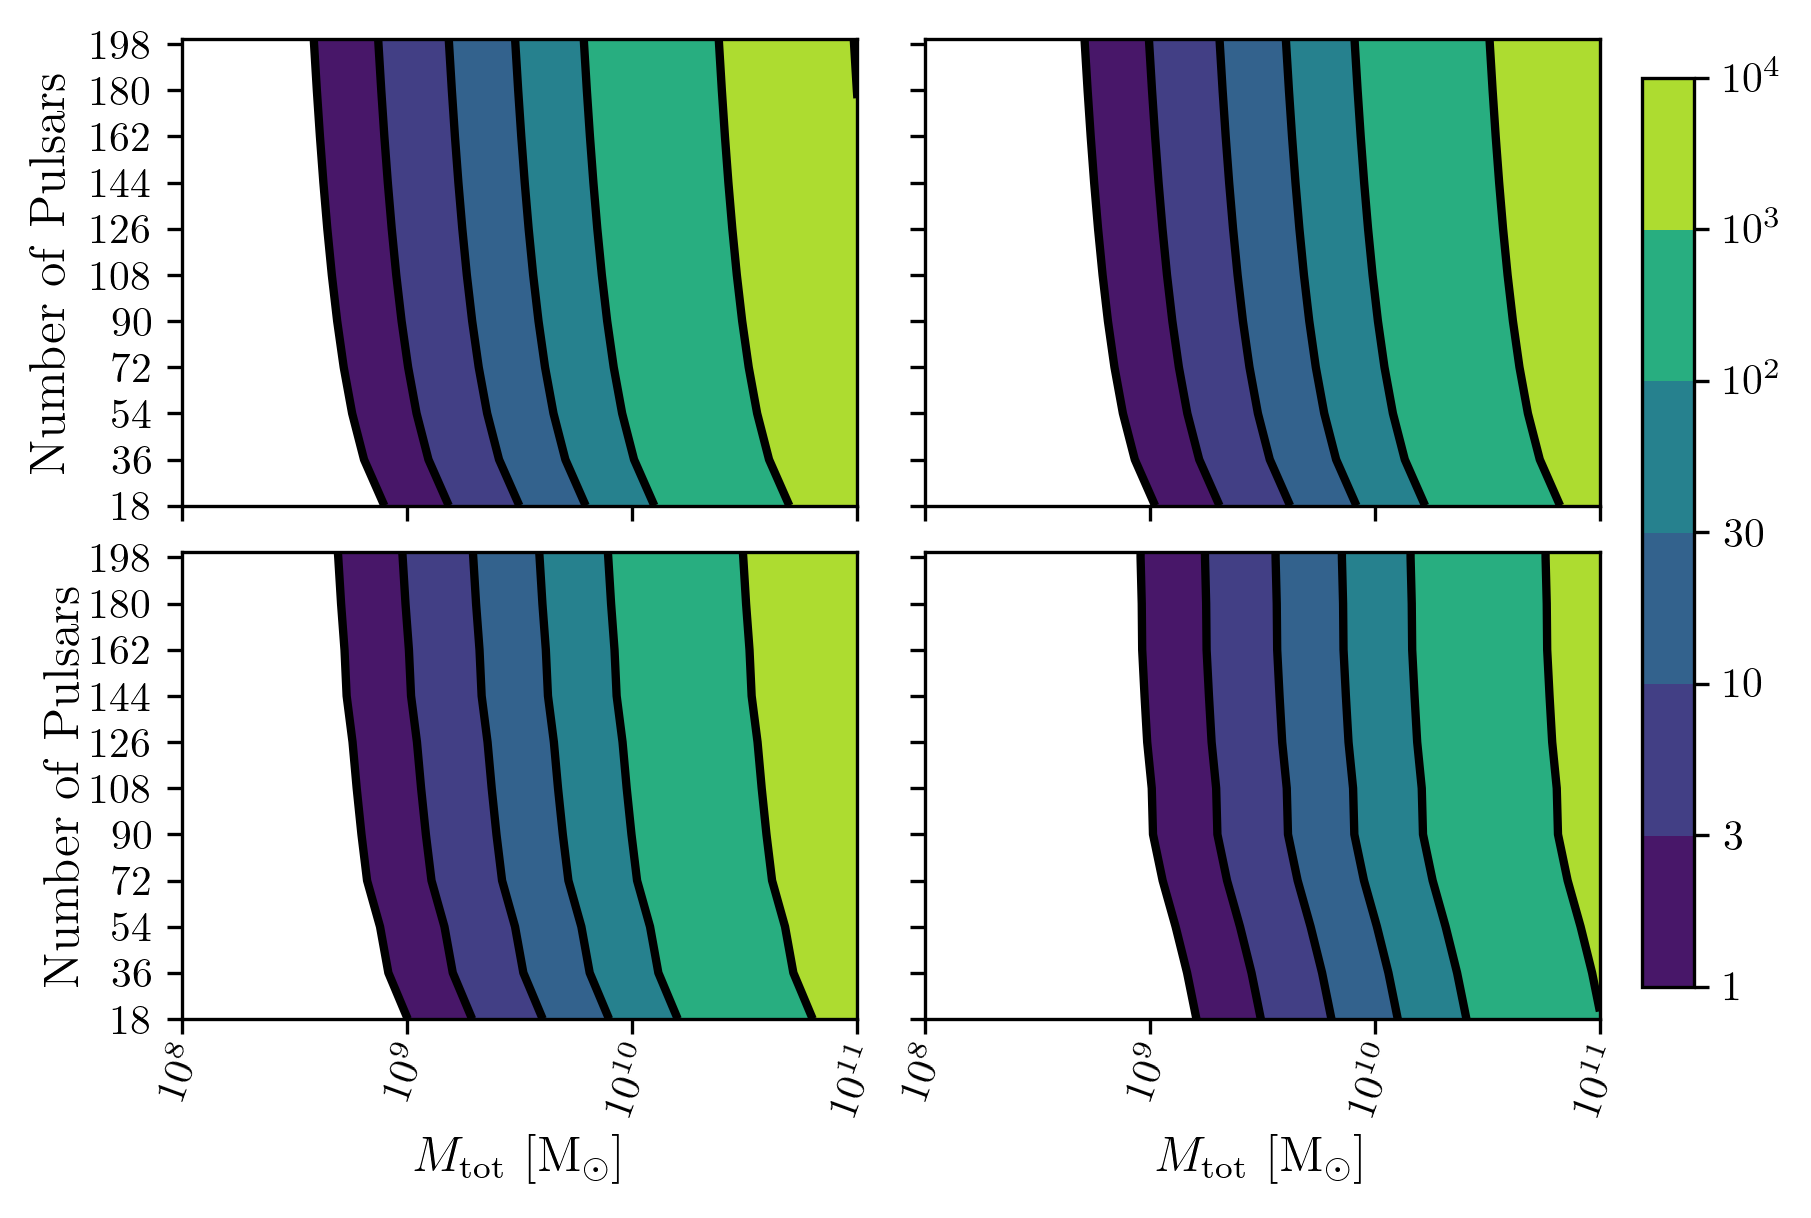

In [65]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples_x = [NANOGrav_WN_Samples_M_vs_N_p_x,NANOGrav_WN_GWB_Samples_M_vs_N_p_x,
             NANOGrav_realistic_noise_Samples_M_vs_N_p_x,NANOGrav_WN_RN_Samples_M_vs_N_p_x]
samples_y = [NANOGrav_WN_Samples_M_vs_N_p_y,NANOGrav_WN_GWB_Samples_M_vs_N_p_y,
             NANOGrav_realistic_noise_Samples_M_vs_N_p_y,NANOGrav_WN_RN_Samples_M_vs_N_p_y]
SNRs = [NANOGrav_WN_SNR_M_vs_N_p,NANOGrav_WN_GWB_SNR_M_vs_N_p,
        NANOGrav_realistic_noise_SNR_M_vs_N_p,NANOGrav_WN_RN_SNR_M_vs_N_p]
loglevelMax=4.0
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'n_p'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples_x[ii],var_y,
                     samples_y[ii],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples_x[ii],var_y,
                     samples_y[ii],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples_x[ii],var_y,
                     samples_y[ii],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples_x[ii],var_y,
                         samples_y[ii],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs cadence

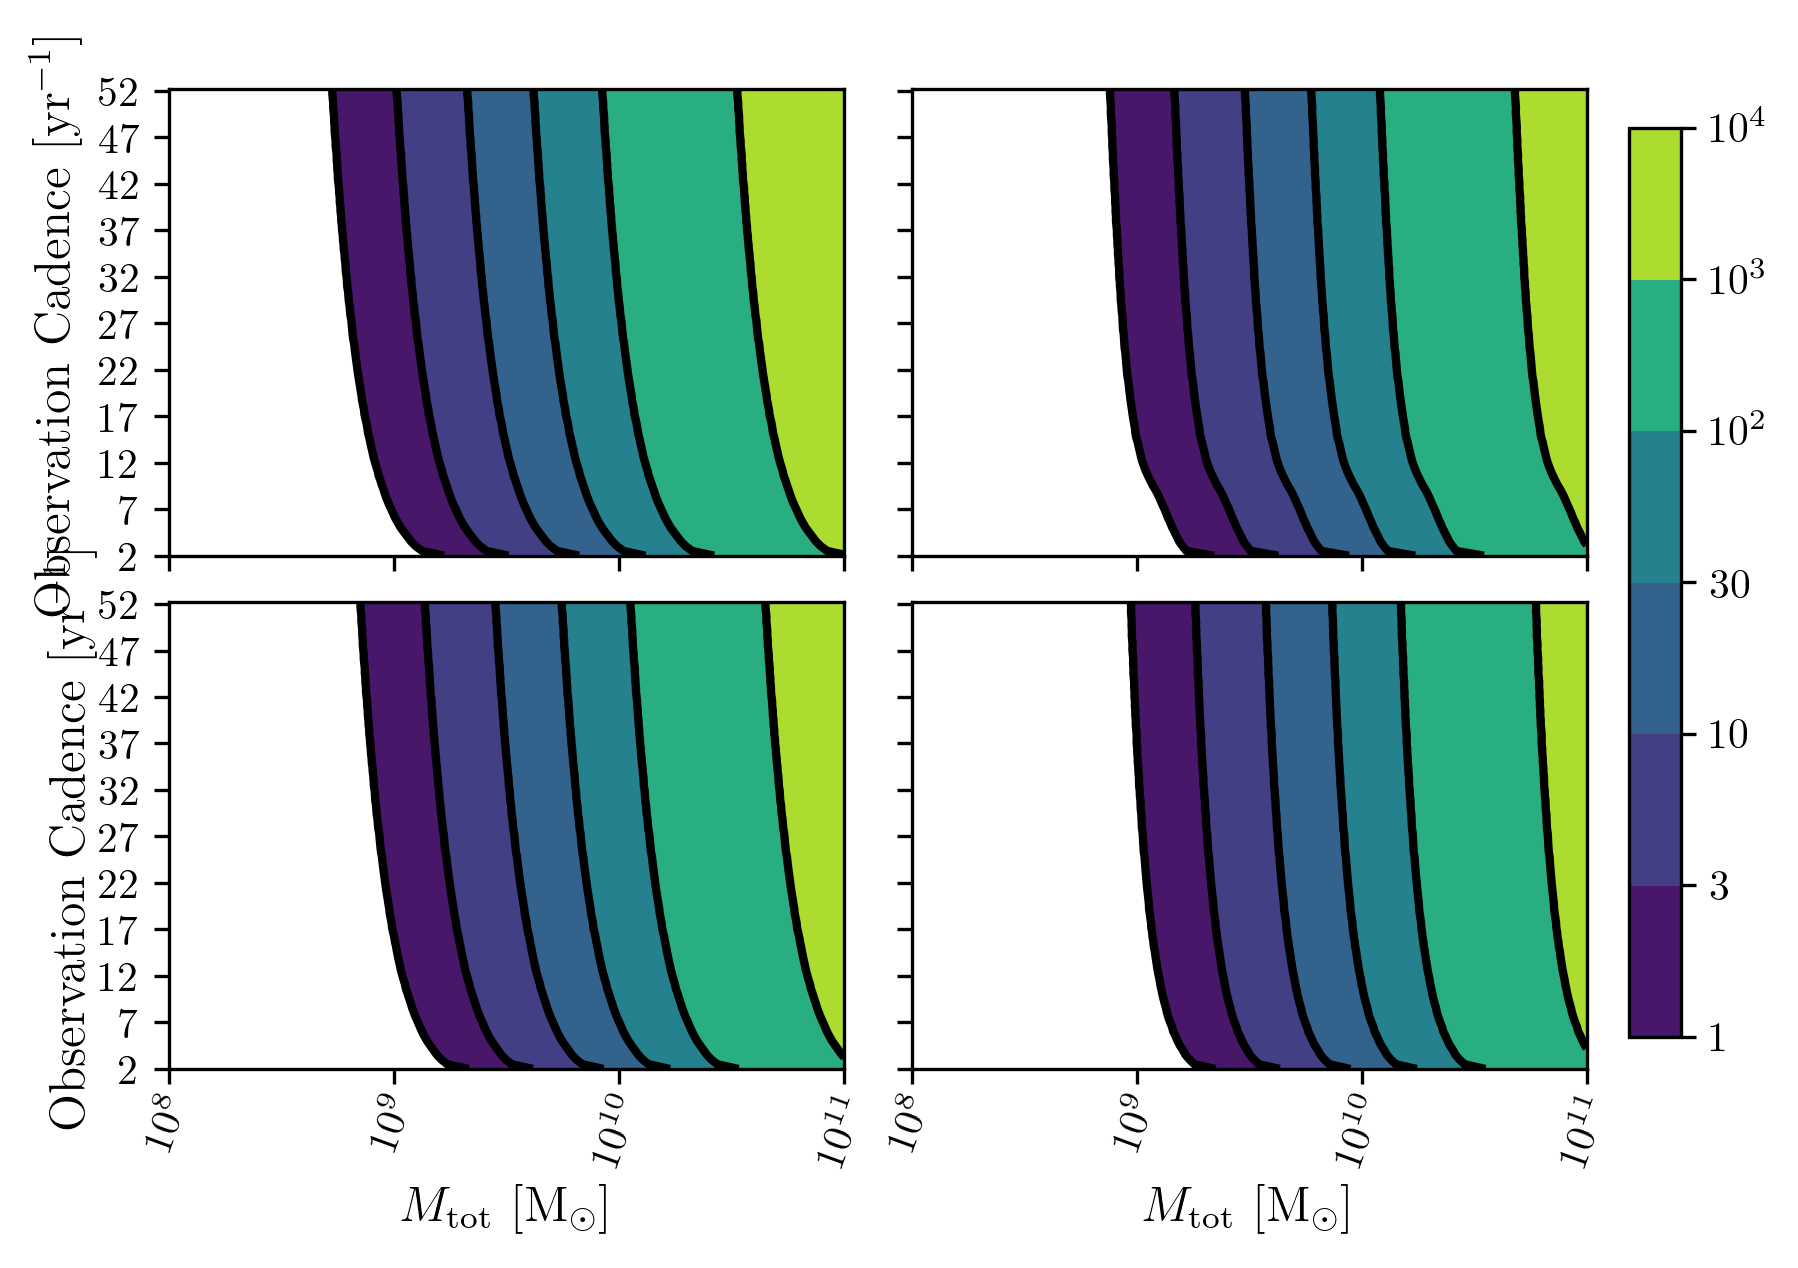

In [66]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_cadence,NANOGrav_WN_GWB_Samples_M_vs_cadence,
           NANOGrav_realistic_noise_Samples_M_vs_cadence,NANOGrav_WN_RN_Samples_M_vs_cadence]
SNRs = [NANOGrav_WN_SNR_M_vs_cadence,NANOGrav_WN_GWB_SNR_M_vs_cadence,
        NANOGrav_realistic_noise_SNR_M_vs_cadence,NANOGrav_WN_RN_SNR_M_vs_cadence]
loglevelMax=4.0
y_label_loc = -.15
hspace=0.1
wspace=0.1
var_y = 'cadence'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs T_obs

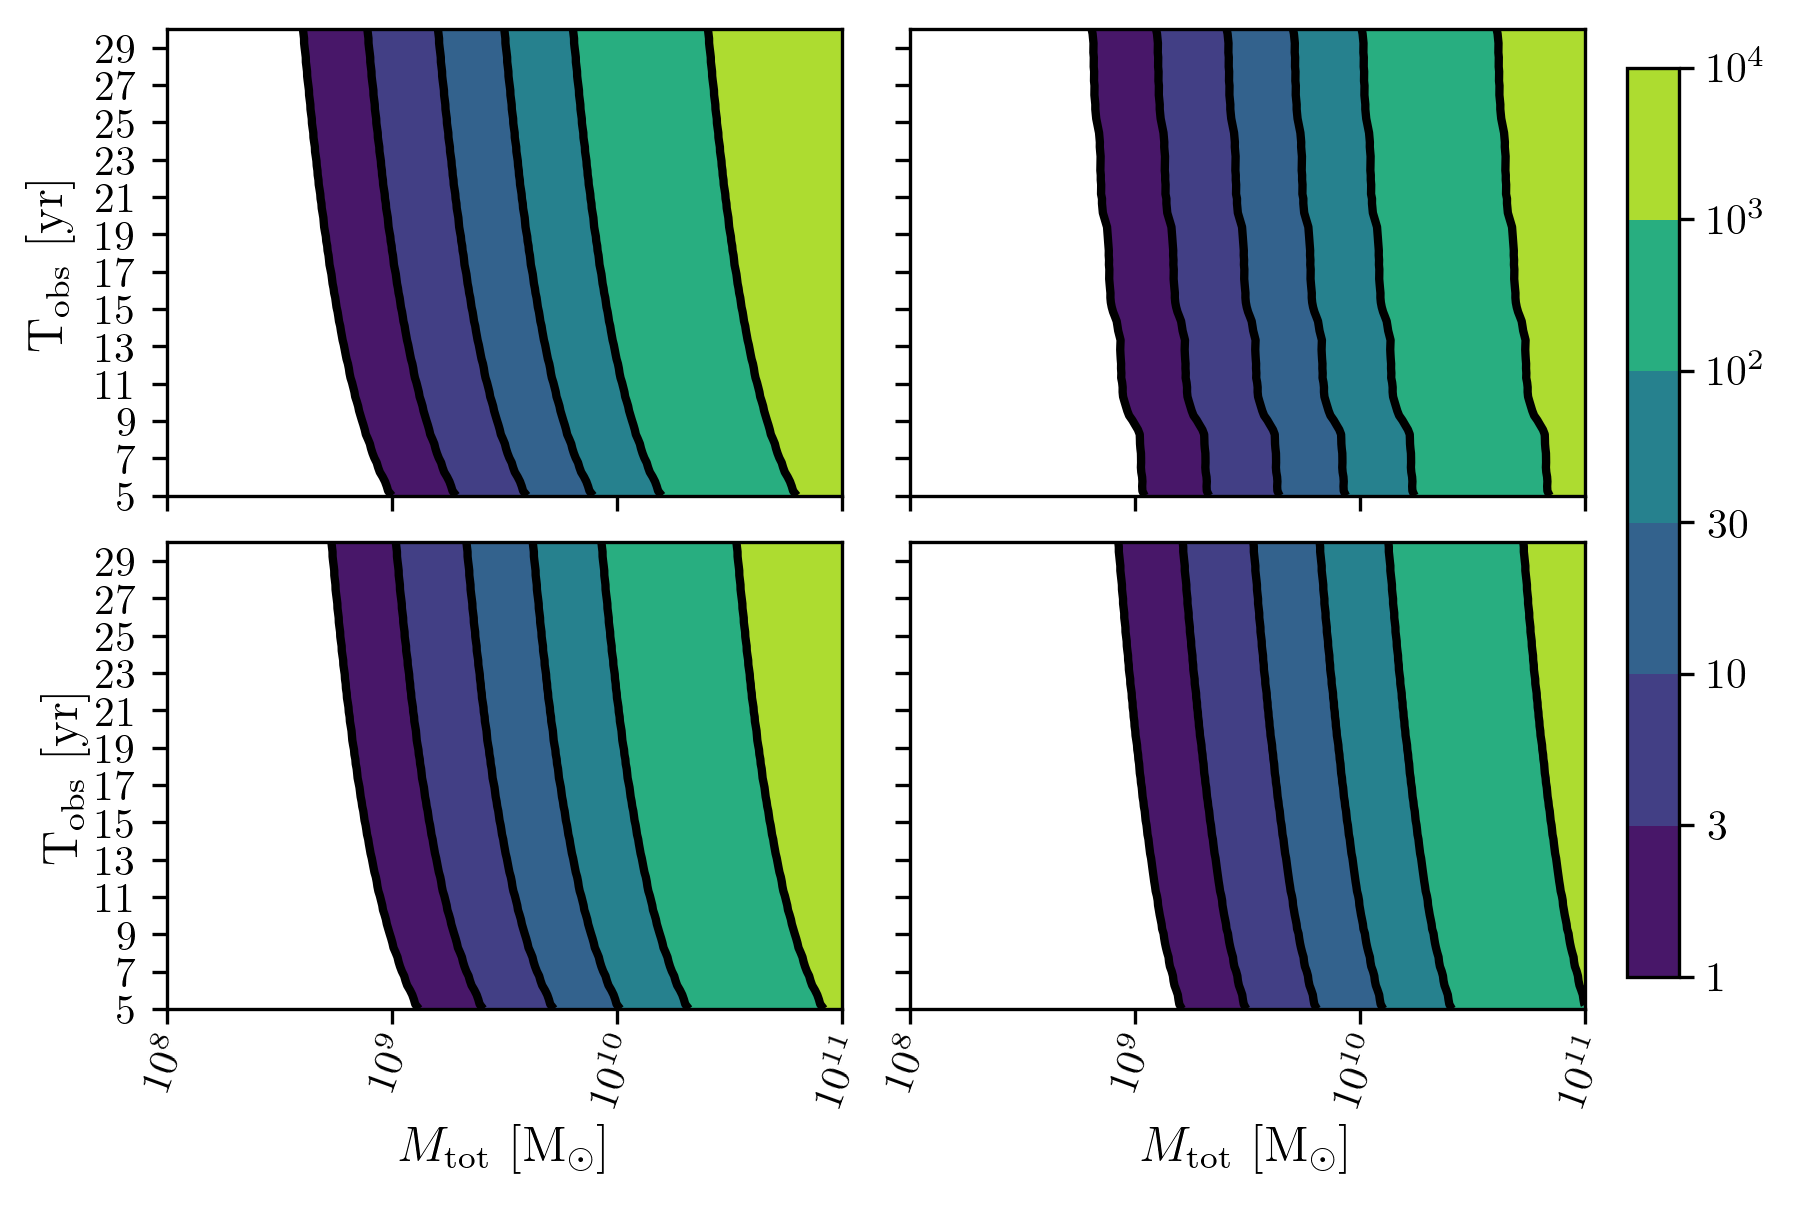

In [68]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_T_obs,NANOGrav_WN_GWB_Samples_M_vs_T_obs,
           NANOGrav_realistic_noise_Samples_M_vs_T_obs,NANOGrav_WN_RN_Samples_M_vs_T_obs]
SNRs = [NANOGrav_WN_SNR_M_vs_T_obs,NANOGrav_WN_GWB_SNR_M_vs_T_obs,
        NANOGrav_realistic_noise_SNR_M_vs_T_obs,NANOGrav_WN_RN_SNR_M_vs_T_obs]
loglevelMax=4.0
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'T_obs'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs sigma

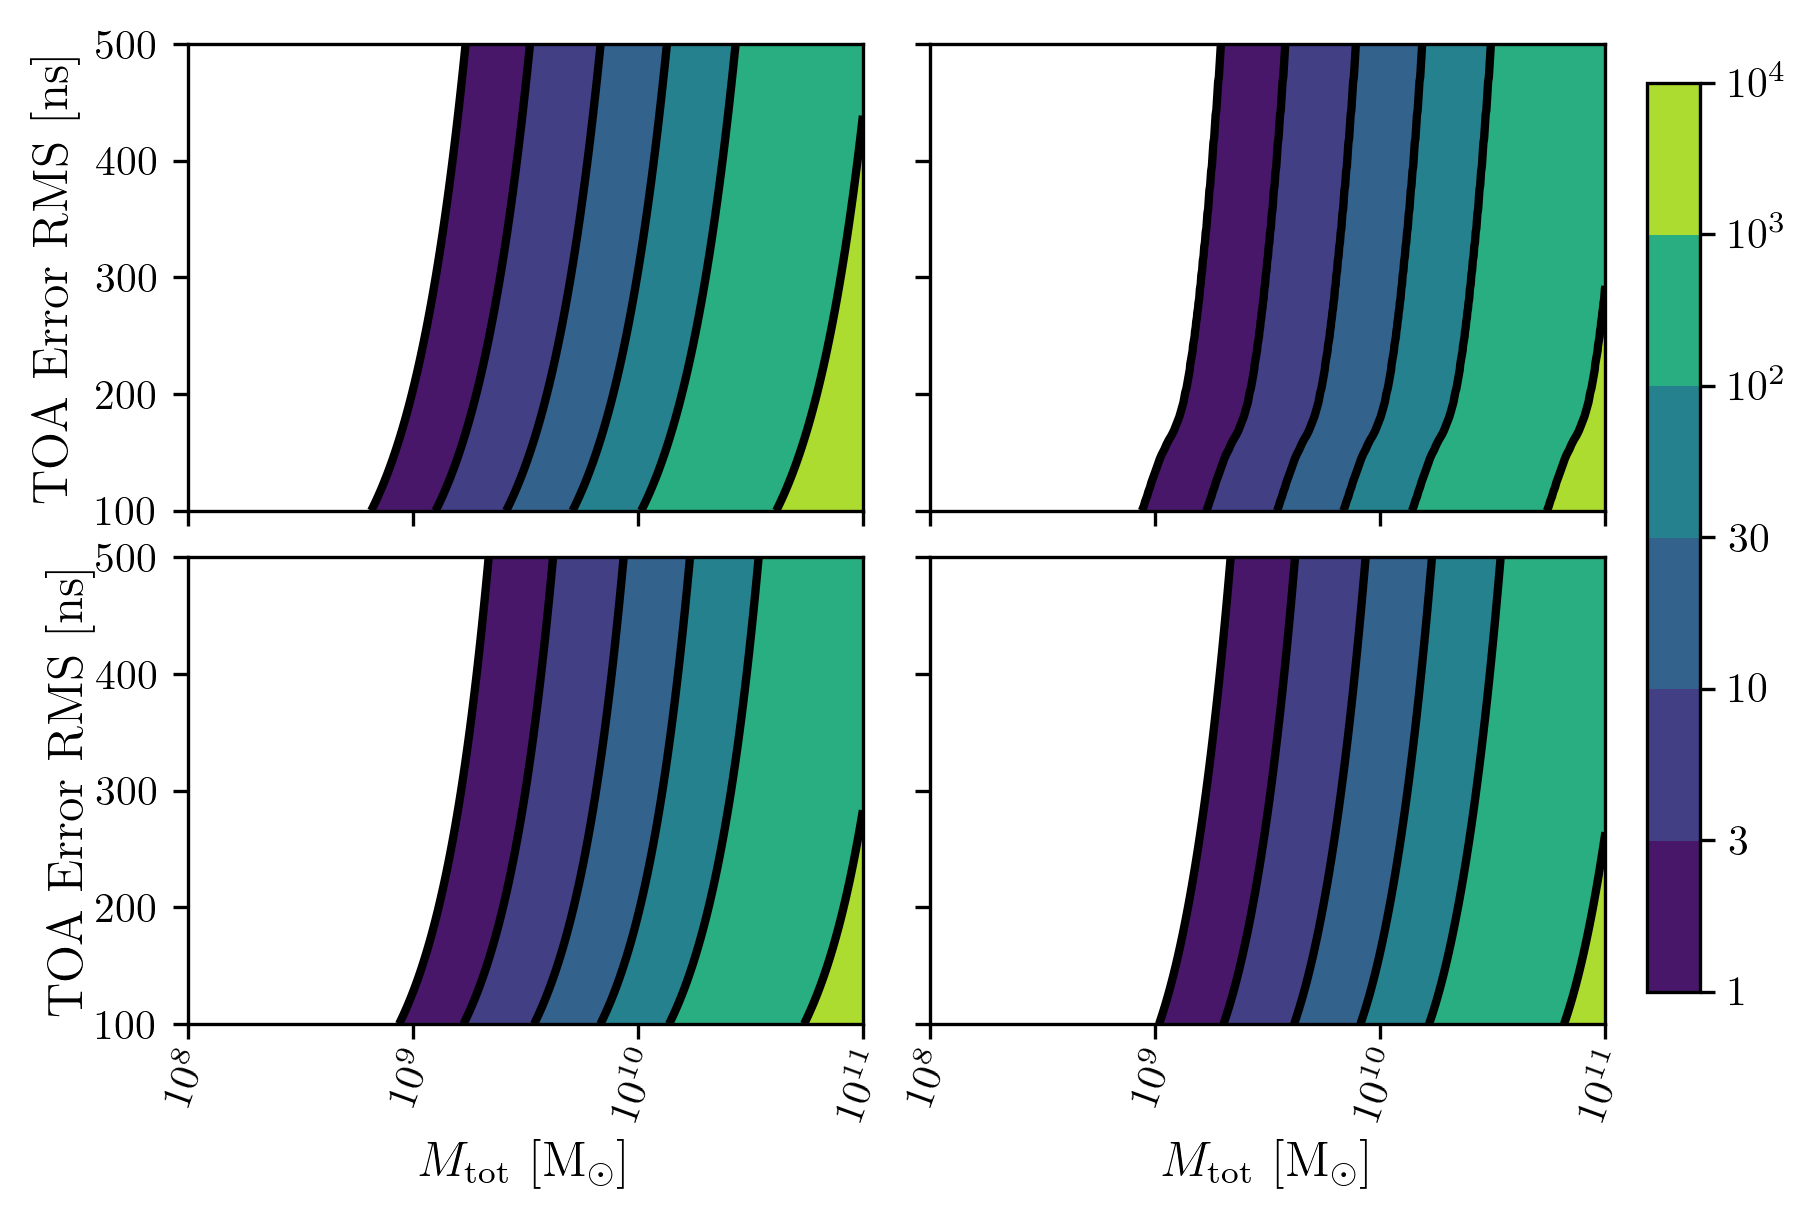

In [69]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [NANOGrav_WN_Samples_M_vs_sigma,NANOGrav_WN_GWB_Samples_M_vs_sigma,
           NANOGrav_realistic_noise_Samples_M_vs_sigma,NANOGrav_WN_RN_Samples_M_vs_sigma]
SNRs = [NANOGrav_WN_SNR_M_vs_sigma,NANOGrav_WN_GWB_SNR_M_vs_sigma,
        NANOGrav_realistic_noise_SNR_M_vs_sigma,NANOGrav_WN_RN_SNR_M_vs_sigma]
loglevelMax=4.0
y_label_loc = -.15
hspace=0.1
wspace=0.1
var_y = 'sigma'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

## SKA Plots

#### SKA WN Only

In [70]:
[SKA_WN_Samples_M_vs_N_p_x,SKA_WN_Samples_M_vs_N_p_y,SKA_WN_SNR_M_vs_N_p] = load_stuff('SKA_WN','M','N_p',version_PTA)
[SKA_WN_Samples_M_vs_T_obs,SKA_WN_SNR_M_vs_T_obs] = load_stuff('SKA_WN','M','T_obs',version_PTA)
[SKA_WN_Samples_M_vs_cadence,SKA_WN_SNR_M_vs_cadence] = load_stuff('SKA_WN','M','cadence',version_PTA)
[SKA_WN_Samples_M_vs_q,SKA_WN_SNR_M_vs_q] = load_stuff('SKA_WN','M','q',version_PTA)
[SKA_WN_Samples_M_vs_chi1,SKA_WN_SNR_M_vs_chi1] = load_stuff('SKA_WN','M','chi1',version_PTA)
[SKA_WN_Samples_M_vs_sigma,SKA_WN_SNR_M_vs_sigma] = load_stuff('SKA_WN','M','sigma',version_PTA)
[SKA_WN_Samples_M_vs_z,SKA_WN_SNR_M_vs_z] = load_stuff('SKA_WN','M','z',version_PTA)

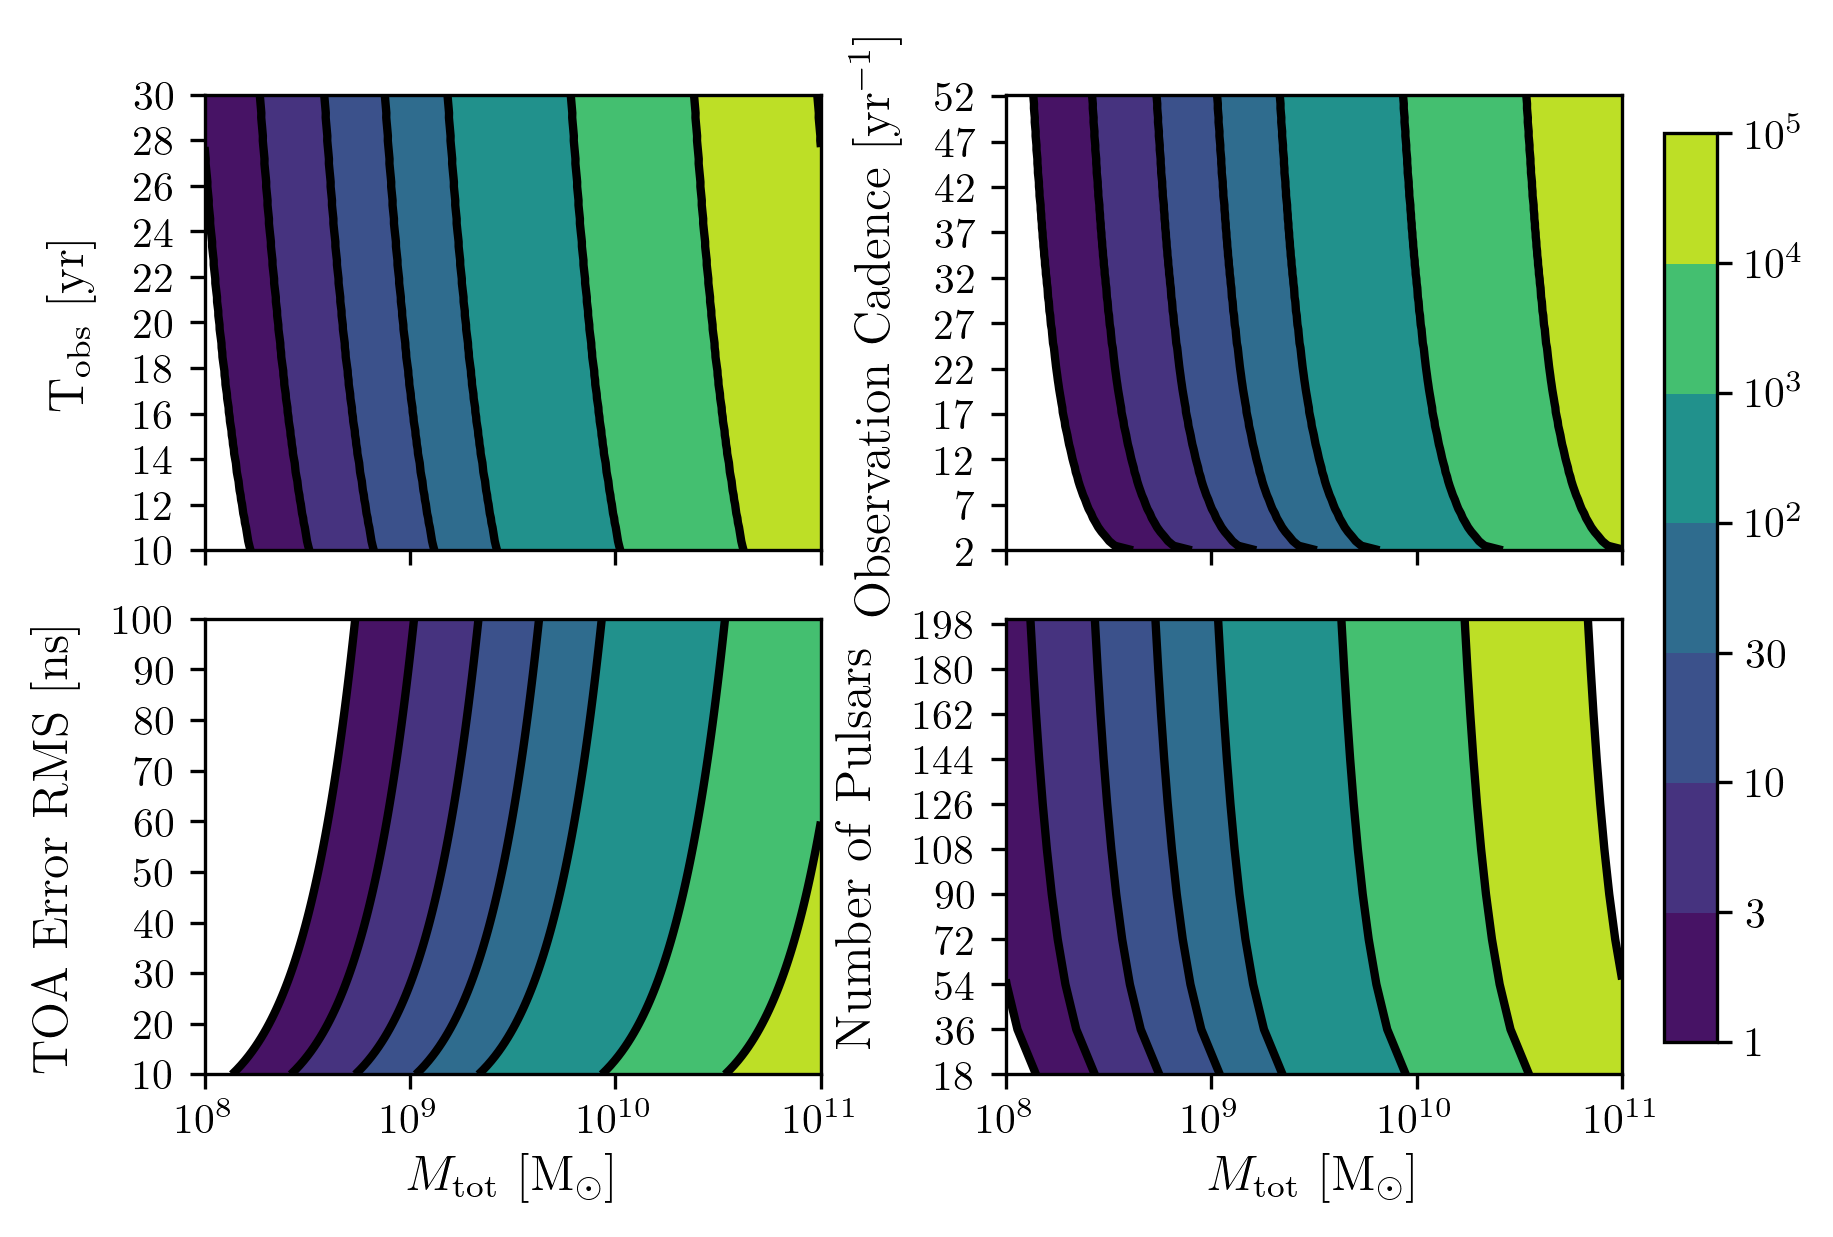

In [82]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [SKA_WN_Samples_M_vs_T_obs,SKA_WN_Samples_M_vs_cadence,
           SKA_WN_Samples_M_vs_sigma,SKA_WN_Samples_M_vs_N_p_x,SKA_WN_Samples_M_vs_N_p_y]
SNRs = [SKA_WN_SNR_M_vs_T_obs,SKA_WN_SNR_M_vs_cadence,
        SKA_WN_SNR_M_vs_sigma,SKA_WN_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_SKA_WN_M_vs_params.pdf',bbox_inches='tight')

#### SKA WN + RN

In [71]:
[SKA_WN_RN_Samples_M_vs_N_p_x,SKA_WN_RN_Samples_M_vs_N_p_y,SKA_WN_RN_SNR_M_vs_N_p] = load_stuff('SKA_WN_RN','M','N_p',version_PTA)
[SKA_WN_RN_Samples_M_vs_T_obs,SKA_WN_RN_SNR_M_vs_T_obs] = load_stuff('SKA_WN_RN','M','T_obs',version_PTA)
[SKA_WN_RN_Samples_M_vs_cadence,SKA_WN_RN_SNR_M_vs_cadence] = load_stuff('SKA_WN_RN','M','cadence',version_PTA)
[SKA_WN_RN_Samples_M_vs_q,SKA_WN_RN_SNR_M_vs_q] = load_stuff('SKA_WN_RN','M','q',version_PTA)
[SKA_WN_RN_Samples_M_vs_chi1,SKA_WN_RN_SNR_M_vs_chi1] = load_stuff('SKA_WN_RN','M','chi1',version_PTA)
[SKA_WN_RN_Samples_M_vs_sigma,SKA_WN_RN_SNR_M_vs_sigma] = load_stuff('SKA_WN_RN','M','sigma',version_PTA)
[SKA_WN_RN_Samples_M_vs_z,SKA_WN_RN_SNR_M_vs_z] = load_stuff('SKA_WN_RN','M','z',version_PTA)

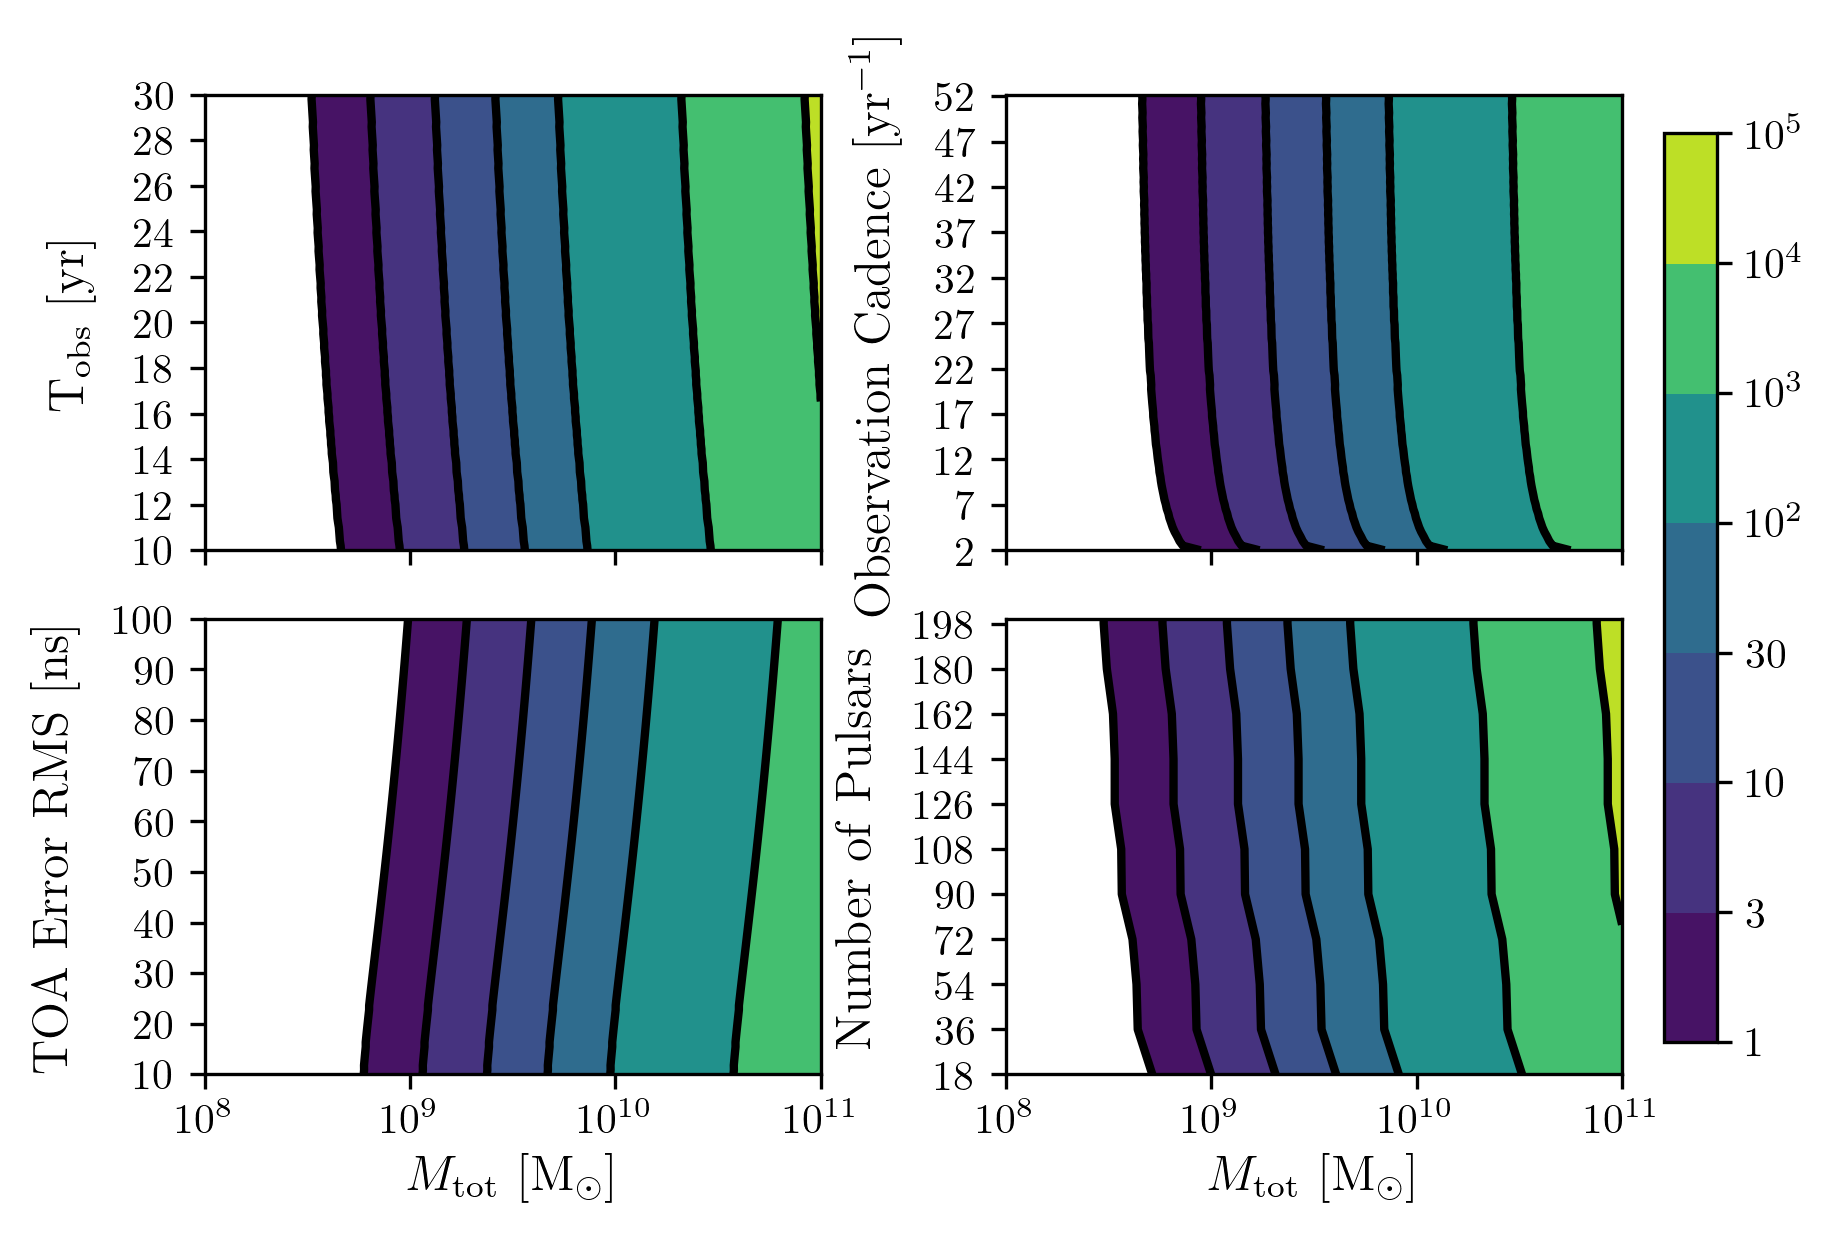

In [83]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [SKA_WN_RN_Samples_M_vs_T_obs,SKA_WN_RN_Samples_M_vs_cadence,
           SKA_WN_RN_Samples_M_vs_sigma,SKA_WN_RN_Samples_M_vs_N_p_x,SKA_WN_RN_Samples_M_vs_N_p_y]
SNRs = [SKA_WN_RN_SNR_M_vs_T_obs,SKA_WN_RN_SNR_M_vs_cadence,
        SKA_WN_RN_SNR_M_vs_sigma,SKA_WN_RN_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_SKA_WN_RN_M_vs_params.pdf',bbox_inches='tight')

#### SKA WN + GWB

In [72]:
[SKA_WN_GWB_Samples_M_vs_N_p_x,SKA_WN_GWB_Samples_M_vs_N_p_y,
 SKA_WN_GWB_SNR_M_vs_N_p] = load_stuff('SKA_WN_GWB','M','N_p',version_PTA)
[SKA_WN_GWB_Samples_M_vs_T_obs,SKA_WN_GWB_SNR_M_vs_T_obs] = load_stuff('SKA_WN_GWB','M','T_obs',version_PTA)
[SKA_WN_GWB_Samples_M_vs_cadence,SKA_WN_GWB_SNR_M_vs_cadence] = load_stuff('SKA_WN_GWB','M','cadence',version_PTA)
[SKA_WN_GWB_Samples_M_vs_q,SKA_WN_GWB_SNR_M_vs_q] = load_stuff('SKA_WN_GWB','M','q',version_PTA)
[SKA_WN_GWB_Samples_M_vs_chi1,SKA_WN_GWB_SNR_M_vs_chi1] = load_stuff('SKA_WN_GWB','M','chi1',version_PTA)
[SKA_WN_GWB_Samples_M_vs_sigma,SKA_WN_GWB_SNR_M_vs_sigma] = load_stuff('SKA_WN_GWB','M','sigma',version_PTA)
[SKA_WN_GWB_Samples_M_vs_z,SKA_WN_GWB_SNR_M_vs_z] = load_stuff('SKA_WN_GWB','M','z',version_PTA)

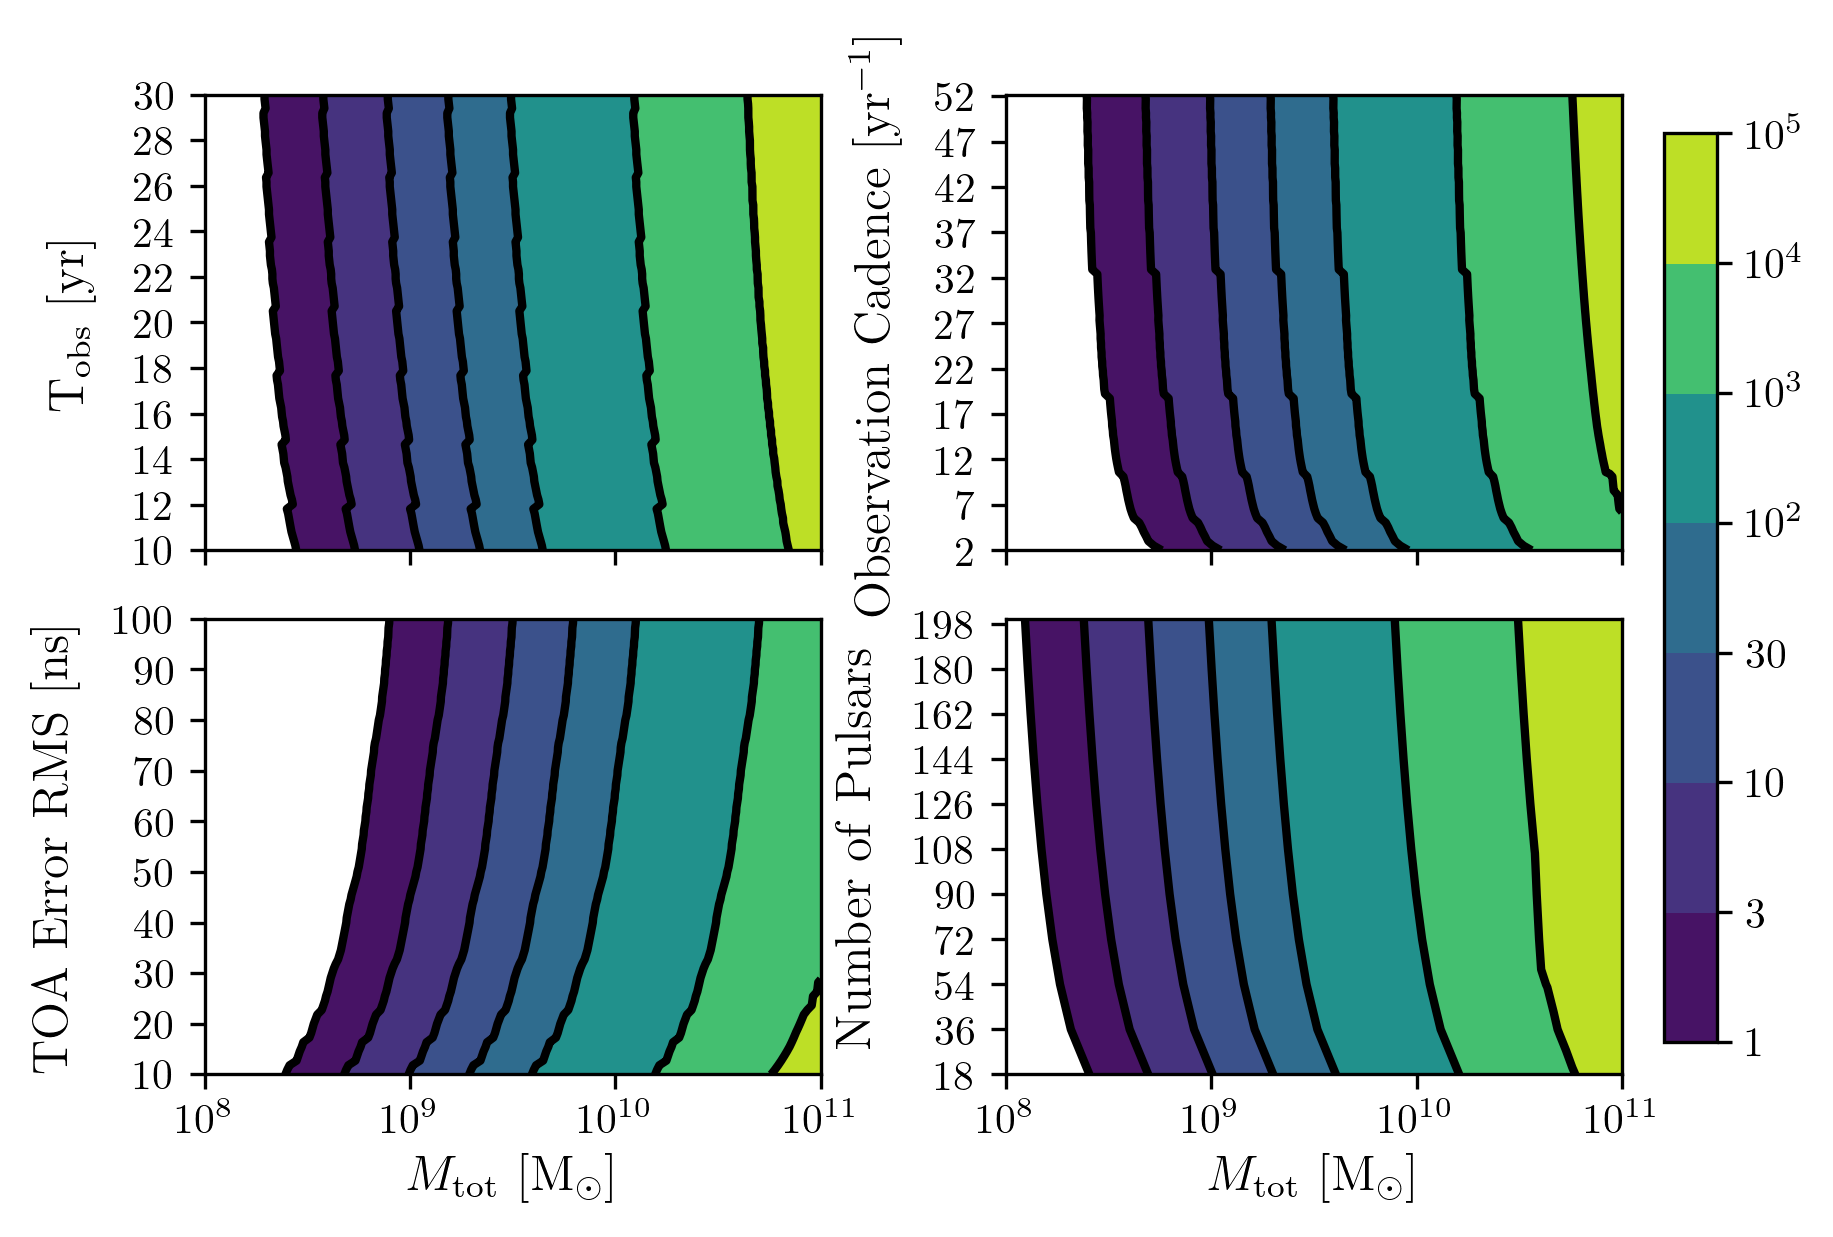

In [84]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [SKA_WN_GWB_Samples_M_vs_T_obs,SKA_WN_GWB_Samples_M_vs_cadence,
           SKA_WN_GWB_Samples_M_vs_sigma,SKA_WN_GWB_Samples_M_vs_N_p_x,SKA_WN_GWB_Samples_M_vs_N_p_y]
SNRs = [SKA_WN_GWB_SNR_M_vs_T_obs,SKA_WN_GWB_SNR_M_vs_cadence,
        SKA_WN_GWB_SNR_M_vs_sigma,SKA_WN_GWB_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_SKA_WN_GWB_M_vs_params.pdf',bbox_inches='tight')

#### SKA Realistic Noise

In [73]:
[SKA_realistic_noise_Samples_M_vs_N_p_x,SKA_realistic_noise_Samples_M_vs_N_p_y,
 SKA_realistic_noise_SNR_M_vs_N_p] = load_stuff('SKA_realistic_noise','M','N_p',version_PTA)
[SKA_realistic_noise_Samples_M_vs_T_obs,SKA_realistic_noise_SNR_M_vs_T_obs] = load_stuff('SKA_realistic_noise','M','T_obs',version_PTA)
[SKA_realistic_noise_Samples_M_vs_cadence,SKA_realistic_noise_SNR_M_vs_cadence] = load_stuff('SKA_realistic_noise','M','cadence',version_PTA)
[SKA_realistic_noise_Samples_M_vs_q,SKA_realistic_noise_SNR_M_vs_q] = load_stuff('SKA_realistic_noise','M','q',version_PTA)
[SKA_realistic_noise_Samples_M_vs_chi1,SKA_realistic_noise_SNR_M_vs_chi1] = load_stuff('SKA_realistic_noise','M','chi1',version_PTA)
[SKA_realistic_noise_Samples_M_vs_sigma,SKA_realistic_noise_SNR_M_vs_sigma] = load_stuff('SKA_realistic_noise','M','sigma',version_PTA)
[SKA_realistic_noise_Samples_M_vs_z,SKA_realistic_noise_SNR_M_vs_z] = load_stuff('SKA_realistic_noise','M','z',version_PTA)

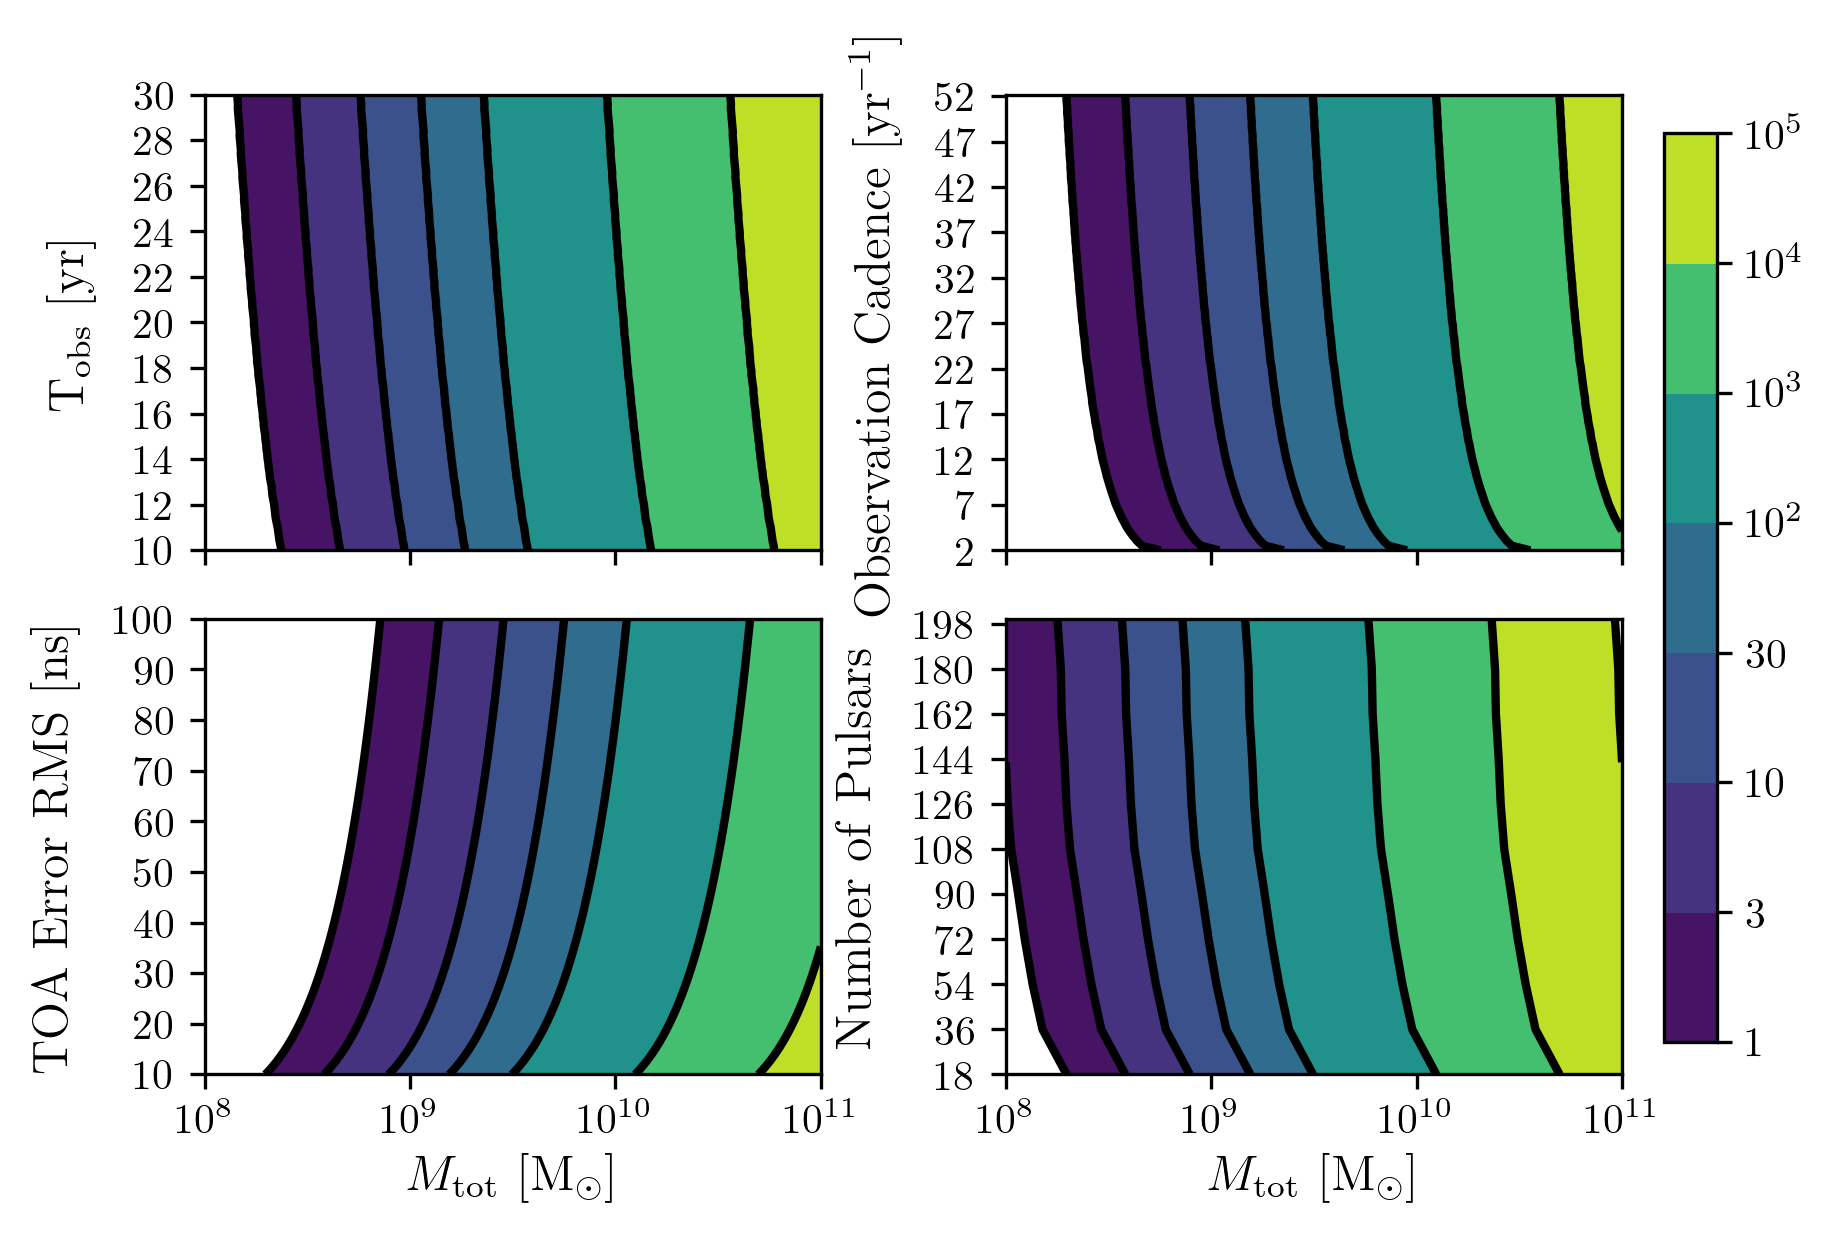

In [85]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [SKA_realistic_noise_Samples_M_vs_T_obs,SKA_realistic_noise_Samples_M_vs_cadence,
           SKA_realistic_noise_Samples_M_vs_sigma,SKA_realistic_noise_Samples_M_vs_N_p_x,SKA_realistic_noise_Samples_M_vs_N_p_y]
SNRs = [SKA_realistic_noise_SNR_M_vs_T_obs,SKA_realistic_noise_SNR_M_vs_cadence,
        SKA_realistic_noise_SNR_M_vs_sigma,SKA_realistic_noise_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_SKA_realistic_noise_M_vs_params.pdf',bbox_inches='tight')

#### SKA Realistic Noise + GWB

In [74]:
[SKA_realistic_noise_GWB_Samples_M_vs_N_p_x,SKA_realistic_noise_GWB_Samples_M_vs_N_p_y,
 SKA_realistic_noise_GWB_SNR_M_vs_N_p] = load_stuff('SKA_realistic_noise_GWB','M','N_p',version_PTA)
[SKA_realistic_noise_GWB_Samples_M_vs_T_obs,SKA_realistic_noise_GWB_SNR_M_vs_T_obs] = load_stuff('SKA_realistic_noise_GWB','M','T_obs',version_PTA)
[SKA_realistic_noise_GWB_Samples_M_vs_cadence,SKA_realistic_noise_GWB_SNR_M_vs_cadence] = load_stuff('SKA_realistic_noise_GWB','M','cadence',version_PTA)
[SKA_realistic_noise_GWB_Samples_M_vs_q,SKA_realistic_noise_GWB_SNR_M_vs_q] = load_stuff('SKA_realistic_noise_GWB','M','q',version_PTA)
[SKA_realistic_noise_GWB_Samples_M_vs_chi1,SKA_realistic_noise_GWB_SNR_M_vs_chi1] = load_stuff('SKA_realistic_noise_GWB','M','chi1',version_PTA)
[SKA_realistic_noise_GWB_Samples_M_vs_sigma,SKA_realistic_noise_GWB_SNR_M_vs_sigma] = load_stuff('SKA_realistic_noise_GWB','M','sigma',version_PTA)
[SKA_realistic_noise_GWB_Samples_M_vs_z,SKA_realistic_noise_GWB_SNR_M_vs_z] = load_stuff('SKA_realistic_noise_GWB','M','z',version_PTA)

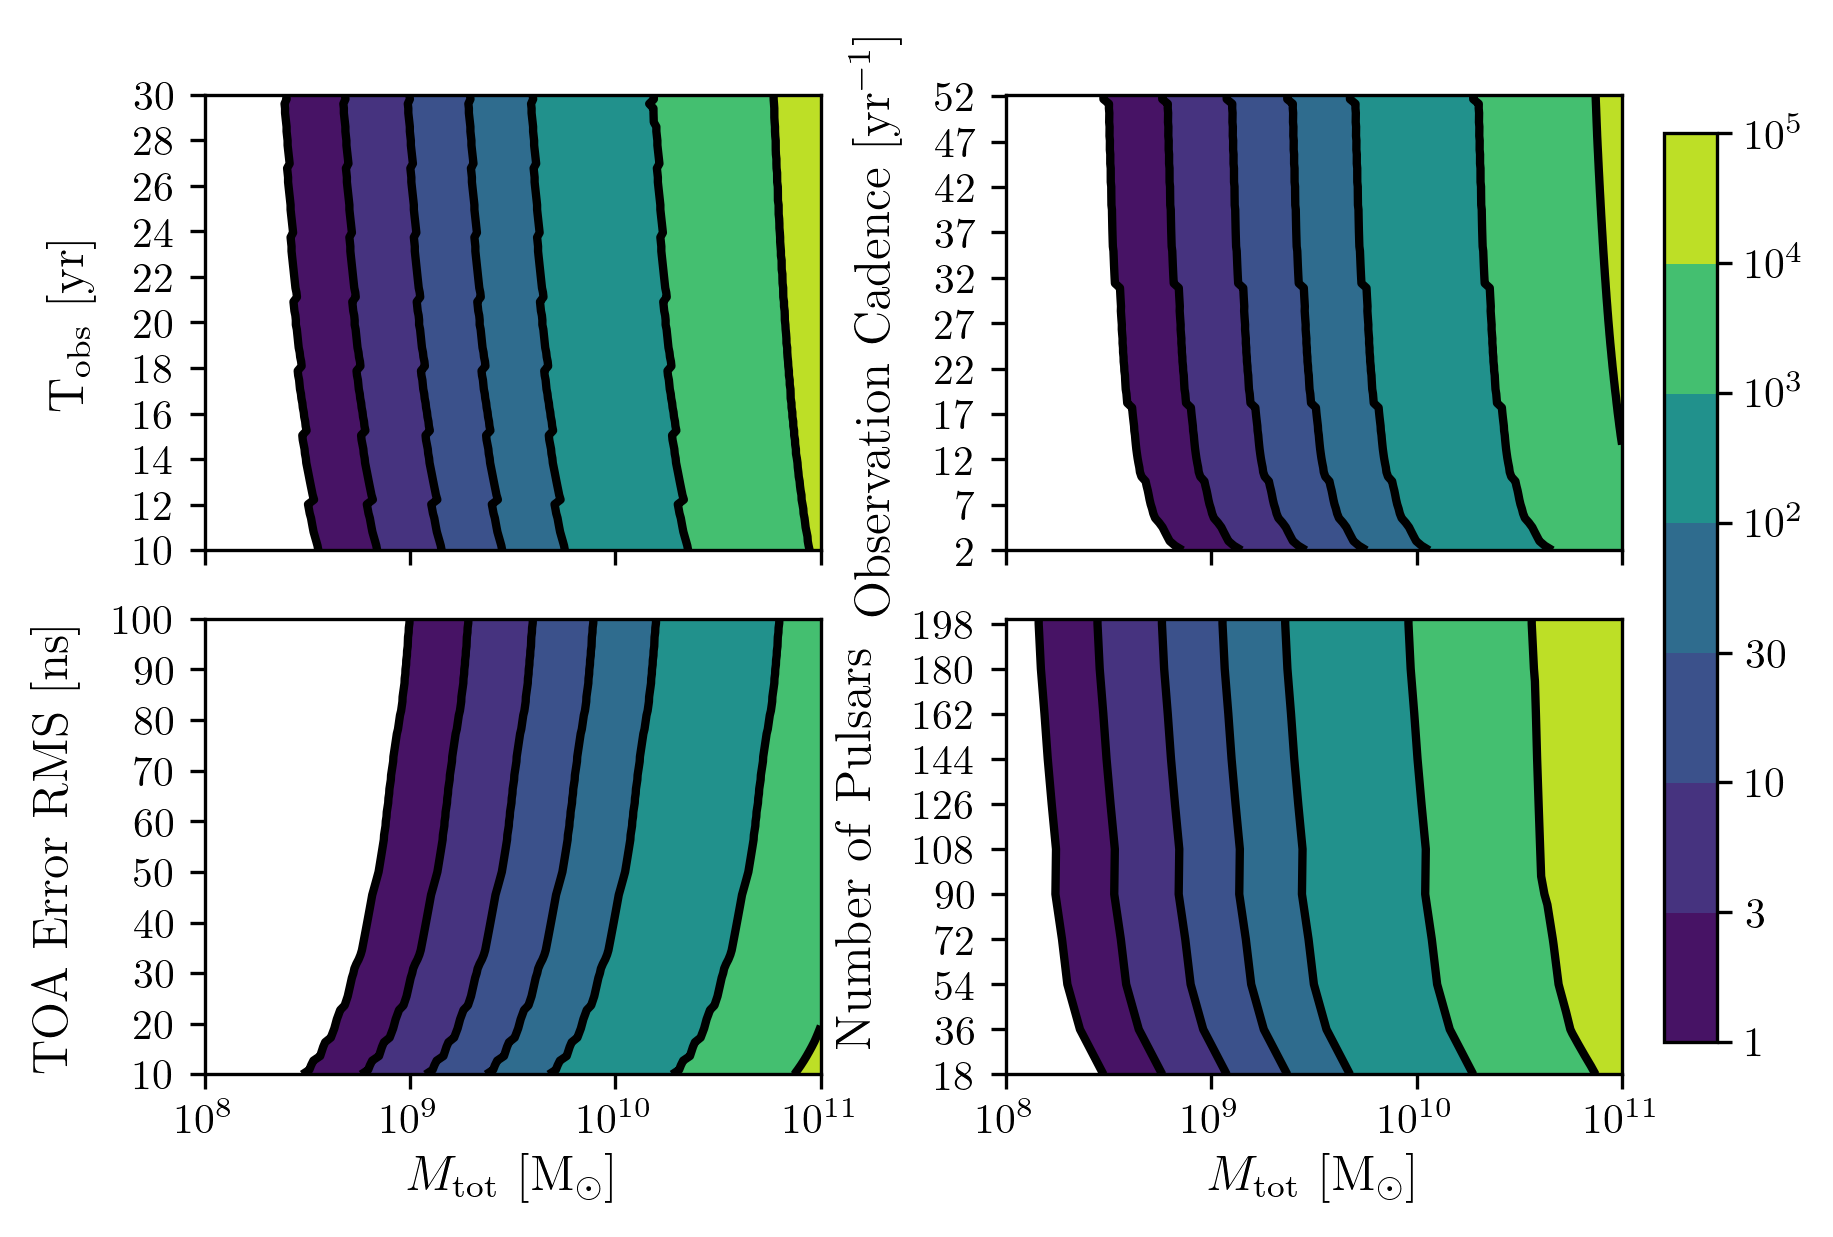

In [86]:
#########################
#Make the Contour Plots

figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)

samples = [SKA_realistic_noise_GWB_Samples_M_vs_T_obs,SKA_realistic_noise_GWB_Samples_M_vs_cadence,
           SKA_realistic_noise_GWB_Samples_M_vs_sigma,SKA_realistic_noise_GWB_Samples_M_vs_N_p_x,SKA_realistic_noise_GWB_Samples_M_vs_N_p_y]
SNRs = [SKA_realistic_noise_GWB_SNR_M_vs_T_obs,SKA_realistic_noise_GWB_SNR_M_vs_cadence,
        SKA_realistic_noise_GWB_SNR_M_vs_sigma,SKA_realistic_noise_GWB_SNR_M_vs_N_p]
var_ys = ['T_obs','cadence','sigma','n_p']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .15
wspace = .3

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii],var_ys[ii],
                     samples[ii+1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        else:
            Plot_SNR('M',samples[ii][:,0],var_ys[ii],
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     ylabels_kwargs={'labelpad':8})
        ii += 1
        
#fig.savefig(save_directory+'SNR_SKA_realistic_noise_GWB_M_vs_params.pdf',bbox_inches='tight')

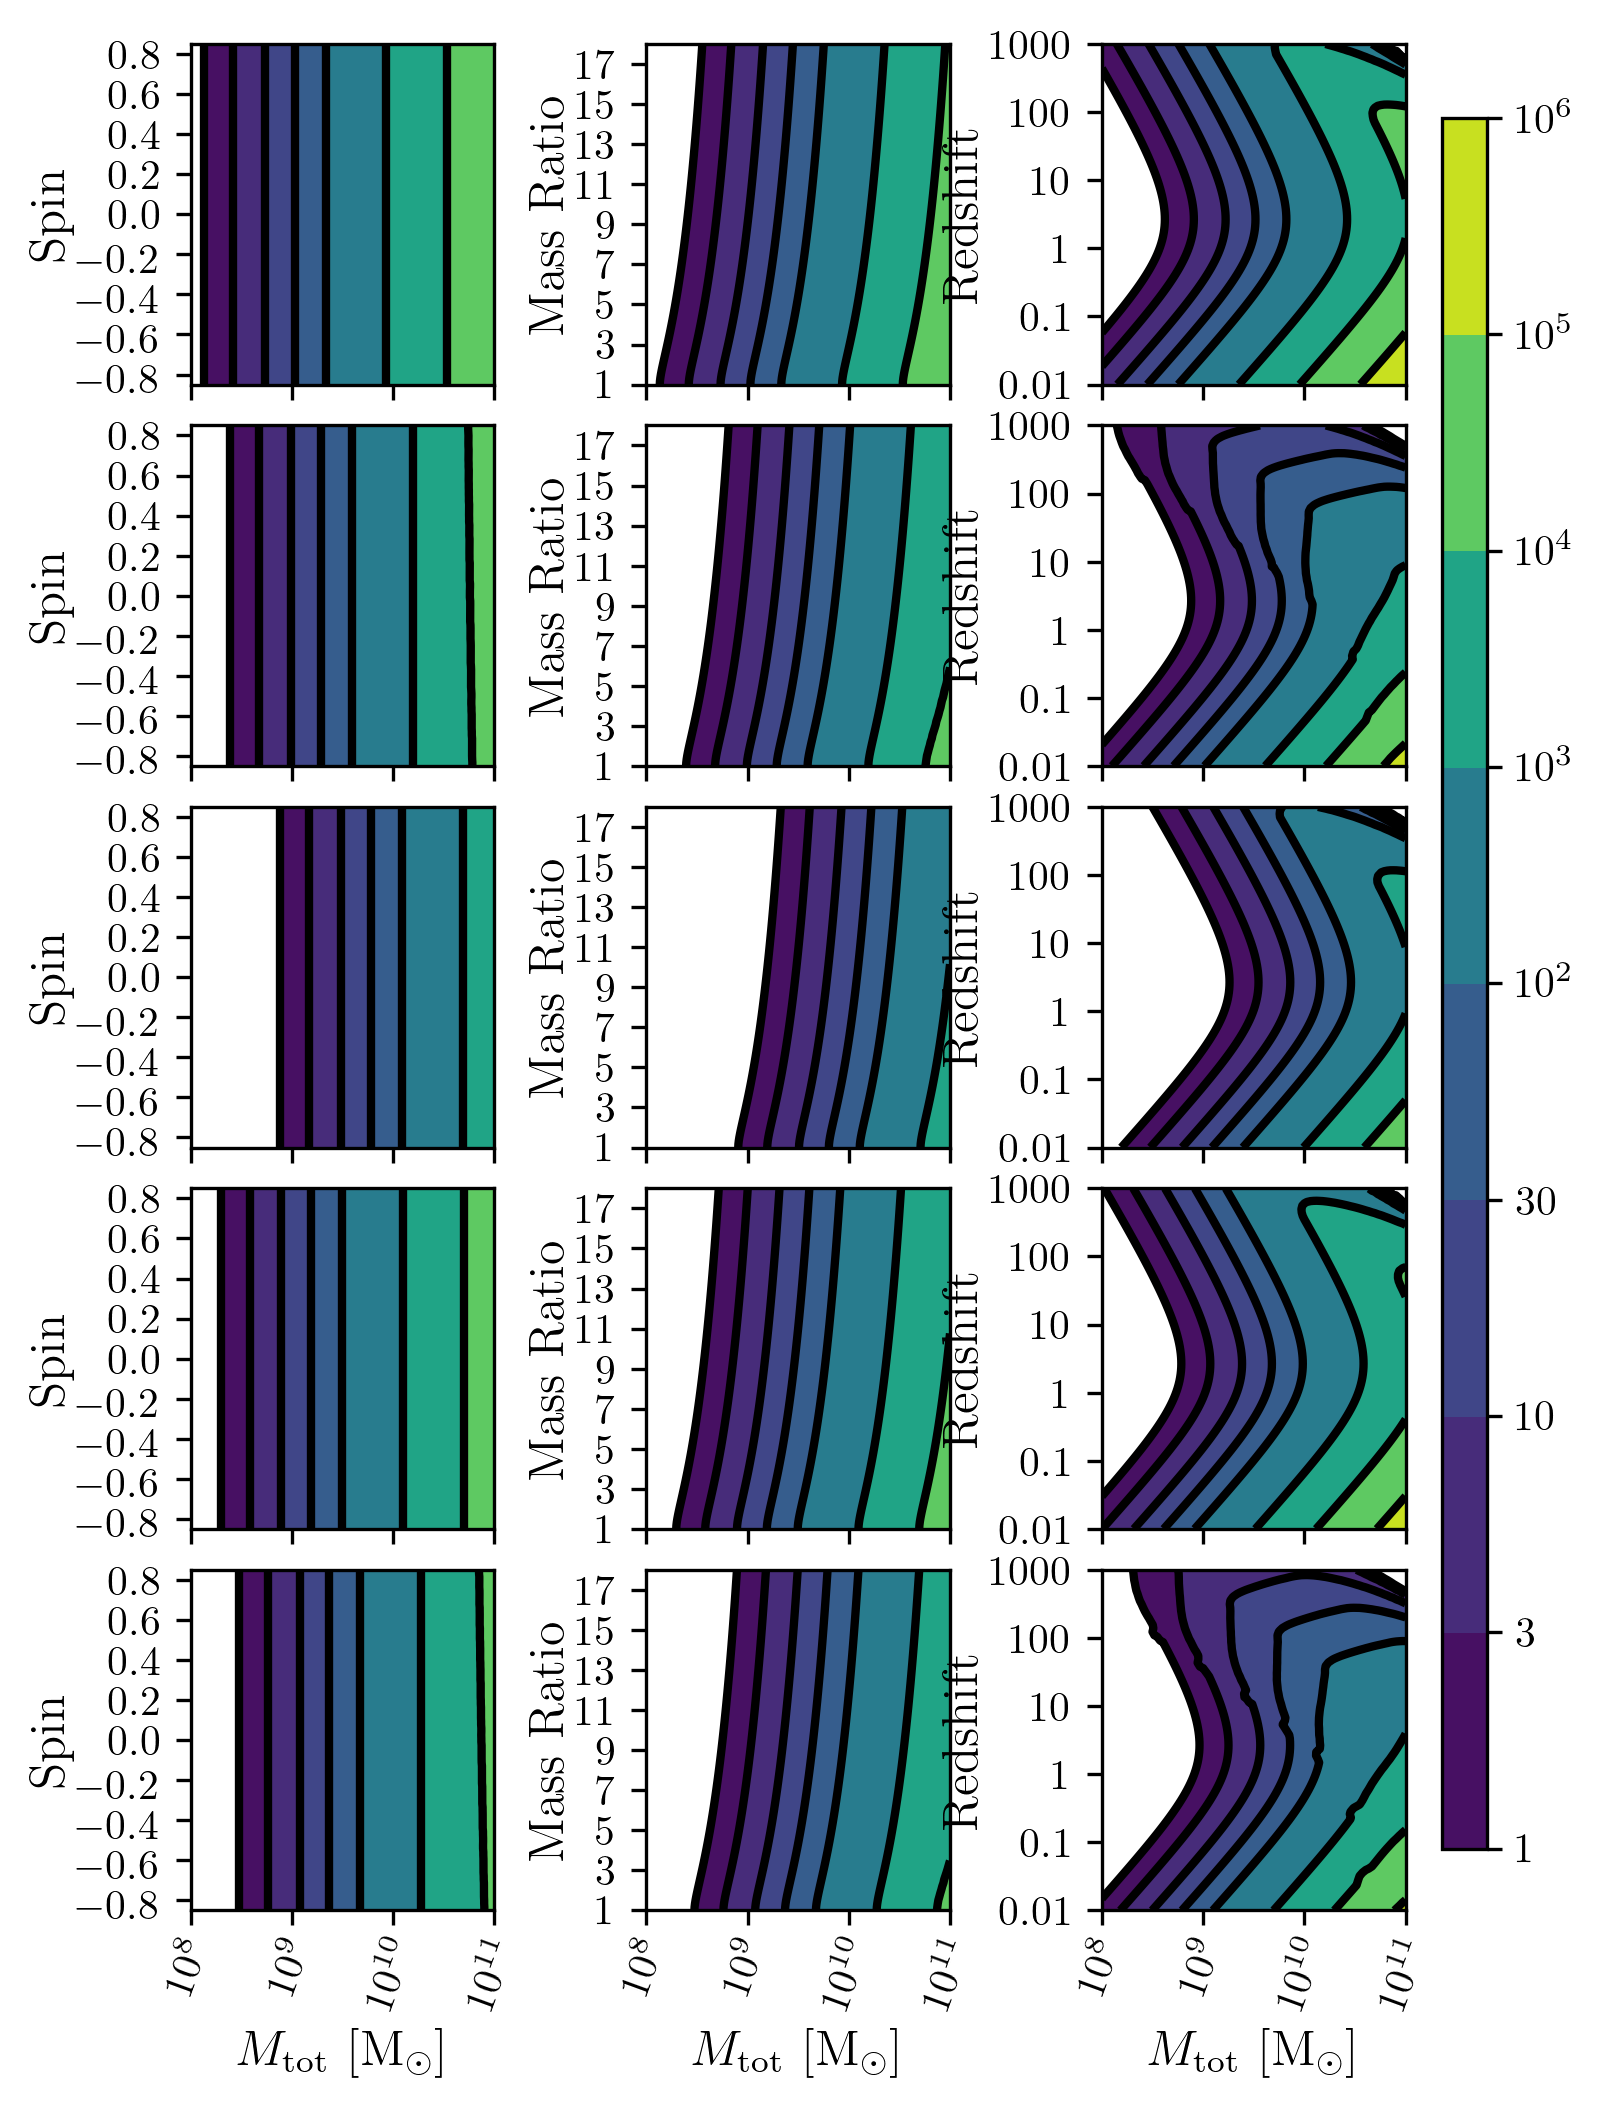

In [87]:
#########################
#Make the Contour Plots
figsize = get_fig_size(width=6.0,scale=0.45)
fig, axes = plt.subplots(5,3,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_chi1,SKA_WN_Samples_M_vs_q,SKA_WN_Samples_M_vs_z,
           SKA_WN_GWB_Samples_M_vs_chi1,SKA_WN_GWB_Samples_M_vs_q,SKA_WN_GWB_Samples_M_vs_z,
           SKA_WN_RN_Samples_M_vs_chi1,SKA_WN_RN_Samples_M_vs_q,SKA_WN_RN_Samples_M_vs_z,
           SKA_realistic_noise_Samples_M_vs_chi1,SKA_realistic_noise_Samples_M_vs_q,
           SKA_realistic_noise_Samples_M_vs_z,
           SKA_realistic_noise_GWB_Samples_M_vs_chi1,SKA_realistic_noise_GWB_Samples_M_vs_q,
           SKA_realistic_noise_GWB_Samples_M_vs_z,
          ]
SNRs = [SKA_WN_SNR_M_vs_chi1,SKA_WN_SNR_M_vs_q,SKA_WN_SNR_M_vs_z,
        SKA_WN_GWB_SNR_M_vs_chi1,SKA_WN_GWB_SNR_M_vs_q,SKA_WN_GWB_SNR_M_vs_z,
        SKA_WN_RN_SNR_M_vs_chi1,SKA_WN_RN_SNR_M_vs_q,SKA_WN_RN_SNR_M_vs_z,
        SKA_realistic_noise_SNR_M_vs_chi1,SKA_realistic_noise_SNR_M_vs_q,
        SKA_realistic_noise_SNR_M_vs_z,
        SKA_realistic_noise_GWB_SNR_M_vs_chi1,SKA_realistic_noise_GWB_SNR_M_vs_q,
        SKA_realistic_noise_GWB_SNR_M_vs_z,
       ]
var_ys = ['chi1','q','z']
loglevelMin=-1.0
loglevelMax=6.0
hspace = .12
wspace = .5
y_label_loc = -.275

ii = 0
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        var_y=var_ys[j]
        if ii%3 == 0:
            if ii == (np.shape(axes)[0]*np.shape(axes)[1])-3:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
            else:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-2:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02},
                     ylabels_kwargs={'labelpad':0.45})
        ii += 1

### SKA Model Comparison Plots

M vs. q

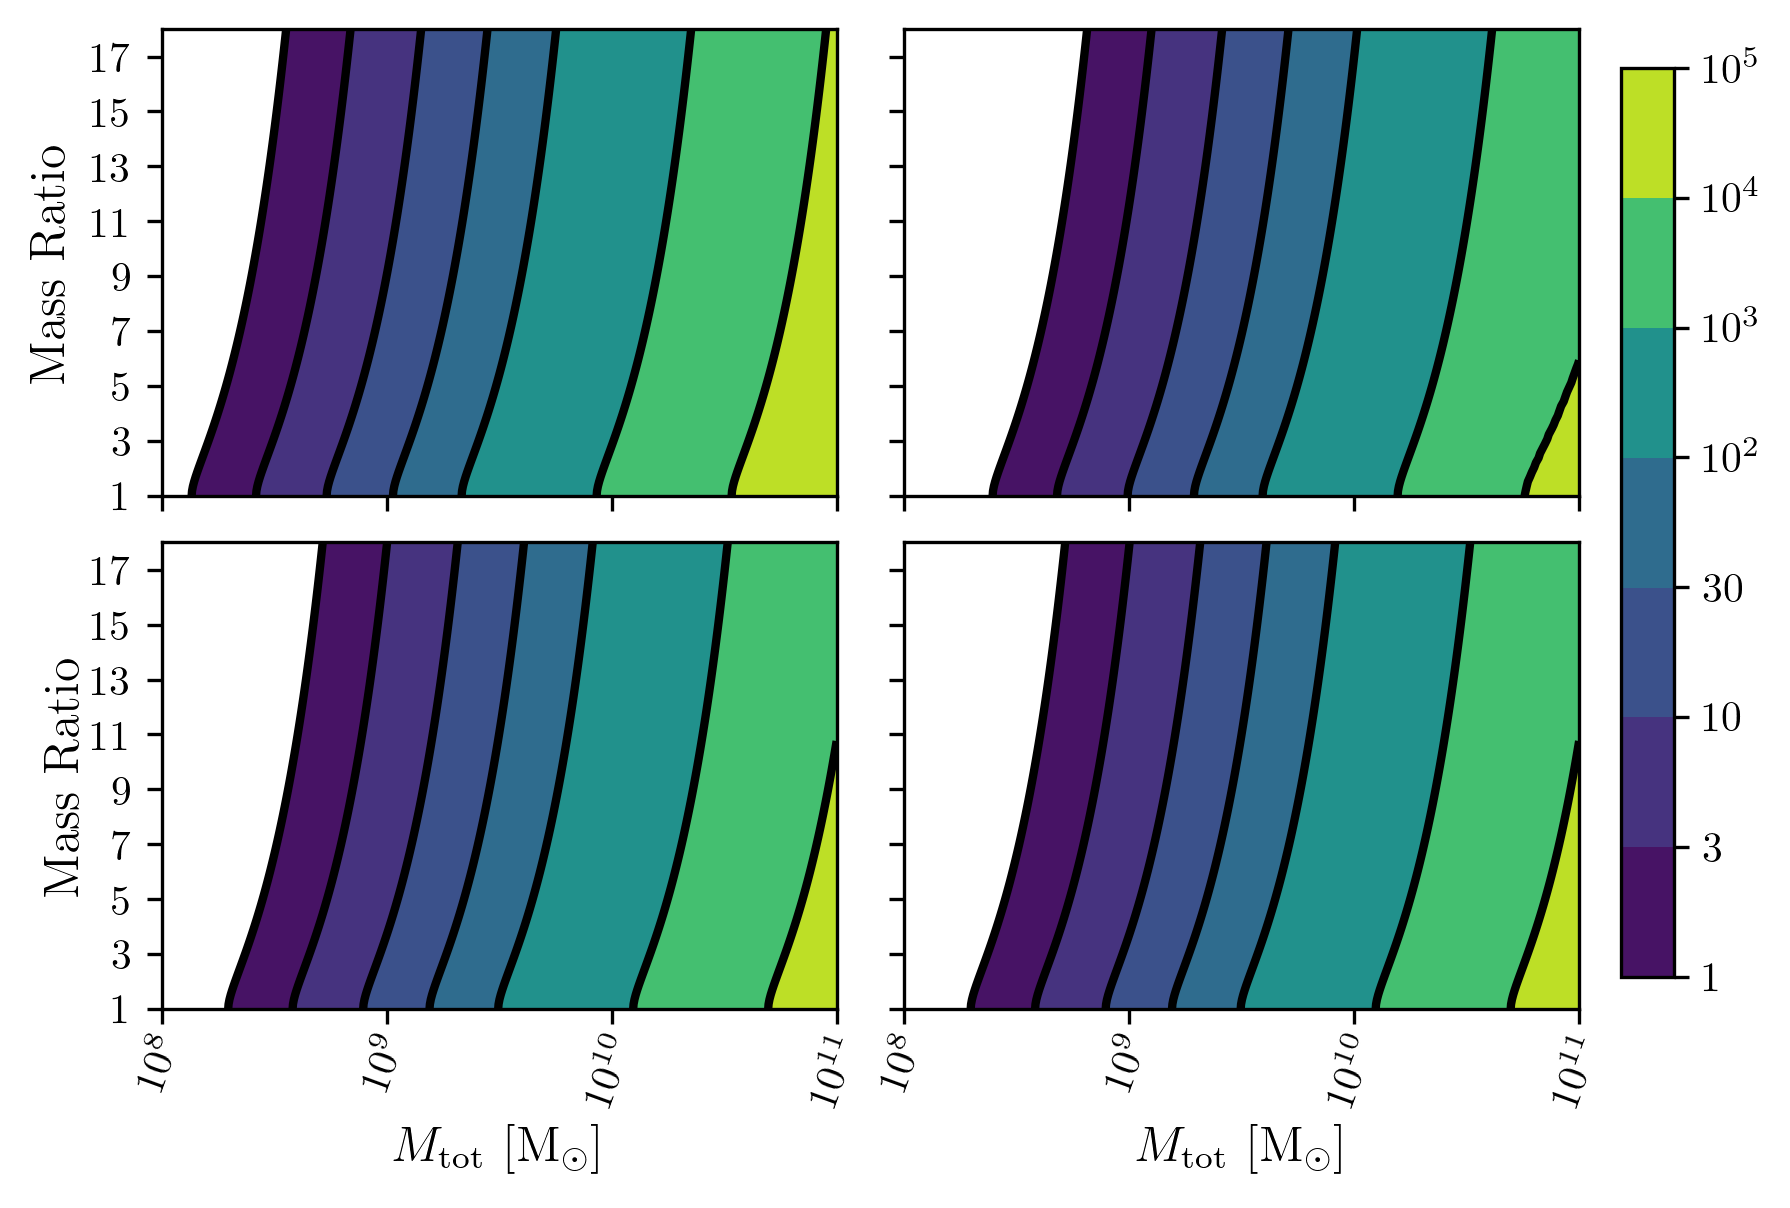

In [75]:
#########################
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_q,SKA_WN_GWB_Samples_M_vs_q,
           SKA_realistic_noise_Samples_M_vs_q,SKA_realistic_noise_Samples_M_vs_q]
SNRs = [SKA_WN_SNR_M_vs_q,SKA_WN_GWB_SNR_M_vs_q,
        SKA_realistic_noise_SNR_M_vs_q,SKA_realistic_noise_SNR_M_vs_q]
loglevelMax=5.0
hspace = .5
wspace = .1
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'q'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs. z

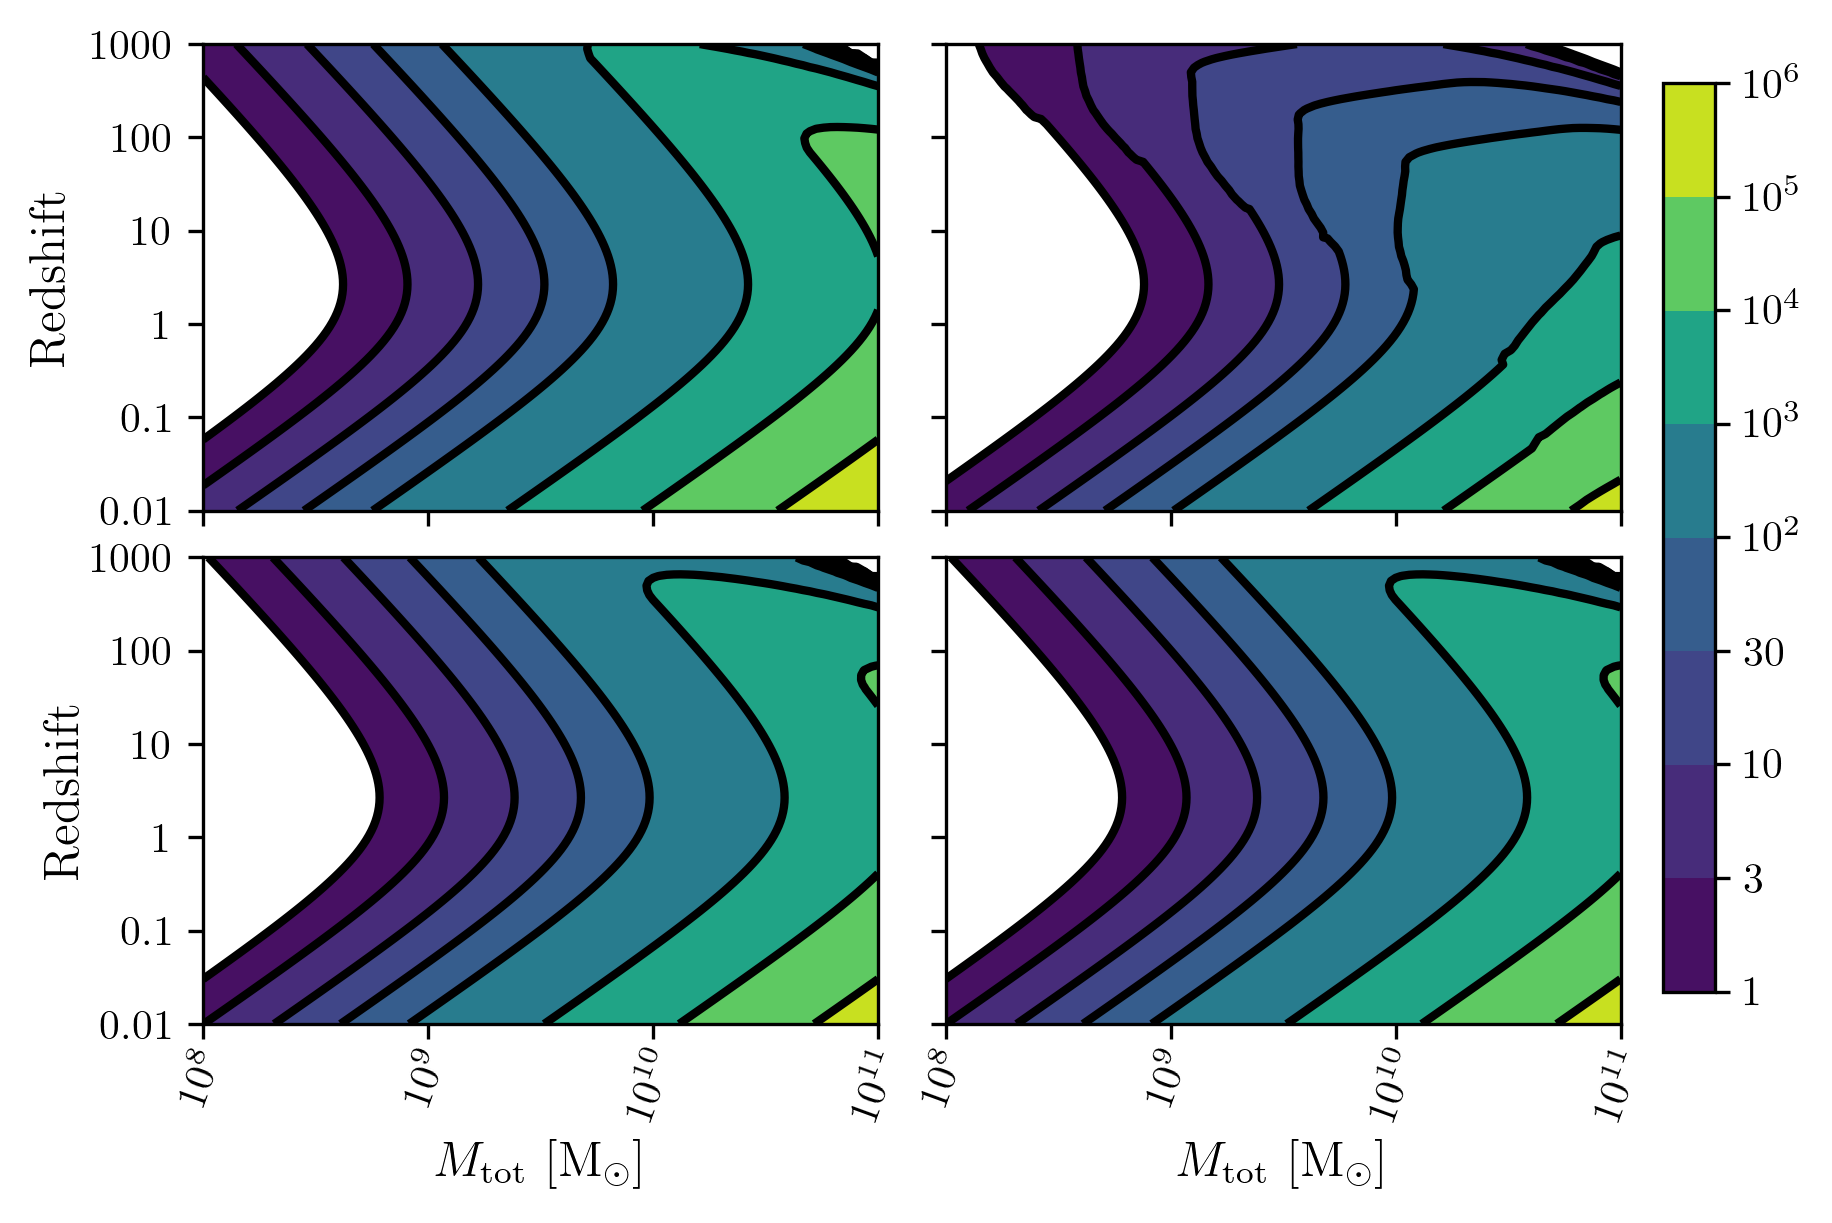

In [76]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_z,SKA_WN_GWB_Samples_M_vs_z,
           SKA_realistic_noise_Samples_M_vs_z,SKA_realistic_noise_Samples_M_vs_z]
SNRs = [SKA_WN_SNR_M_vs_z,SKA_WN_GWB_SNR_M_vs_z,
        SKA_realistic_noise_SNR_M_vs_z,SKA_realistic_noise_SNR_M_vs_z]
loglevelMax=6.0
wspace = .1
hspace = .5
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'z'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1
#fig.savefig(save_directory+'SNR_SKA_model_comp_M_vs_z.pdf',bbox_inches='tight')

M vs. chi1

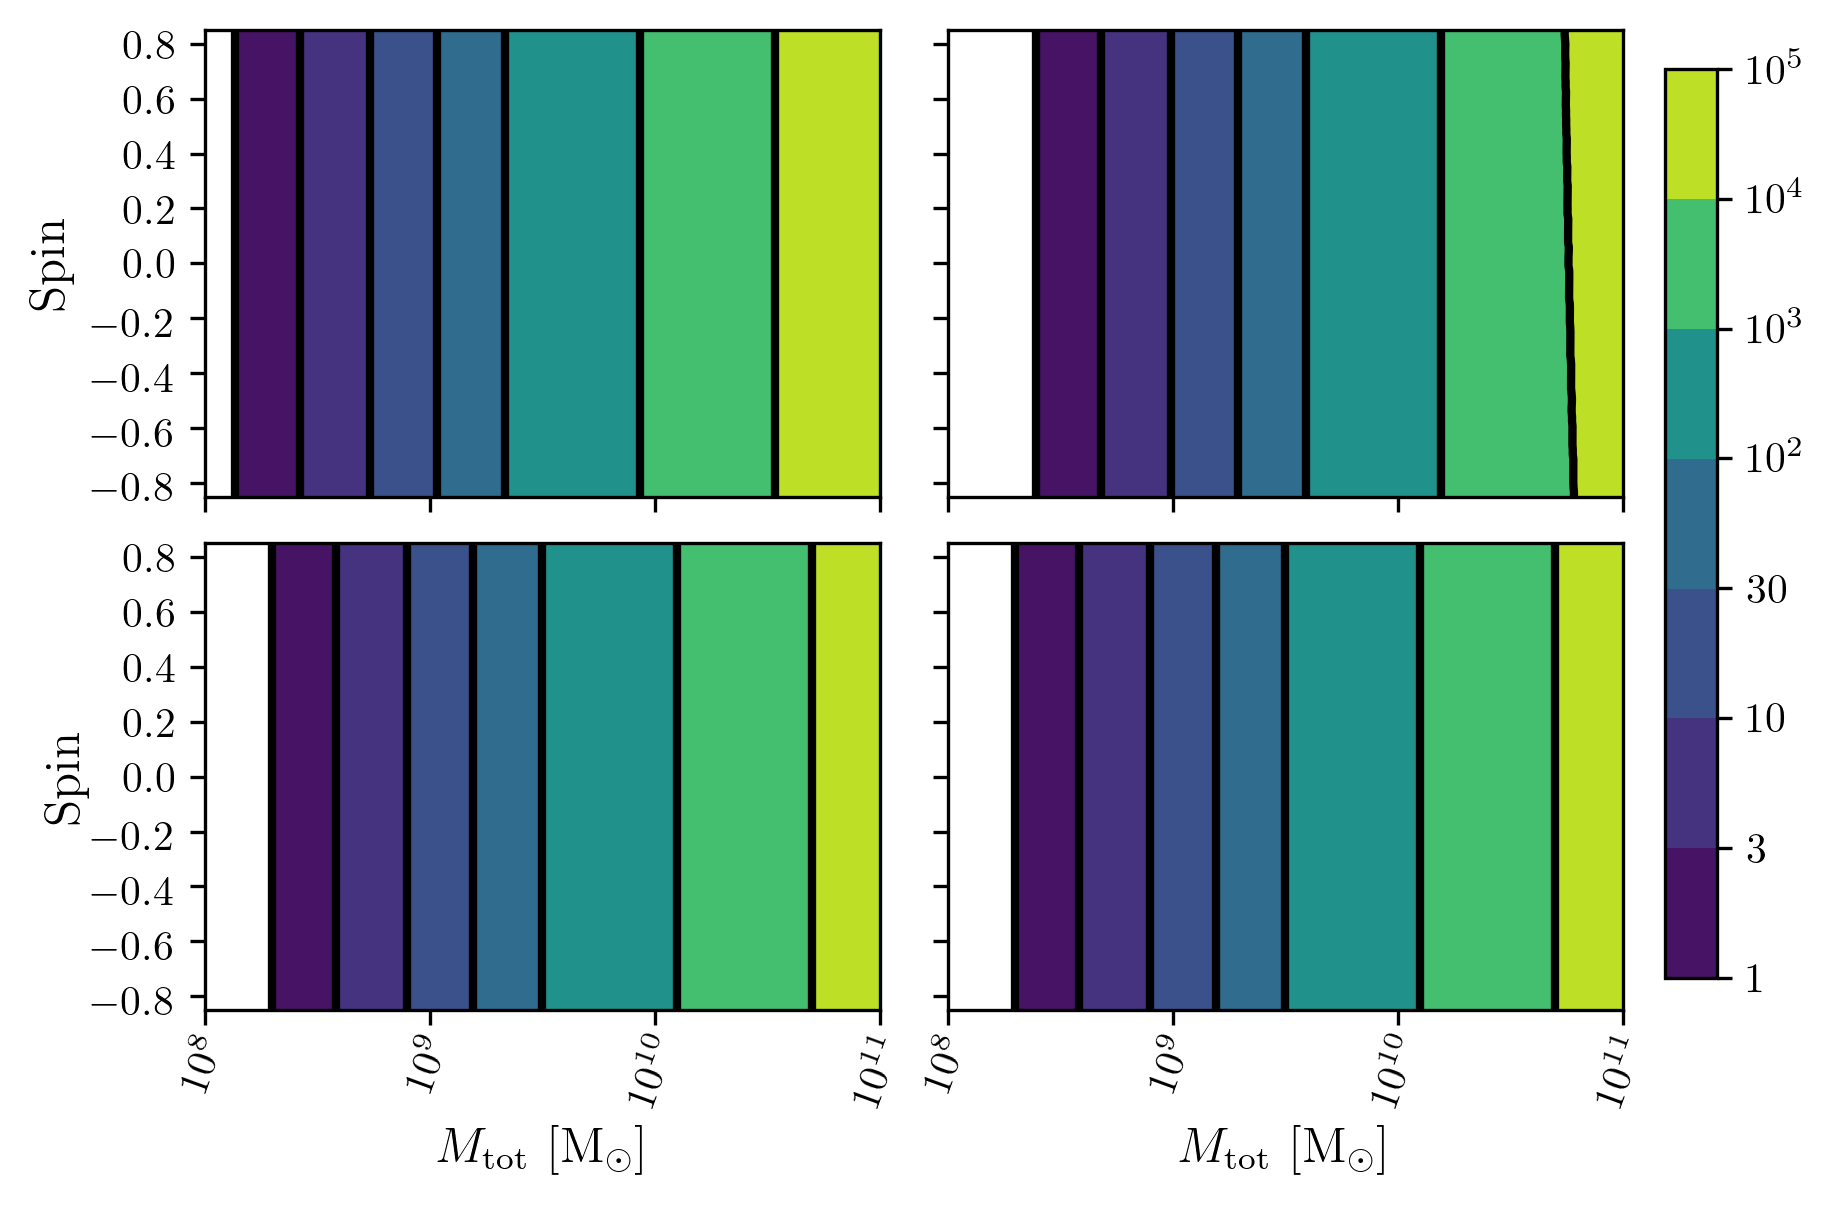

In [77]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_chi1,SKA_WN_GWB_Samples_M_vs_chi1,
           SKA_realistic_noise_Samples_M_vs_chi1,SKA_realistic_noise_Samples_M_vs_chi1]
SNRs = [SKA_WN_SNR_M_vs_chi1,SKA_WN_GWB_SNR_M_vs_chi1,
        SKA_realistic_noise_SNR_M_vs_chi1,SKA_realistic_noise_SNR_M_vs_chi1]
loglevelMax=5.0
wspace = .1
hspace = .5
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'chi1'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs. N_p

In [ ]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples_x = [SKA_WN_Samples_M_vs_N_p_x,SKA_WN_GWB_Samples_M_vs_N_p_x,
             SKA_realistic_noise_Samples_M_vs_N_p_x,SKA_WN_RN_Samples_M_vs_N_p_x]
samples_y = [SKA_WN_Samples_M_vs_N_p_y,SKA_WN_GWB_Samples_M_vs_N_p_y,
             SKA_realistic_noise_Samples_M_vs_N_p_y,SKA_WN_RN_Samples_M_vs_N_p_y]
SNRs = [SKA_WN_SNR_M_vs_N_p,SKA_WN_GWB_SNR_M_vs_N_p,
        SKA_realistic_noise_SNR_M_vs_N_p,SKA_WN_RN_SNR_M_vs_N_p]
loglevelMax=6.0
wspace = .1
hspcae = .5
y_label_loc = -.175
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR(fig,axes[i,j],'M',samples_x[ii],'N_p',samples_y[ii],
                     SNRs[ii],display=False,display_cbar=True,x_axis_label=True,
                     logLevels_max=loglevelMax,
                     wspace=wspace,hspace=hspace,y_label_loc=y_label_loc)
        elif ii == 1:
            Plot_SNR(fig,axes[i,j],'M',samples_x[ii],'N_p',samples_y[ii],
                     SNRs[ii],display=False,display_cbar=False,x_axis_label=True,
                     y_axis_label=False,logLevels_max=loglevelMax,
                     wspace=wspace,hspace=hspace,y_label_loc=y_label_loc)
        elif ii == 3:
            Plot_SNR(fig,axes[i,j],'M',samples_x[ii],'N_p',samples_y[ii],
                 SNRs[ii],display=True,display_cbar=False,y_axis_label=False,
                     logLevels_max=loglevelMax,wspace=wspace,hspace=hspace,)
        else:
            Plot_SNR(fig,axes[i,j],'M',samples_x[ii],'N_p',samples_y[ii],
                     SNRs[ii],display=False,display_cbar=False,
                     logLevels_max=loglevelMax,
                     wspace=wspace,hspace=hspace,y_label_loc=y_label_loc)
        ii += 1

M vs. cadence

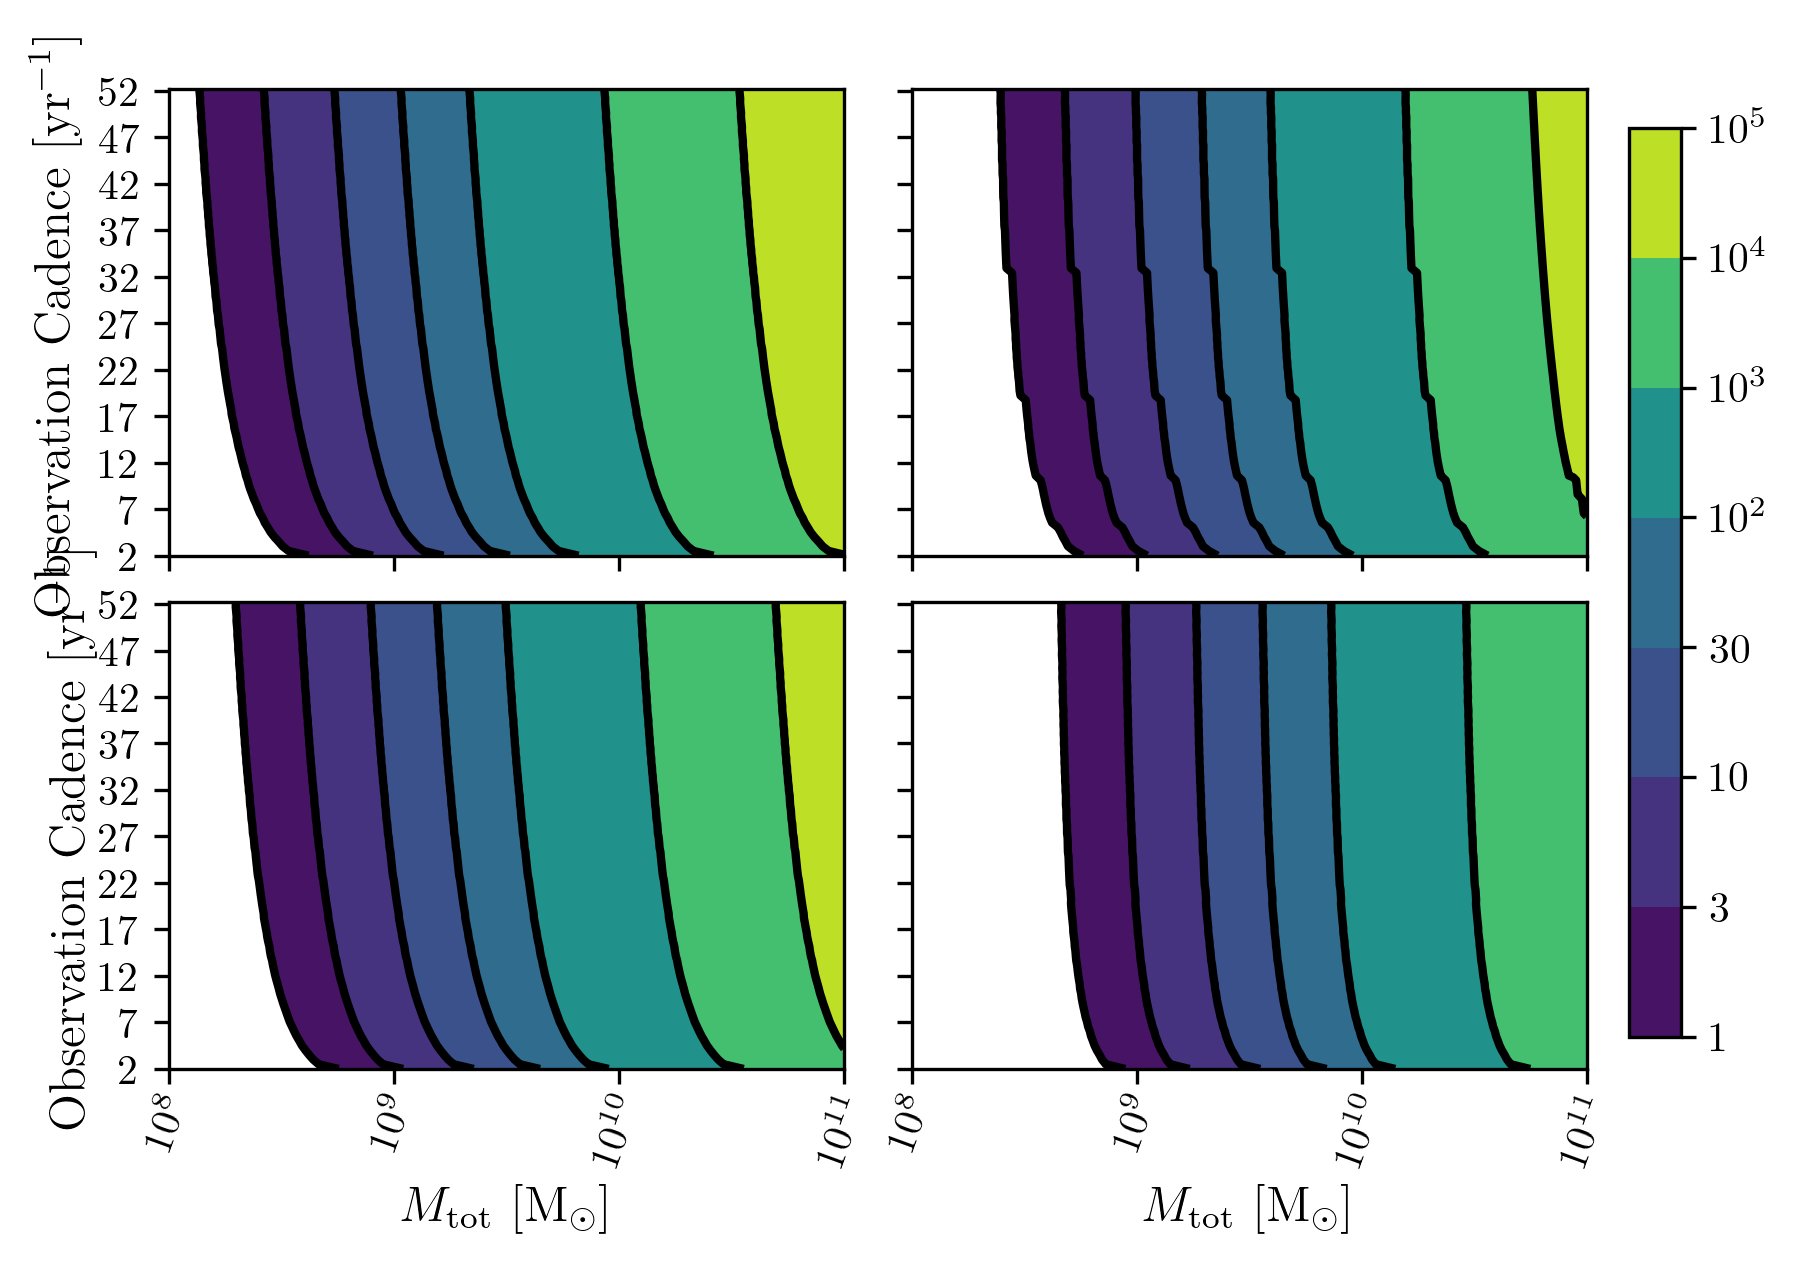

In [78]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_cadence,SKA_WN_GWB_Samples_M_vs_cadence,
           SKA_realistic_noise_Samples_M_vs_cadence,SKA_WN_RN_Samples_M_vs_cadence]
SNRs = [SKA_WN_SNR_M_vs_cadence,SKA_WN_GWB_SNR_M_vs_cadence,
        SKA_realistic_noise_SNR_M_vs_cadence,SKA_WN_RN_SNR_M_vs_cadence]
loglevelMax=5.0
wspace = .1
hspace = .5
y_label_loc = -.15
hspace=0.1
wspace=0.1
var_y = 'cadence'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs. T_obs

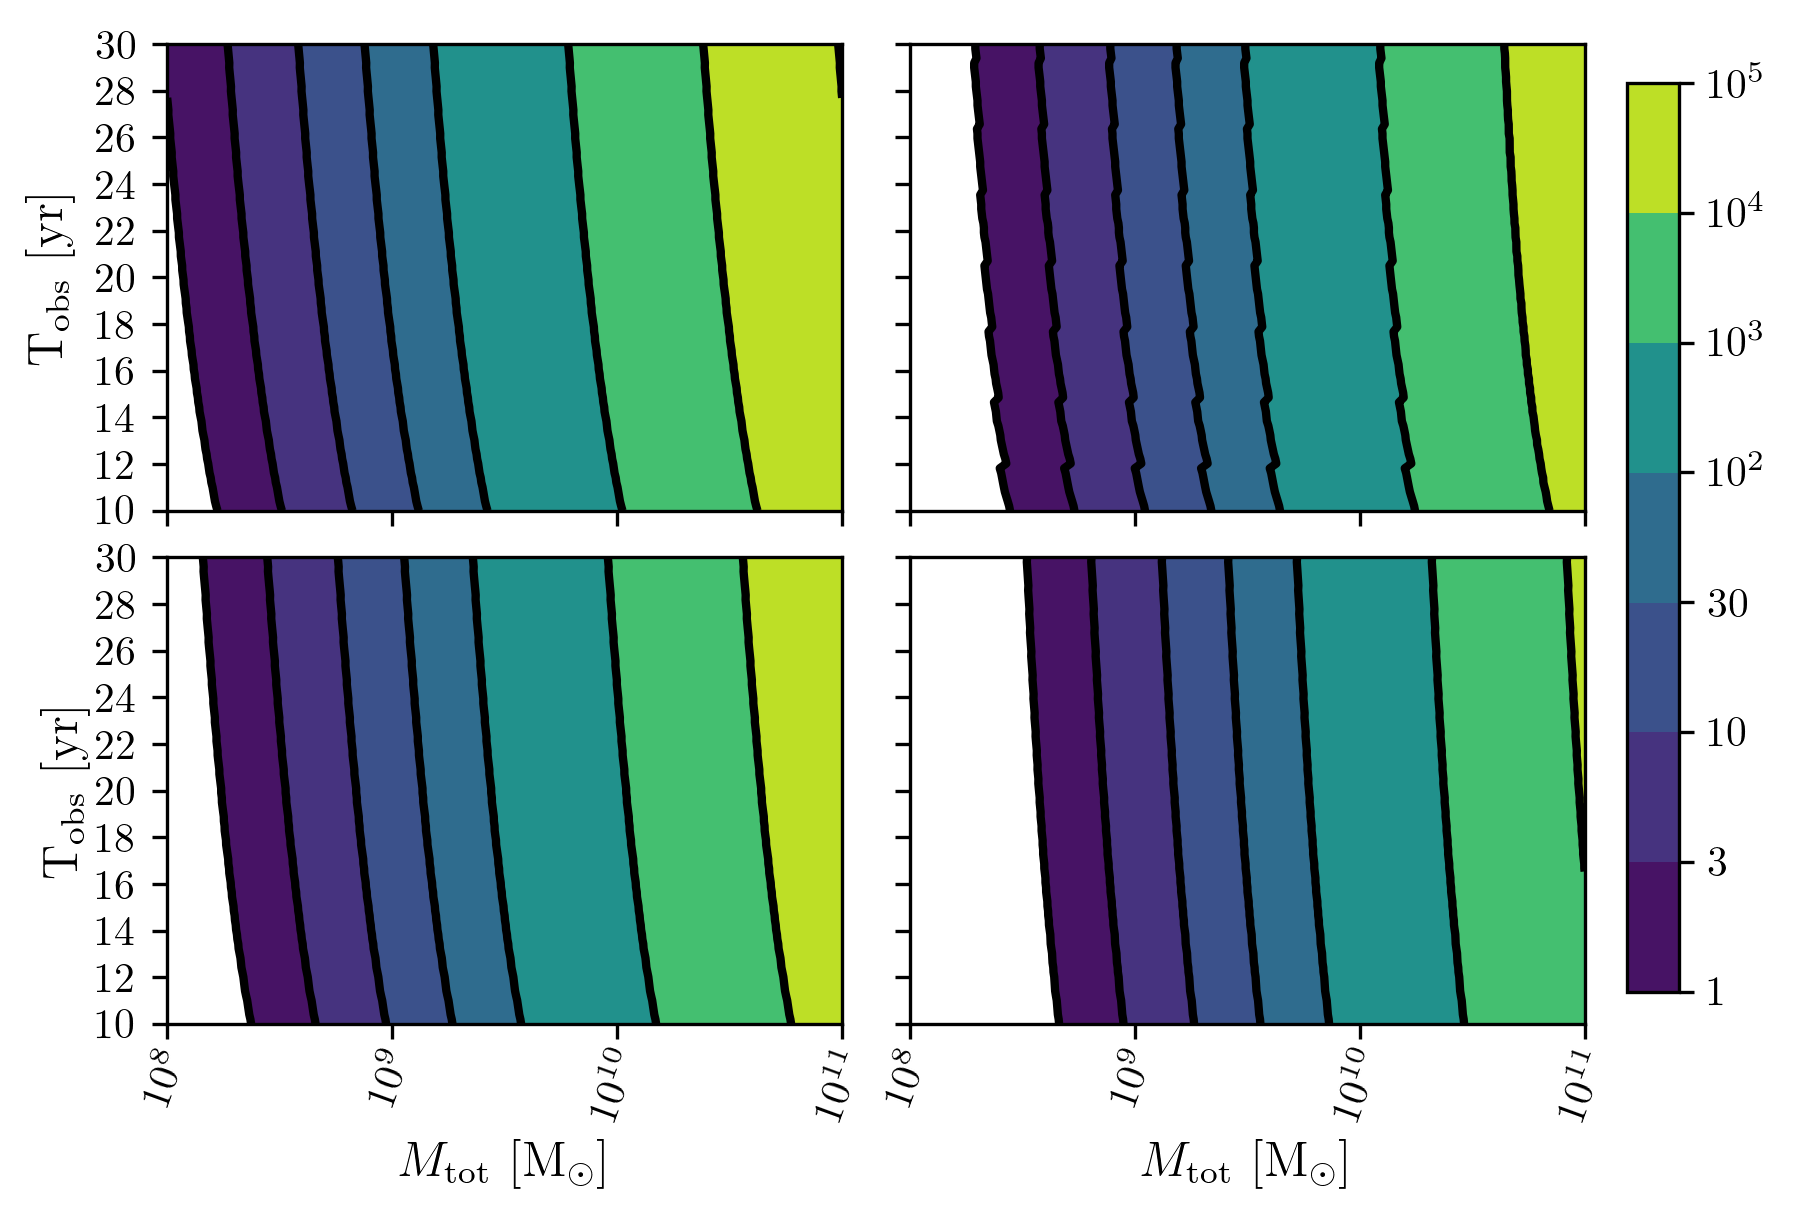

In [79]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_T_obs,SKA_WN_GWB_Samples_M_vs_T_obs,
           SKA_realistic_noise_Samples_M_vs_T_obs,SKA_WN_RN_Samples_M_vs_T_obs]
SNRs = [SKA_WN_SNR_M_vs_T_obs,SKA_WN_GWB_SNR_M_vs_T_obs,
        SKA_realistic_noise_SNR_M_vs_T_obs,SKA_WN_RN_SNR_M_vs_T_obs]
loglevelMax=5.0
wspace = .1
hspace = .5
y_label_loc = -.175
hspace=0.1
wspace=0.1
var_y = 'T_obs'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

M vs. sigma

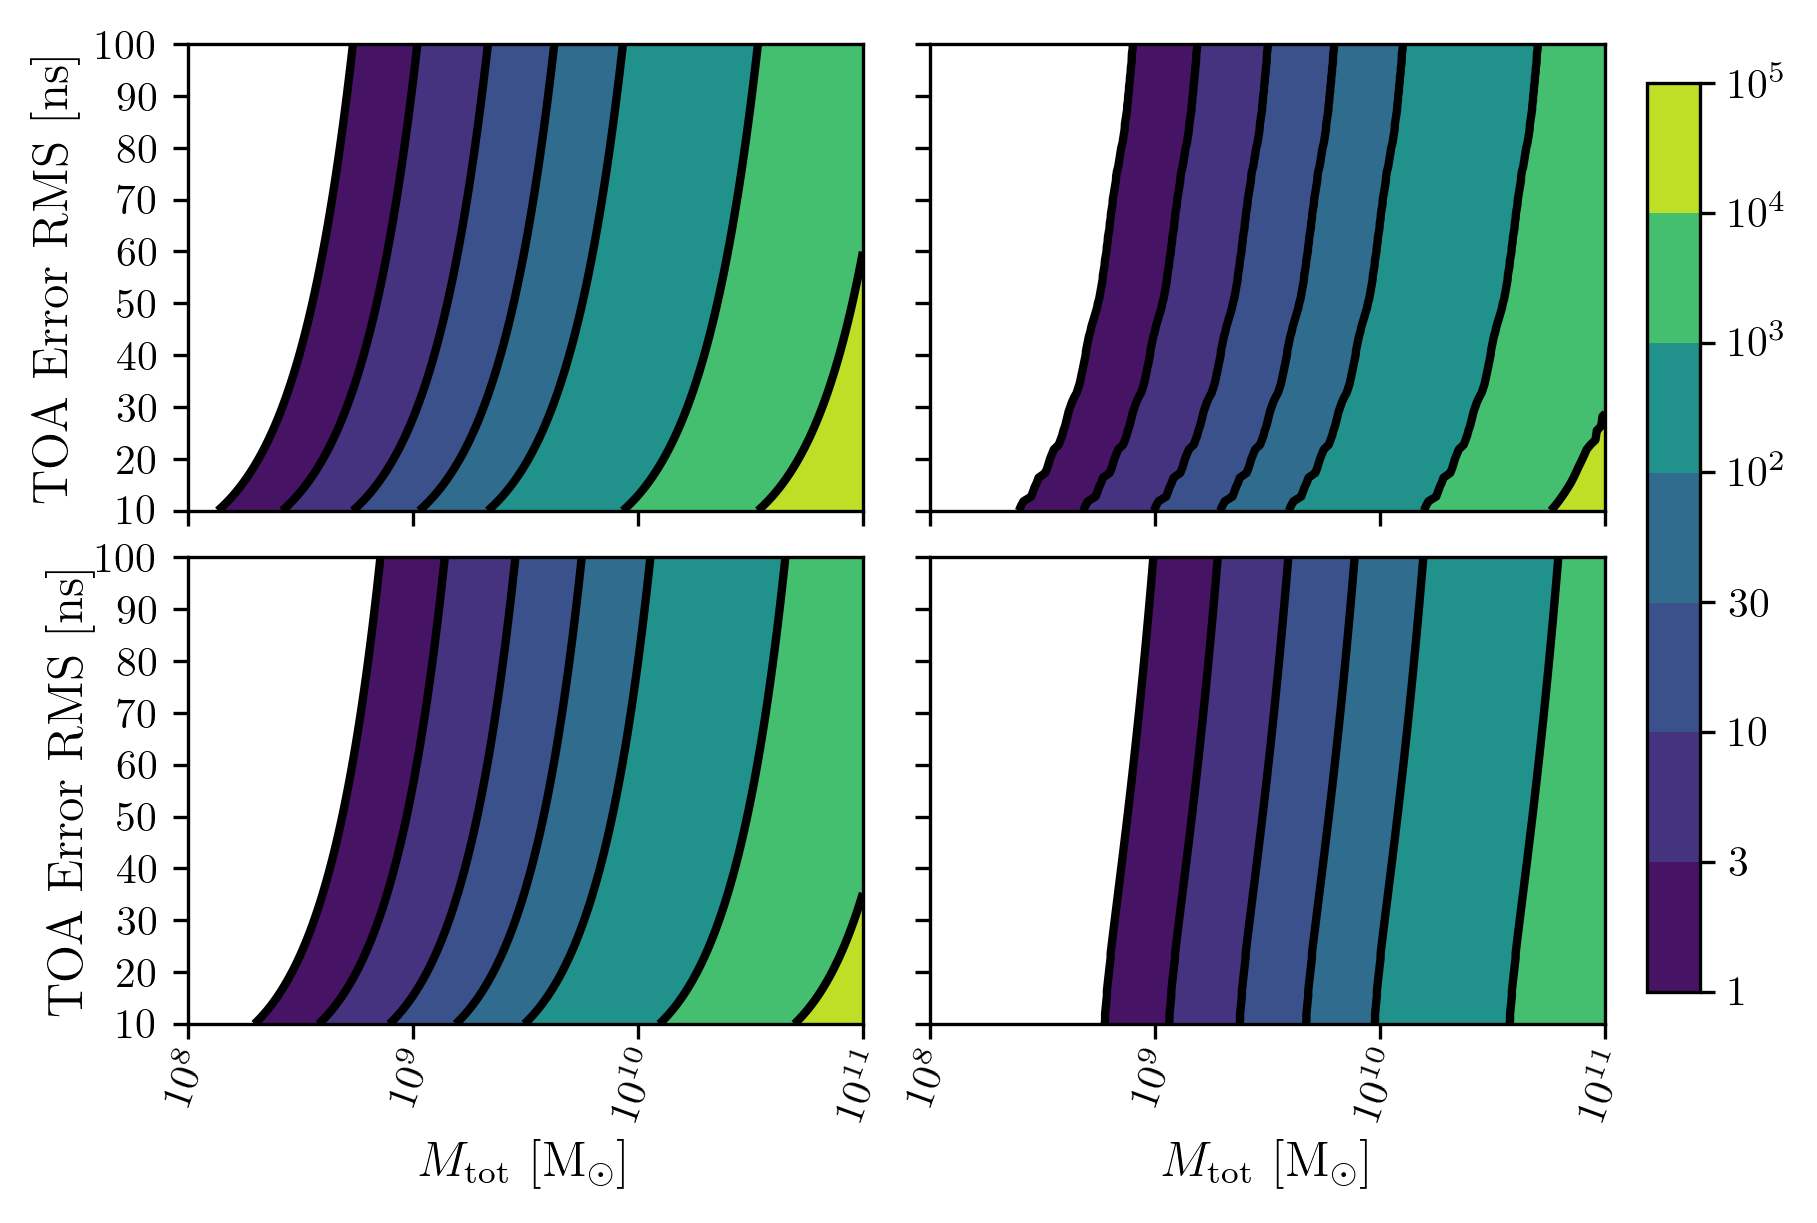

In [80]:
#Make the Contour Plots
figsize = get_fig_size(scale=1.0)
fig, axes = plt.subplots(2,2,figsize=figsize)
samples = [SKA_WN_Samples_M_vs_sigma,SKA_WN_GWB_Samples_M_vs_sigma,
           SKA_realistic_noise_Samples_M_vs_sigma,SKA_WN_RN_Samples_M_vs_sigma]
SNRs = [SKA_WN_SNR_M_vs_sigma,SKA_WN_GWB_SNR_M_vs_sigma,
        SKA_realistic_noise_SNR_M_vs_sigma,SKA_WN_RN_SNR_M_vs_sigma]
loglevelMax=5.0
wspace = .1
hspace = .5
y_label_loc = -.15
hspace=0.1
wspace=0.1
var_y = 'sigma'
ii = 0
for i in range(2):
    for j in range(2):
        if ii == 0:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     x_axis_label=False,y_axis_label=False,
                     hspace=hspace,wspace=wspace)
        elif ii == 3:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
        ii += 1

## Paper Plot

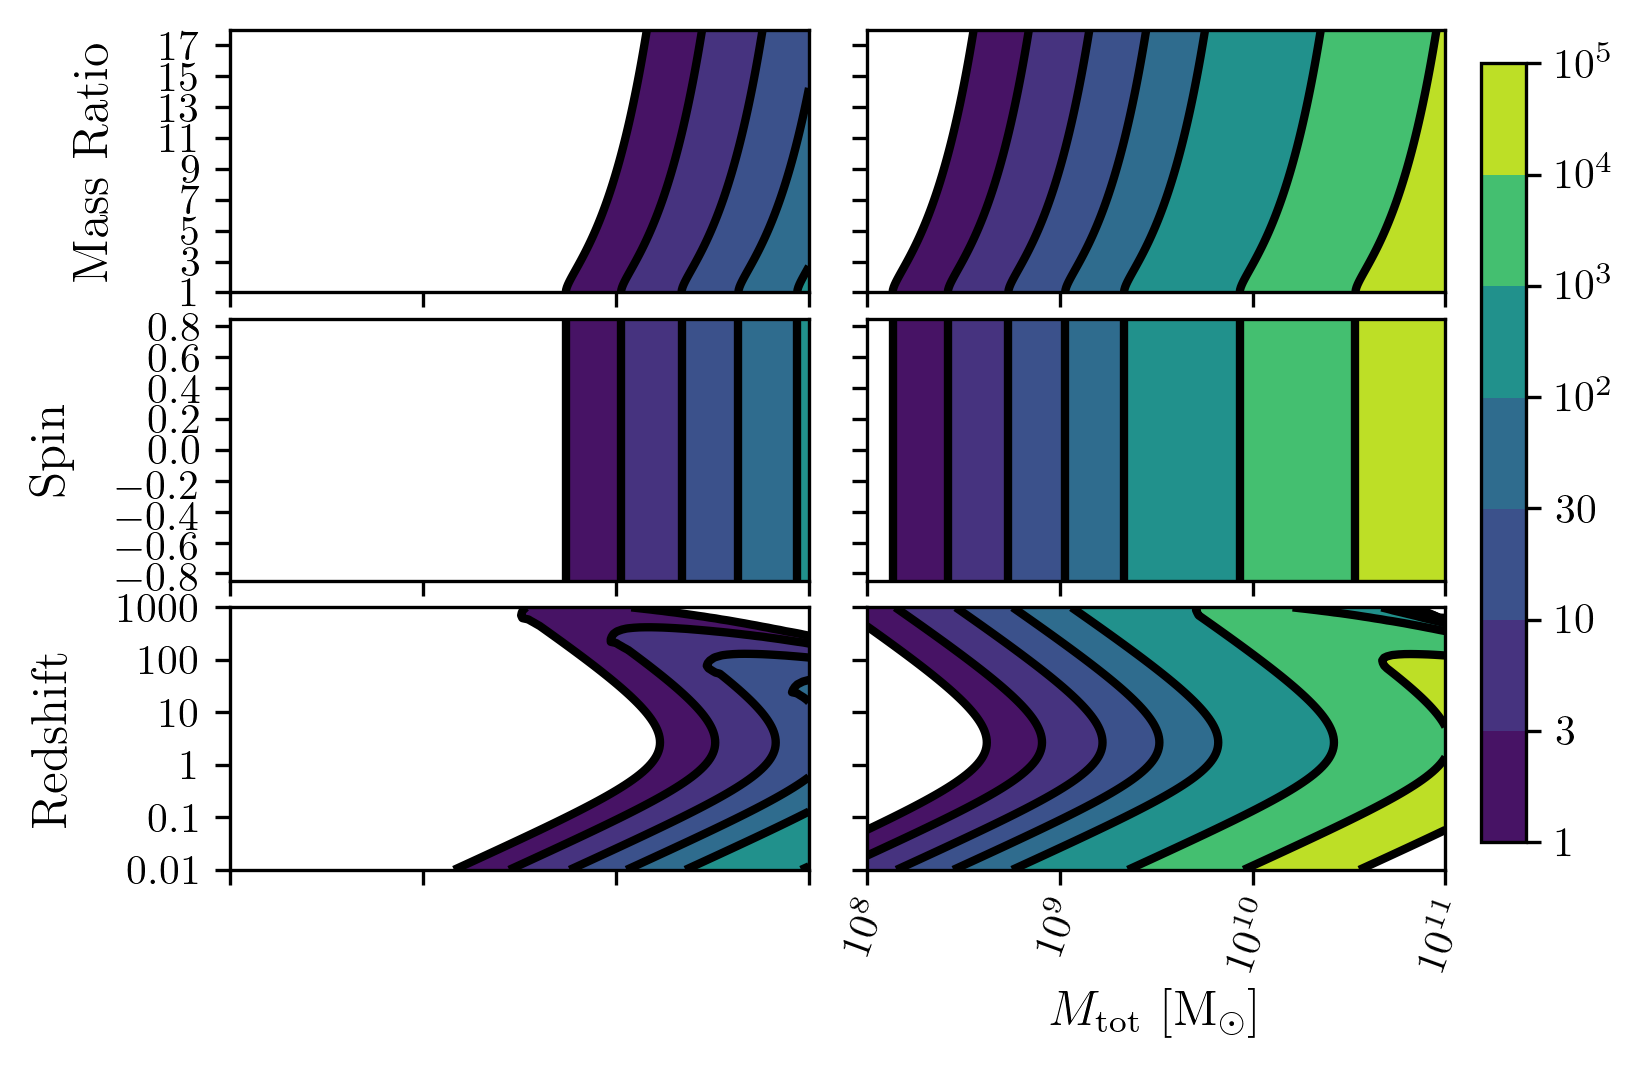

In [89]:
#########################
#Make the Contour Plots
figsize = get_fig_size(width=6.0,scale=1)
fig, axes = plt.subplots(3,2,figsize=figsize)
samples = [NANOGrav_11yr_Samples_M_vs_q,SKA_WN_Samples_M_vs_q,
           NANOGrav_11yr_Samples_M_vs_chi1,SKA_WN_Samples_M_vs_chi1,
           NANOGrav_11yr_Samples_M_vs_z,SKA_WN_Samples_M_vs_z
          ]
SNRs = [NANOGrav_11yr_SNR_M_vs_q,SKA_WN_SNR_M_vs_q,
        NANOGrav_11yr_SNR_M_vs_chi1,SKA_WN_SNR_M_vs_chi1,
        NANOGrav_11yr_SNR_M_vs_z,SKA_WN_SNR_M_vs_z
       ]
var_ys = ['q','chi1','z']
loglevelMin=-1.0
loglevelMax=5.0
hspace = .1
wspace = .1

ii = 0
for i in range(np.shape(axes)[0]):
    var_y=var_ys[i]
    for j in range(np.shape(axes)[1]):
        #First Column
        if ii%2 == 0:
            #Last row
            if ii == (np.shape(axes)[0]*np.shape(axes)[1])-3:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         hspace=hspace,wspace=wspace,
                         xticklabels_kwargs={'rotation':70,'y':0.02},
                         ylabels_kwargs={'labelpad':0.45})
            else:
                Plot_SNR('M',samples[ii][:,0],var_y,
                         samples[ii][:,1],SNRs[ii],
                         fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                         logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                         x_axis_label=False,
                         hspace=hspace,wspace=wspace,
                         ylabels_kwargs={'labelpad':10})
        #Bottom Right
        elif ii == (np.shape(axes)[0]*np.shape(axes)[1])-1:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=True,display_cbar=True,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,
                     hspace=hspace,wspace=wspace,
                     xticklabels_kwargs={'rotation':70,'y':0.02})
        else:
            Plot_SNR('M',samples[ii][:,0],var_y,
                     samples[ii][:,1],SNRs[ii],
                     fig=fig,ax=axes[i,j],display=False,display_cbar=False,
                     logLevels_min=loglevelMin,logLevels_max=loglevelMax,
                     y_axis_label=False,x_axis_label=False,
                     hspace=hspace,wspace=wspace)
        ii += 1
#fig.savefig(save_directory+'SNR_PTAs_M_vs_source_params.png',bbox_inches='tight')

## Make Waterfall Plots

Sets plotting parameters

In [ ]:
contourcolorPresent = 'plasma'
transparencyPresent = 1.0
contourcolorFuture = 'plasma'
transparencyFuture = 0.6
textsize = 10
textcolor1 = 'k'
textcolor2 = 'w'

Selects contour levels to separate sections into

In [ ]:
contLevels = np.array([5, 10, 1e2, 1e3, 1e4, 1e5, 1e6, 1e7])
logLevels = np.log10(contLevels)

Set labels for x and y axes

In [ ]:
Mlabel_min = 0
Mlabel_max = 11
zlabel_min = -2.0
zlabel_max = 3.0
zlabels = np.logspace(zlabel_min,zlabel_max,zlabel_max-zlabel_min+1)
Mlabels = np.logspace(Mlabel_min,Mlabel_max,Mlabel_max-Mlabel_min+1)

Set labels for lookback time on y-axis

In [ ]:
ages1 = np.array([13.5,13,10,5,1])*u.Gyr 
ages2 = np.array([500,100,10,1])*u.Myr
ages2 = ages2.to('Gyr')
ages = np.hstack((ages1.value,ages2.value))
ages = ages*u.Gyr
ageticks = [z_at_value(cosmo.age,age) for age in ages]

Add Label positions and labels for different GW detectors

In [ ]:
labelaLIGO_text = 'Advanced\nLIGO'
labelaLIGO_xpos = 0.18
labelaLIGO_ypos = 0.13

labelnanograv_text = 'NANOGrav:\n11yr Data'
labelnanograv_xpos = 0.925
labelnanograv_ypos = 0.175

labelet_text = 'Einstein Telescope:\nDesign D'
labelet_xpos = 0.18
labelet_ypos = 0.55

labelLisa_text = 'LISA:\n L3 Proposal'
labelLisa_xpos = 0.55
labelLisa_ypos = 0.1

labelIpta_text = 'SKA:\n WN Only'
labelIpta_xpos = 0.9
labelIpta_ypos = 0.94

#### Plots of Entire GW Band

In [ ]:
fig, ax1 = plt.subplots()

#Set other side y-axis for lookback time scalings
ax2 = ax1.twinx()

CS1 = ax1.contourf(np.log10(NANOGrav_11yr_Samples_M_vs_z[:,0]),np.log10(NANOGrav_11yr_Samples_M_vs_z[:,1]),
                   np.log10(NANOGrav_11yr_SNR_M_vs_z),logLevels,cmap = contourcolorPresent, alpha = transparencyPresent)

ax2.contour(np.log10(NANOGrav_11yr_Samples_M_vs_z[:,0]),np.log10(NANOGrav_11yr_Samples_M_vs_z[:,1]),
            np.log10(NANOGrav_11yr_SNR_M_vs_z),logLevels,colors = 'k')

ax1.contourf(np.log10(aLIGO_Samples_M_vs_z[:,0]),np.log10(aLIGO_Samples_M_vs_z[:,1]),
             np.log10(aLIGO_SNR_M_vs_z),logLevels,cmap = contourcolorPresent, alpha = transparencyPresent)

ax1.contour(np.log10(aLIGO_Samples_M_vs_z[:,0]),np.log10(aLIGO_Samples_M_vs_z[:,1]),
            np.log10(aLIGO_SNR_M_vs_z),logLevels,colors = 'k')

ax1.contourf(np.log10(lisa_Samples_M_vs_z[:,0]),np.log10(lisa_Samples_M_vs_z[:,1]),
             np.log10(lisa_SNR_M_vs_z),logLevels,cmap=contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(np.log10(et_Samples_M_vs_z[:,0]),np.log10(et_Samples_M_vs_z[:,1]),
             np.log10(et_SNR_M_vs_z),logLevels,cmap = contourcolorFuture, alpha = transparencyFuture)

ax1.contourf(np.log10(SKA_WN_Samples_M_vs_z[:,0]),np.log10(SKA_WN_Samples_M_vs_z[:,1]),
             np.log10(SKA_WN_SNR_M_vs_z),logLevels,cmap = contourcolorFuture, alpha = transparencyFuture)
"""
ax1.contourf(np.log10(SKA_realistic_noise_Samples_M_vs_z[:,0]),np.log10(SKA_realistic_noise_Samples_M_vs_z[:,1]),
             np.log10(SKA_realistic_noise_SNR_M_vs_z),logLevels,cmap = contourcolorFuture, alpha = transparencyFuture)
"""
#Set axes limits 
ax1.set_xlim(np.log10(et_Samples_M_vs_z[0,0]),11)
ax1.set_ylim(np.log10(SKA_WN_Samples_M_vs_z[0,1]),np.log10(SKA_WN_Samples_M_vs_z[-1,1]))


#Set ticks and labels
ax1.set_yticks(np.log10(zlabels))
ax1.set_xticks(np.log10(Mlabels))
ax1.set_xticklabels([r'$10^{%i}$' %y if int(y) > 1 else r'$%i$' %(10**y) for y in np.log10(Mlabels)])
ax1.set_yticklabels([x if int(x) < 1 else int(x) for x in zlabels])

ax1.set_xlabel(r'$M_{\rm tot}$ $[M_{\odot}]$')
ax1.set_ylabel(r'${\rm Redshift}$')
ax1.yaxis.set_label_coords(-.1,.5)

ax2.set_yticks(np.log10(ageticks))
ax2.set_yticklabels(['{:g}'.format(age) for age in ages.value])
ax2.set_ylabel(r'$t_{\rm cosmic}$ [Gyr]')
ax2.yaxis.set_label_coords(1.125,.5)

#Label different GW detectors
plt.text(labelaLIGO_xpos,labelaLIGO_ypos,labelaLIGO_text,fontsize = textsize, \
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes)

plt.text(labelnanograv_xpos,labelnanograv_ypos,labelnanograv_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor2,transform = ax1.transAxes,\
        rotation=74)

plt.text(labelet_xpos,labelet_ypos,labelet_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelLisa_xpos,labelLisa_ypos,labelLisa_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

plt.text(labelIpta_xpos,labelIpta_ypos,labelIpta_text,fontsize = textsize,\
         horizontalalignment='center',verticalalignment='center', color = textcolor1,transform = ax1.transAxes)

#Make colorbar
cbar = fig.colorbar(CS1,ax=(ax1,ax2),pad=0.01)
cbar.set_label(r'$SNR$')
cbar.ax.set_yticklabels([r'$10^{%i}$' %x if int(x) > 1 else r'$%i$' %(10**x) for x in logLevels])
fig.savefig(save_directory+'full_waterfall_plots_lb.pdf',bbox_inches='tight')
plt.show()